<a href="https://colab.research.google.com/github/ronan777/HydroProc/blob/main/Locate.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
!pip install -q condacolab
import condacolab
condacolab.install()
!conda install obspy
from obspy.clients.fdsn import Client
from obspy import UTCDateTime
from obspy import read_inventory
from obspy import read
import obspy.core.stream as st
import obspy.signal.cross_correlation as cc
import obspy.signal.filter as flt
import obspy.signal.trigger as trg
import obspy.signal.freqattributes as frq
import matplotlib as mpl
import matplotlib.pyplot as plt
import numpy as np
import scipy.optimize as opt
import math
import gc


✨🍰✨ Everything looks OK!
Channels:
 - conda-forge
Platform: linux-64
Solving environment: - \ | / - \ | / - \ done


==> WARNING: A newer version of conda exists. <==
    current version: 23.11.0
    latest version: 24.11.0

Please update conda by running

    $ conda update -n base -c conda-forge conda



# All requested packages already installed.



16800.0
(-1.9386950000000207, 0.49834692578129824) (-1.3987489999999372, -1.4550044492706635)
(-0.31888584116312174, -1.1124813333333192, -0.011333333333333334) (0.0, 0.0, 0.0) (0.49834692578129824, -1.9386950000000207, -0.008) (-1.4550044492706635, -1.3987489999999372, -0.026)


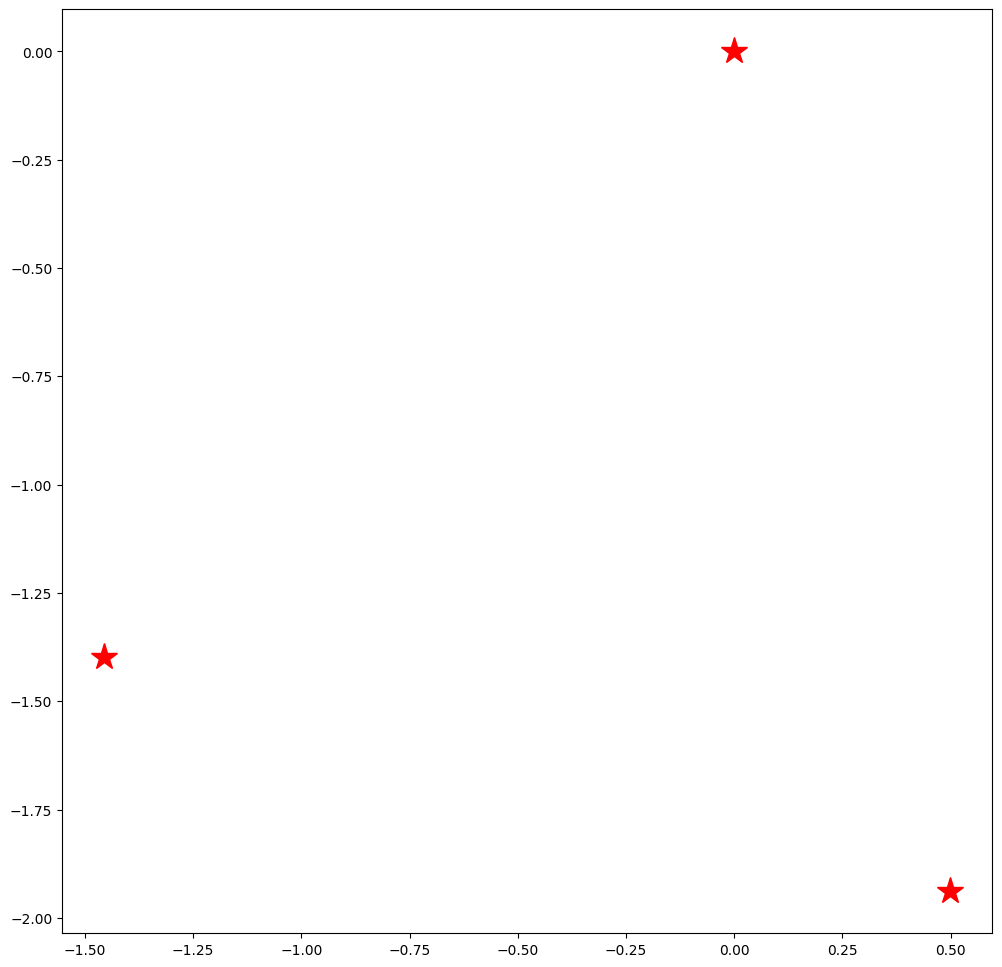

In [3]:
##
# Parameter initialization
#
#timestring="2024-02-21 01:00:00"
#timestring="2024-02-20 23:00:00"
#timestring="2024-02-20 21:00:00"
#timestring="2024-02-20 19:00:00"
#timestring="2024-02-20 17:00:00"
#timestring="2024-02-20 15:00:00"
#timestring="2024-02-20 14:00:00"
#timestring="2024-02-20 12:00:00"
#timestring="2024-02-20 10:00:00"
#timestring="2024-02-20 09:30:00"
#timestring="2024-02-20 09:00:00"
#timestring="2024-02-20 07:00:00"
#timestring="2024-02-20 07:30:00"
#timestring="2024-02-20 05:30:00"
#timestring="2024-02-20 05:10:00"
#timestring="2024-02-20 03:00:00"
#timestring="2024-02-20 03:45:00"
#timestring="2024-02-20 01:00:00"
#timestring="2024-02-20 00:12:00"
#timestring="2024-02-20 02:00:00"
#timestring="2024-02-20 02:20:00"
#timestring="2024-02-20 02:22:00"
#timestring="2024-02-20 02:30:00"
#timestring="2024-02-19 23:00:00"
#timestring="2024-02-19 21:00:00"
timestring="2024-02-19 22:40:00"
#timestring="2024-02-19 19:00:00"
#timestring="2024-02-19 18:20:00"
timestring0="2024-02-19 18:00:00"
starttime=UTCDateTime(timestring)
starttime0=UTCDateTime(timestring0)
firsttime=starttime-starttime0
print(firsttime)
#Interval = 36000
#Interval = 300
#Interval = 3600
#Interval = 7200
Interval = 1800
#Interval = 9600
#Interval = 1200
#Interval = 960
#Interval = 10
path="/content/drive/MyDrive/MSEED/"
hvel = 1.48
depth = -0.750
coord_correction = False
#
#
#
# Map of the triplet
#
#
#
h11s1=(18.50827,166.700272)
h11s2=(18.49082,166.705002)
h11s3=(18.49568,166.686462)
kmdeg=111.1
x2=(kmdeg*(h11s2[0]-h11s1[0]),kmdeg*(h11s2[1]-h11s1[1])*math.cos(np.pi*18.5/180))
x3=(kmdeg*(h11s3[0]-h11s1[0]),kmdeg*(h11s3[1]-h11s1[1])*math.cos(np.pi*18.5/180))
print(x2,x3)
S1_i = (0., 0., 0.)
S2_i = (x2[1], x2[0], -0.008)
S3_i = (x3[1], x3[0], -0.026)
S1 = S1_i
S2 = S2_i
S3 = S3_i
S0 = ((S1[0]+S2[0]+S3[0])/3, (S1[1]+S2[1]+S3[1])/3, (S1[2]+S2[2]+S3[2])/3)
print(S0, S1,S2,S3)
#Delta_S = np.load(path+"Delta_S"+"_"+timestring+"_"+str(Interval)+".npy")

fig, ax = plt.subplots(figsize=(12, 12), )
plt.plot([0],[0],'r*', markersize=20)
plt.plot([x2[1]],[x2[0]],'r*', markersize=20)
plt.plot([x3[1]],[x3[0]],'r*', markersize=20)
plt.plot([0],[0],'r-')
if (coord_correction):
  Delta_S = np.load(path+"Delta_S"+"_"+timestring+"_"+str(Interval)+".npy")
# plt.plot([Delta_S[1]]+Delta_S[0],[Delta_S[2]]+Delta_S[3],'r.', markersize=20)
  plt.plot([x3[1]]+Delta_S[6],[x3[0]]+Delta_S[7],'r.', markersize=20)
  plt.plot([x2[1]]+Delta_S[3],[x2[0]]+Delta_S[4],'r.', markersize=20)
  plt.plot(Delta_S[0],Delta_S[1],'r.', markersize=20)
  plt.plot([x3[1]]+Delta_S[6],[x3[0]]+Delta_S[7]+Delta_S[8],'ko', markersize=5)
  plt.plot([x2[1]]+Delta_S[3],[x2[0]]+Delta_S[4]+Delta_S[5],'ko', markersize=5)
  plt.plot(Delta_S[0],Delta_S[1]+Delta_S[2],'ko', markersize=5)
  ax = plt.figure(figsize=(24, 12)).add_subplot(projection='3d')
  t1x=(S1[0],S2[0],S3[0], S1[0])
  t1y=(S1[1],S2[1],S3[1], S1[1])
  t1z=(S1[2],S2[2],S3[2], S1[2])
  ax.plot(t1x,t1y,t1z,'r-')
  t2x=(S1[0]+Delta_S[0],S2[0]+Delta_S[3],S3[0]+Delta_S[6], S1[0]+Delta_S[0])
  t2y=(S1[1]+Delta_S[1],S2[1]+Delta_S[4],S3[1]+Delta_S[7], S1[1]+Delta_S[1])
  t2z=(S1[2]+Delta_S[2],S2[2]+Delta_S[5],S3[2]+Delta_S[8], S1[2]+Delta_S[2])
  ax.plot(t2x,t2y,t2z,'k-')
  l1x = (S1[0],S1[0]+Delta_S[0])
  l1y = (S1[1],S1[1]+Delta_S[1])
  l1z = (0.,0.)
  ax.plot(l1x,l1y,l1z,'r--')
  l1x = (S2[0],S2[0]+Delta_S[3])
  l1y = (S2[1],S2[1]+Delta_S[4])
  l1z = (0.,0.)
  ax.plot(l1x,l1y,l1z,'r--')
  l1x = (S3[0],S3[0]+Delta_S[6])
  l1y = (S3[1],S3[1]+Delta_S[7])
  l1z = (0.,0.)
  ax.plot(l1x,l1y,l1z,'r--')
  l1x = (S1[0]+Delta_S[0],S1[0]+Delta_S[0])
  l1y = (S1[1]+Delta_S[1],S1[1]+Delta_S[1])
  l1z = (0.,Delta_S[2])
  ax.plot(l1x,l1y,l1z,'k--')
  l1x = (S2[0]+Delta_S[3],S2[0]+Delta_S[3])
  l1y = (S2[1]+Delta_S[4],S2[1]+Delta_S[4])
  l1z = (0.,Delta_S[5])
  ax.plot(l1x,l1y,l1z,'k--')
  l1x = (S3[0]+Delta_S[6],S3[0]+Delta_S[6])
  l1y = (S3[1]+Delta_S[7],S3[1]+Delta_S[7])
  l1z = (0.,Delta_S[8])
  ax.plot(l1x,l1y,l1z,'k--')
  siz = ([200])
  ax.scatter(S1[0], S1[1], S1[2], c='r', marker='*', s=siz)
  ax.scatter(S2[0], S2[1], S2[2], c='r', marker='*', s=siz)
  ax.scatter(S3[0], S3[1], S3[2], c='r', marker='*', s=siz)
  ax.scatter(Delta_S[0], Delta_S[1], 0.,c='r',marker='.', s=siz)
  ax.scatter(S2[0]+Delta_S[3], S2[1]+Delta_S[4], 0.,c='r',marker='.', s=siz)
  ax.scatter(S3[0]+Delta_S[6], S3[1]+Delta_S[7], 0.,c='r',marker='.', s=siz)
  ax.scatter(Delta_S[0], Delta_S[1],Delta_S[2],c='k',marker='.', s=siz)
  ax.scatter(S2[0]+Delta_S[3], S2[1]+Delta_S[4],Delta_S[5],c='k',marker='.', s=siz)
  ax.scatter(S3[0]+Delta_S[6], S3[1]+Delta_S[7],Delta_S[8],c='k',marker='.', s=siz)
  elev = 40.
  azim = 120.
  roll = 180
  ax.view_init(elev, azim, roll)
#plt.xticks(fontsize=16)
#plt.yticks(fontsize=16)
  ax.set_xlabel("Longitude", size = 16)
  ax.set_ylabel("Latitude", size = 16)
  ax.set_zlabel("Depth", size = 16)
  ticks = np.arange(0.,2,0.5)
#ax.set_xticks(ticks)
#ax.set_yticks(size = 20)
  ax.set_zticks(ticks)
  ax.set_zlim(0, 2.)
#plt.ylabel('Latitude', size=20)
#plt.xlabel('Longitude', size=20)
#plt.zlabel('Depth', size=20)
#plt.annotate('H11S1',xy=(0,0),xytext=(0,0.1),fontsize=20)
#plt.annotate('H11S2',xy=(x2[1],x2[0]),xytext=(x2[1],x2[0]+0.1),fontsize=20)
#plt.annotate('H11S3',xy=(x3[1],x3[0]),xytext=(x3[1],x3[0]+0.1),fontsize=20)
  plt.xlim([-2,1.])
  plt.ylim([-2.5,0.5])
#plt.zlim([0.,0.5])
  plt.show()
  S1 = ([Delta_S[1]]+Delta_S[0],[Delta_S[2]]+Delta_S[3])
  S2 = ([x3[1]]+Delta_S[6],[x3[0]]+Delta_S[7])
  S3 = ([x2[1]]+Delta_S[3],[x2[0]]+Delta_S[4])

In [7]:
#
#
# Define functions to be used by several modules.
#
def Norm(A):
  return math.sqrt(A[0]*A[0]+A[1]*A[1]+A[2]*A[2])

def Diff(A,B):
  return (A[0]-B[0], A[1]-B[1],A[2]-B[2])

def Delays12_13 (S1,S2,S3,x,hvel):
#  print(S1,S2,S3,x)
  dt12 = (Norm(Diff(S2,x))-Norm(Diff(S1,x)))/hvel
  dt31 = (Norm(Diff(S1,x))-Norm(Diff(S3,x)))/hvel
  return dt12,dt31
#
# Theoretical amplitude ratios given current point and
#  three hydrophone coordinates
#
def AmpRatios (S1,S2,S3,x):

  r12 = Norm(Diff(S2,x))/Norm(Diff(S1,x))
  r31 = Norm(Diff(S1,x))/Norm(Diff(S3,x))
  return r12,r31

def Dist(d12,d31,a12,a31):
  D1 = d12*hvel/(a12-1.)
  D2 = D1+hvel*d12
  D3 = D1+hvel*d31
  return D1,D2,D3
#
#
#
def CompDt(d, vert, wvel, S1, S2, S3):
  '''
	Computes two time differences given two input vectors giving the triad geometry in East-North coordinate system.
	The vectors are (sta2-sta1) and (st1-sta3), where sta1, sta2, and sta3 are the hydrophone elements
	of the triad.
	The time differences are the difference in propagation time of an acoustic wave in the water
  given a velocity of wvel km/s. This time difference is computed using the dot product of the diretion of
  propagation with each vector, divided by the velocity. The direction of the plane wave is given by the azimuth d,
  and the vertical angle vert.

                   d12
	 sta1 	O----------------->O sta2
	        ^
	    d31 |
	        |
		      |
	sta3    O

	For instance if sta2 is one kilometer to the east of sta1, and sta3 is 0.5 kilometers to the south of sta1,
	the first vector is (1.,0), and the second vector is (0.,0.5)

	Input:
		d12: first vector (tuple with two floats)
		d31: second vector (tuple with two floats)
		d:  direction in radian from East. Counterclockwise is positive.
	Output:
		dt1, dt2: tuple containing the two time differences
  '''
#
#
#
  vertrad = np.pi*float(vert)/180.
  dot = (S2[0]-S1[0])*math.cos(d)*math.cos(vertrad)+(S2[1]-S1[1])*math.sin(d)*math.cos(vertrad)+(S2[2]-S1[2])*math.sin(vertrad)
  dt12 = dot/wvel
  dot = (S1[0]-S3[0])*math.cos(d)*math.cos(vertrad)+(S1[1]-S3[1])*math.sin(d)*math.cos(vertrad)+(S1[2]-S3[2])*math.sin(vertrad)
  dt31 = dot/wvel
  return dt12, dt31

def CompDtNear(X, wvel, S1, S2, S3):
  '''
	Input:
		X:    Position of source
    wvel: Water velocity
		S1, S2, S3: Hydrophone positions
	Output:
		dt1, dt2, dt3: tuple containing the three time differences
  '''
#
#
#
  dt1 = Norm(Diff(S1,X))/wvel
  dt2 = Norm(Diff(S2,X))/wvel
  dt3 = Norm(Diff(S3,X))/wvel

  return dt1, dt2, dt3
#
#
#
#
def CompDirection (S1, S2, S3, dt, prec):


  mindiff = 9999999999999999999999.
  OptDirection = 0.
  wvel = 1.48
  found = False
  nvert = int(90/prec)
  naz = int(360/prec)
#
#

  for vert in range (0,nvert,1):
    vertang = vert*90./nvert
    for i in range (naz):
      theta = 2.*np.pi*float(i)/naz
      dt1,dt2 = CompDt(theta,vertang, wvel, S1, S2, S3)
      dt3 = -dt2-dt1
      diff = math.sqrt((dt1-dt[0])*(dt1-dt[0])+(dt2-dt[1])*(dt2-dt[1])+(dt3-dt[2])*(dt3-dt[2]))
      if (diff < mindiff):
        mindiff = diff
        OptDirection = theta
        OptVelocity = wvel
        Optang = vertang
        found = True
#
#
  return OptDirection, OptVelocity, Optang, found
#
#
#
def CompVelAz(delay12,delay31,delay23, S1, S2, S3, prec):
  k = 0
  az = np.empty(0)
  vel = np.empty(0)
  #
  #
  nk = len(delay12)
  #
  k = 0
  while k < nk :
    if(not k%20):
      print(k)
    std = (delay12[k] + delay31[k] + delay23[k])/3.
    dt =  (delay12[k], delay31[k], delay23[k], std, std, std)
    OptDirection, OptVelocity, Optang, found  = CompDirection(S1,S2,S3, dt, prec)
  #
  # Direction computed is the azimuth of the propagating plane wave
  # change to backazimuth within [0-2*pi]
  #

    if (OptDirection < 0) :
      OptDirection += 2*np.pi
    elif (OptDirection >= 2.*np.pi ):
      OptDirection -= 2*np.pi
    if (found):
      az=np.append(az,OptDirection)
      vel=np.append(vel,Optang)
#      tim = np.append(tim, times[k])
#
#
#
#
#    print(180*OptDirection/np.pi, OptVelocity, Optang)
    k += 1
  return az, vel
#
#
# Find optimum location given delays, amplitude ratios, velocity
#
def MinRes (d12,d31,a12,a31,wdepth,delay_only,amp_only, S1, S2, S3):
  if (delay_only and amp_only):
     exit(1)
  verbose = False
  resmin = 9999999999999999999999999999999.
  if (verbose):
    print(d12, d31, a12, a31)
  x_opt = 0.
  y_opt = 0.
  z_opt = wdepth
#  norm = (Norm(Diff(S2,S1))+Norm(Diff(S3,S1))+Norm(Diff(S3,S2)))/hvel/3
  #
  # Find first point
  #
  N = 0
  ndepths = 10
  nx=400
  xprev = 0
  yprev = 0
  resmap = np.zeros((nx,nx))
  for ix in range(nx) :
    xh = xprev+(ix-nx/2)*0.025
    for iy in range(nx) :
      yh = yprev+(iy-nx/2)*0.025
      for d in range(ndepths) :
        tdepth = wdepth-0.005*ndepths/2.+d*0.005
#        print(xh,yh,tdepth)
#
# Calculate theoretical delays 12 and 13 using straight rays
#
        x = (xh, yh, tdepth)
        dt12,dt31 = Delays12_13 (S1,S2,S3,x,hvel)
        at12, at31 = AmpRatios (S1,S2,S3,x)
#         print(dt12,dt13)
#
#
        if (delay_only):
          res = math.sqrt((d12-dt12)*(d12-dt12)+(d31-dt31)*(d31-dt31))
        elif (amp_only):
          res = math.sqrt((a12-at12)*(a12-at12)+(a31-at31)*(a31-at31))
        else :
          res = math.sqrt((a12-at12)*(a12-at12)+(a31-at31)*(a31-at31)+
           ((d12-dt12)*(d12-dt12)+(d31-dt31)*(d31-dt31)))
        N += 1
#        print(N, res)
        resmap[iy,ix] = res
        if (res < resmin):
#          print(N, res)
          resmin = res
          x_opt = xh
          y_opt = yh
          z_opt = tdepth
#         print(dt12,dt13)
      yh += 0.025
    xh += 0.025
#
#
  return resmin, x_opt, y_opt, z_opt, resmap
#
def MinResInc (d12,d31,a12,a31,xprev,yprev,dprev, ndep,delay_only,amp_only, S1, S2, S3):
  if (delay_only and amp_only):
     exit(1)
  verbose = False
  resmin = 9999999999999999999999999999999.
  if(verbose):
    print("delays",d12,d31)
    print("amp ratios", a12,a31)
  x_opt = 0.
  y_opt = 0.
  z_opt = dprev
  if (verbose):
    print("previous depth",dprev)
#  norm = (Norm(Diff(S2,S1))+Norm(Diff(S3,S1))+Norm(Diff(S3,S2)))/hvel/3
  #
  # Find next minimum in a cube centered on previous print
  #
  N = 0
  xh = xprev
  nx = 40
  ndepth = ndep
  resmap = np.zeros((nx,nx))
  for ix in range(nx) :
    xh = xprev+(ix-nx/2)*0.025
    yh = yprev
    for iy in range(nx) :
      yh = yprev+(iy-nx/2)*0.025
      for d in range(ndepth) :
        tdepth = dprev-0.005*ndepth/2.+d*0.005
#        print(xh,yh,tdepth)
        x = (xh, yh, tdepth)
        dt12,dt31 = Delays12_13 (S1,S2,S3,x,hvel)
        at12, at31 = AmpRatios (S1,S2,S3,x)
#        print(dt12,dt13)
#
        if (delay_only):
          res = math.sqrt((d12-dt12)*(d12-dt12)+(d31-dt31)*(d31-dt31))
        elif (amp_only):
          res = math.sqrt((a12-at12)*(a12-at12)+(a31-at31)*(a31-at31))
        else :
          res = math.sqrt((a12-at12)*(a12-at12)+(a31-at31)*(a31-at31)+
           ((d12-dt12)*(d12-dt12)+(d31-dt31)*(d31-dt31))/norm/norm)
        N += 1
#        print(N, res)
        resmap[iy,ix] = res
        if (res < resmin):
#          print(N, res)
          resmin = res
          dt12_opt = dt12
          dt31_opt = dt31
          at12_opt = at12
          at31_opt = at31
          x_opt = xh
          y_opt = yh
          z_opt = tdepth
#          print(dt12,dt13,at12,at13)
#
#
#
  if (verbose):
    print("T delays",dt12_opt,dt31_opt)
    print("T amp ratios",at12_opt,at31_opt)
  return resmin, x_opt, y_opt, z_opt, resmap



# INVERSION FOR HYDROPHONES LOCATION


In [ ]:
#
# Forward calculation TT differences and amplitude ratios
# Systematic search in a cube
#
#
k = 0
xp = np.empty(0)
yp = np.empty(0)
zp = np.empty(0)
tp = np.empty(0)
dp = np.empty(0)
ap = np.empty(0)
amp1 = np.empty(0)
amp2 = np.empty(0)
amp3 = np.empty(0)
delay12 = np.empty(0)
delay13 = np.empty(0)
times = np.empty(0)
apvel = np.empty(0)
azim = np.empty(0)
#
typAB = 'A'
wdepth=-0.750
del12 = np.load(path+"delay12"+"_"+timestring+"_"+str(Interval)+".npy")
del13 = np.load(path+"delay13"+"_"+timestring+"_"+str(Interval)+".npy")
a1 = np.load(path+"amp1"+"_"+timestring+"_"+str(Interval)+".npy")
a2 = np.load(path+"amp2"+"_"+timestring+"_"+str(Interval)+".npy")
a3 = np.load(path+"amp3"+"_"+timestring+"_"+str(Interval)+".npy")
ti = np.load(path+"times"+"_"+timestring+"_"+str(Interval)+".npy")
vel = np.load(path+"apvel"+"_"+timestring+"_"+str(Interval)+".npy")
az = np.load(path+"azim"+"_"+timestring+"_"+str(Interval)+".npy")
typ = np.load(path+"type"+"_"+timestring+"_"+str(Interval)+".npy")
nk = len(del12)
for k in range(nk):
  print(k, "Type of call:",typ[k])
  if (typ[k] == typAB):
    print("This is a ",typ[k]," call")
    amp1 = np.append(amp1,a1[k])
    amp2 = np.append(amp2,a2[k])
    amp3 = np.append(amp3,a3[k])
    delay12 = np.append(delay12,del12[k])
    delay13 = np.append(delay13,del13[k])
    times = np.append(times,ti[k])
    apvel = np.append(apvel,vel[k])
    azim = np.append(azim,az[k])
nk = len(delay12)
delay_only = True
amp_only = False
k=0
while k < nk :
  print (k, nk)
  a12 = amp1[k]/amp2[k]
  a13 = amp1[k]/amp3[k]
  res,xx,yy,zz,resmap = MinRes(delay12[k],delay13[k],a12,a13,wdepth,delay_only,amp_only, S1, S2, S3)
  if (not k%40):
    extent = (xx-5,xx+5, yy+5,yy-5)
    plt.imshow(resmap, cmap = 'ocean', extent=extent)
    pstr="{num} seconds".format(num=int(times[k]))
    plt.title(pstr)
    plt.ylim([yy-5,yy+5])
    plt.xlim([xx-5,xx+5])
    plt.plot(xx,yy,'y*', markersize=10)
    plt.plot([0],[0],'r*', markersize=20)
    plt.plot([x2[1]],[x2[0]],'r*', markersize=20)
    plt.plot([x3[1]],[x3[0]],'r*', markersize=20)
    plt.colorbar(orientation='vertical')
    plt.show()
  xp=np.append(xp,xx)
  yp=np.append(yp,yy)
  zp=np.append(zp,zz)
  tp=np.append(tp,k)
  print(res,xx,yy,zz)
  k += 1
#plt.plot(yp,xp,'k*')
plt.plot([0],[0],'r*', markersize=20)
plt.plot([x2[1]],[x2[0]],'g*', markersize=20)
plt.plot([x3[1]],[x3[0]],'b*', markersize=20)
#plt.plot(yp,xp,'k*')
for k in range (1,nk,20):
  pstr="{num}".format(num=k)
  print(pstr)
  plt.text(yp[k],xp[k],pstr,fontsize=6,color='k',fontweight='bold')
for k in range (1,nk):
  plt.plot(xp[k],yp[k],'r.')
  if zp[k] < -0.8 :
    plt.plot(xp[k],yp[k],'bo')
plt.ylabel('latitude')
plt.xlabel('longitude')
plt.xlim([-4,8])
plt.ylim([-9,4])
plt.show()
for k in range (1,nk):
  plt.plot(xp[k],zp[k],'ro', markersize=10)
plt.show()
#
# Save results
#
if (typAB == 'A'):
  np.save(path+"Adist"+"_"+timestring+"_"+str(Interval),dp)
  np.save(path+"Aamps"+"_"+timestring+"_"+str(Interval),ap)
  np.save(path+"Axp"+"_"+timestring+"_"+str(Interval),xp)
  np.save(path+"Ayp"+"_"+timestring+"_"+str(Interval),yp)
  np.save(path+"Azp"+"_"+timestring+"_"+str(Interval),zp)
  np.save(path+"Atp"+"_"+timestring+"_"+str(Interval),tp)
else :
  np.save(path+"Bdist"+"_"+timestring+"_"+str(Interval),dp)
  np.save(path+"Bamps"+"_"+timestring+"_"+str(Interval),ap)
  np.save(path+"Bxp"+"_"+timestring+"_"+str(Interval),xp)
  np.save(path+"Byp"+"_"+timestring+"_"+str(Interval),yp)
  np.save(path+"Bzp"+"_"+timestring+"_"+str(Interval),zp)
  np.save(path+"Btp"+"_"+timestring+"_"+str(Interval),tp)

FileNotFoundError: [Errno 2] No such file or directory: '/content/drive/MyDrive/MSEED/delay13_2024-02-19 22:40:00_1800.npy'

0 Type of call: A
1 Type of call: B
This is a  B  call
2 Type of call: A
3 Type of call: B
This is a  B  call
4 Type of call: A
5 Type of call: B
This is a  B  call
6 Type of call: A
7 Type of call: B
This is a  B  call
8 Type of call: A
9 Type of call: B
This is a  B  call
10 Type of call: A
11 Type of call: B
This is a  B  call
12 Type of call: A
13 Type of call: B
This is a  B  call
14 Type of call: A
15 Type of call: B
This is a  B  call
16 Type of call: A
17 Type of call: B
This is a  B  call
18 Type of call: A
19 Type of call: B
This is a  B  call
20 Type of call: A
21 Type of call: B
This is a  B  call
22 Type of call: A
23 Type of call: B
This is a  B  call
24 Type of call: A
25 Type of call: B
This is a  B  call
26 Type of call: A
27 Type of call: B
This is a  B  call
28 Type of call: A
29 Type of call: B
This is a  B  call
30 Type of call: A
31 Type of call: B
This is a  B  call
32 Type of call: A
33 Type of call: B
This is a  B  call
34 Type of call: A
35 Type of call: B
Thi

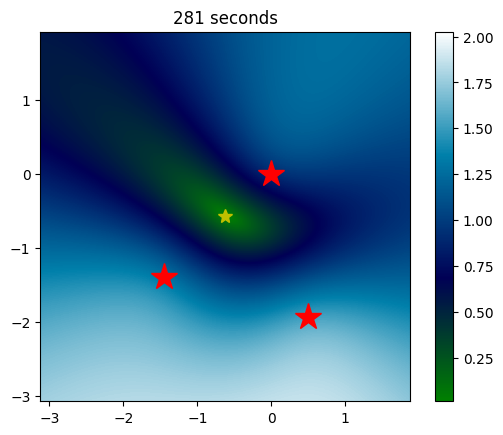

k 1 valid k 1 Time in min. 282 horizontal angle 69.0 azimuth 296
0.009283983011369928 -0.575 -0.6500000000000001 -0.71
k 2 valid k 2 Time in min. 283 horizontal angle 74.0 azimuth 297
0.00871838701222425 -0.49999999999999994 -0.7750000000000001 -0.715
k 3 valid k 3 Time in min. 283 horizontal angle 70.0 azimuth 300
0.01008328222072176 -0.575 -0.7000000000000002 -0.715
k 4 valid k 4 Time in min. 284 horizontal angle 71.0 azimuth 308
0.008532051410997835 -0.625 -0.7250000000000002 -0.72
k 5 valid k 5 Time in min. 285 horizontal angle 72.0 azimuth 313
0.010426192831327619 -0.65 -0.7750000000000002 -0.72
k 6 valid k 6 Time in min. 285 horizontal angle 75.0 azimuth 312
0.0032628800595744765 -0.575 -0.8250000000000003 -0.72
k 7 valid k 7 Time in min. 286 horizontal angle 71.0 azimuth 318
0.009396999614982063 -0.6749999999999999 -0.7750000000000002 -0.725
k 8 valid k 8 Time in min. 287 horizontal angle 73.0 azimuth 316
0.01372043611239253 -0.6249999999999999 -0.8000000000000003 -0.73
k 9 vali

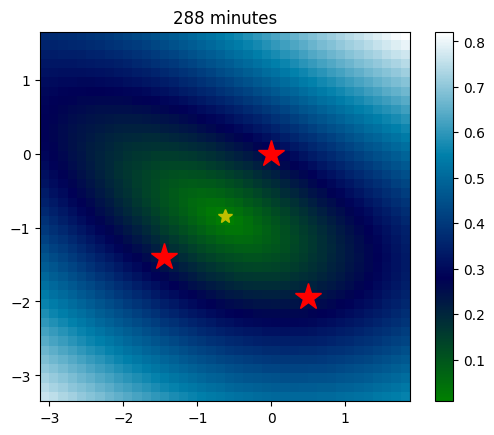

0.008210133222400906 -0.6249999999999999 -0.8500000000000003 -0.73
k 11 valid k 11 Time in min. 289 horizontal angle 74.0 azimuth 328
0.010263249837396663 -0.6749999999999999 -0.8750000000000003 -0.735
k 12 valid k 12 Time in min. 290 horizontal angle 76.0 azimuth 325
0.003779422842739255 -0.5999999999999999 -0.9000000000000004 -0.735
k 13 valid k 13 Time in min. 290 horizontal angle 80.0 azimuth 349
0.013271678179663992 -0.5249999999999999 -1.0750000000000004 -0.735
k 14 valid k 14 Time in min. 291 horizontal angle 84.0 azimuth 340
0.010851002826423203 -0.4499999999999999 -1.0500000000000005 -0.74
k 15 valid k 15 Time in min. 292 horizontal angle 82.0 azimuth 332
0.01211823016298157 -0.4999999999999999 -1.0000000000000004 -0.745
k 16 valid k 16 Time in min. 292 horizontal angle 82.0 azimuth 305
0.011379783152797402 -0.4249999999999999 -0.9500000000000004 -0.75
k 17 valid k 17 Time in min. 293 horizontal angle 81.0 azimuth 287
0.008826173845435532 -0.39999999999999986 -0.90000000000000

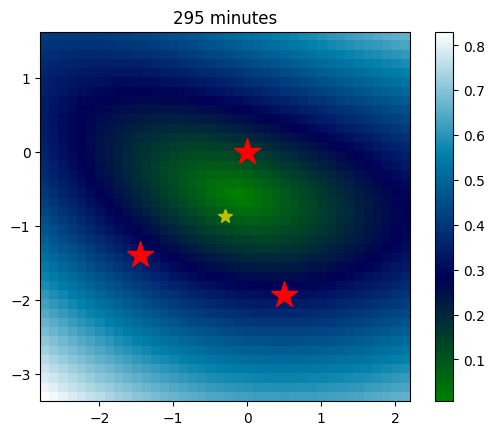

0.006199254942128713 -0.2999999999999998 -0.8750000000000003 -0.76
k 21 valid k 21 Time in min. 296 horizontal angle 78.0 azimuth 275
0.008287733184368477 -0.3499999999999998 -0.8250000000000003 -0.76
k 22 valid k 22 Time in min. 296 horizontal angle 79.0 azimuth 301
0.006513189231948582 -0.4749999999999998 -0.8750000000000003 -0.76
k 23 valid k 23 Time in min. 297 horizontal angle 80.0 azimuth 310
0.0053563144671650124 -0.4749999999999998 -0.9250000000000004 -0.76
k 24 valid k 24 Time in min. 298 horizontal angle 78.0 azimuth 294
0.0035110719674884302 -0.4499999999999998 -0.8500000000000003 -0.765
k 25 valid k 25 Time in min. 298 horizontal angle 80.0 azimuth 281
0.011999803141480917 -0.3749999999999998 -0.8750000000000003 -0.77
k 26 valid k 26 Time in min. 299 horizontal angle 80.0 azimuth 285
0.00822774449187378 -0.3999999999999998 -0.8750000000000003 -0.77
k 27 valid k 27 Time in min. 300 horizontal angle 86.0 azimuth 255
0.014306893974832929 -0.2999999999999998 -1.0000000000000004

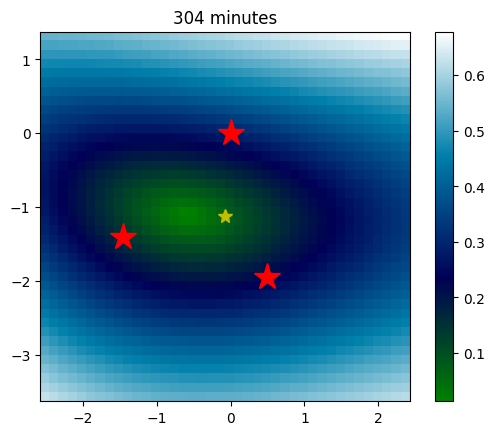

0.012935451844134215 -0.07499999999999982 -1.1250000000000004 -0.785
k 31 valid k 31 Time in min. 305 horizontal angle 79.0 azimuth 156
0.011961262657101481 -0.049999999999999815 -1.2250000000000005 -0.79
k 32 valid k 32 Time in min. 305 horizontal angle 79.0 azimuth 181
0.0009378936763367595 -0.049999999999999815 -1.1000000000000005 -0.79
k 33 valid k 33 Time in min. 306 horizontal angle 84.0 azimuth 174
0.004711780852724102 -0.14999999999999983 -1.1250000000000004 -0.795
k 34 valid k 34 Time in min. 307 horizontal angle 80.0 azimuth 159
0.011922560185467976 -0.07499999999999982 -1.2000000000000004 -0.8
k 35 valid k 35 Time in min. 307 horizontal angle 77.0 azimuth 146
0.005469900984532653 -0.049999999999999815 -1.2750000000000004 -0.805
k 36 valid k 36 Time in min. 308 horizontal angle 82.0 azimuth 159
0.006864987218255284 -0.12499999999999983 -1.1750000000000003 -0.805
k 37 valid k 37 Time in min. 309 horizontal angle 80.0 azimuth 156
0.006119640197403132 -0.07499999999999983 -1.200

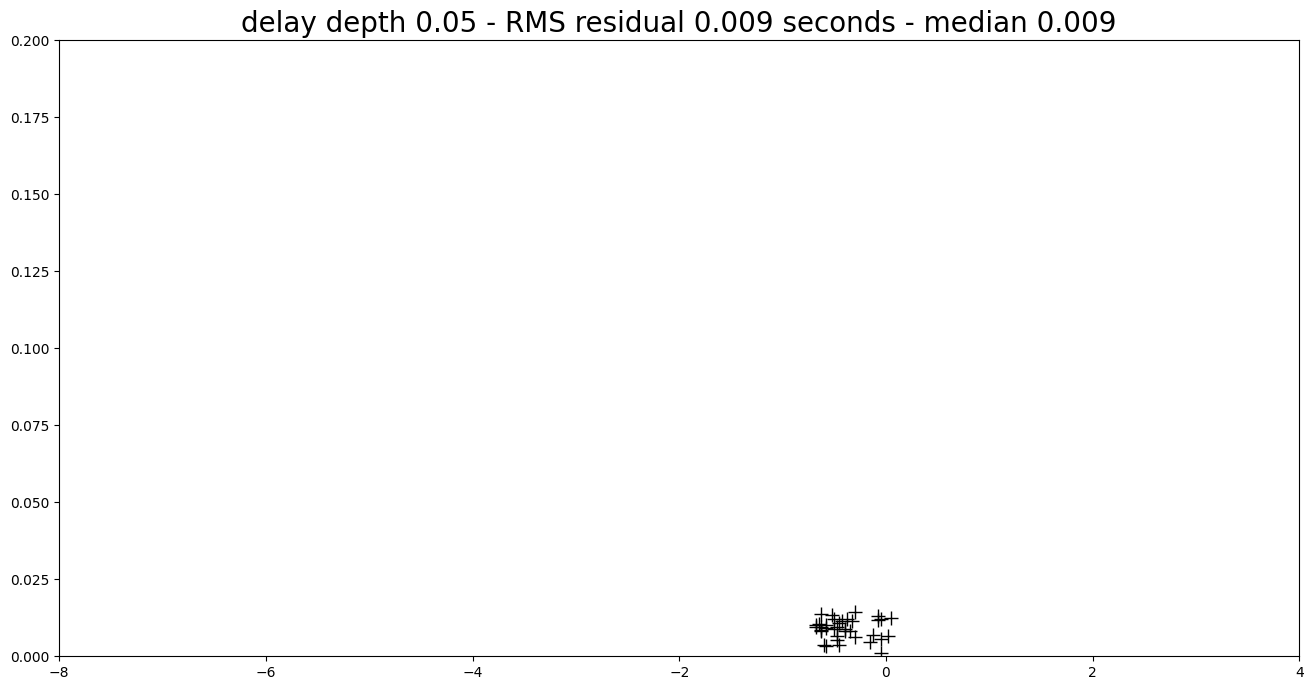

281
288
295
304


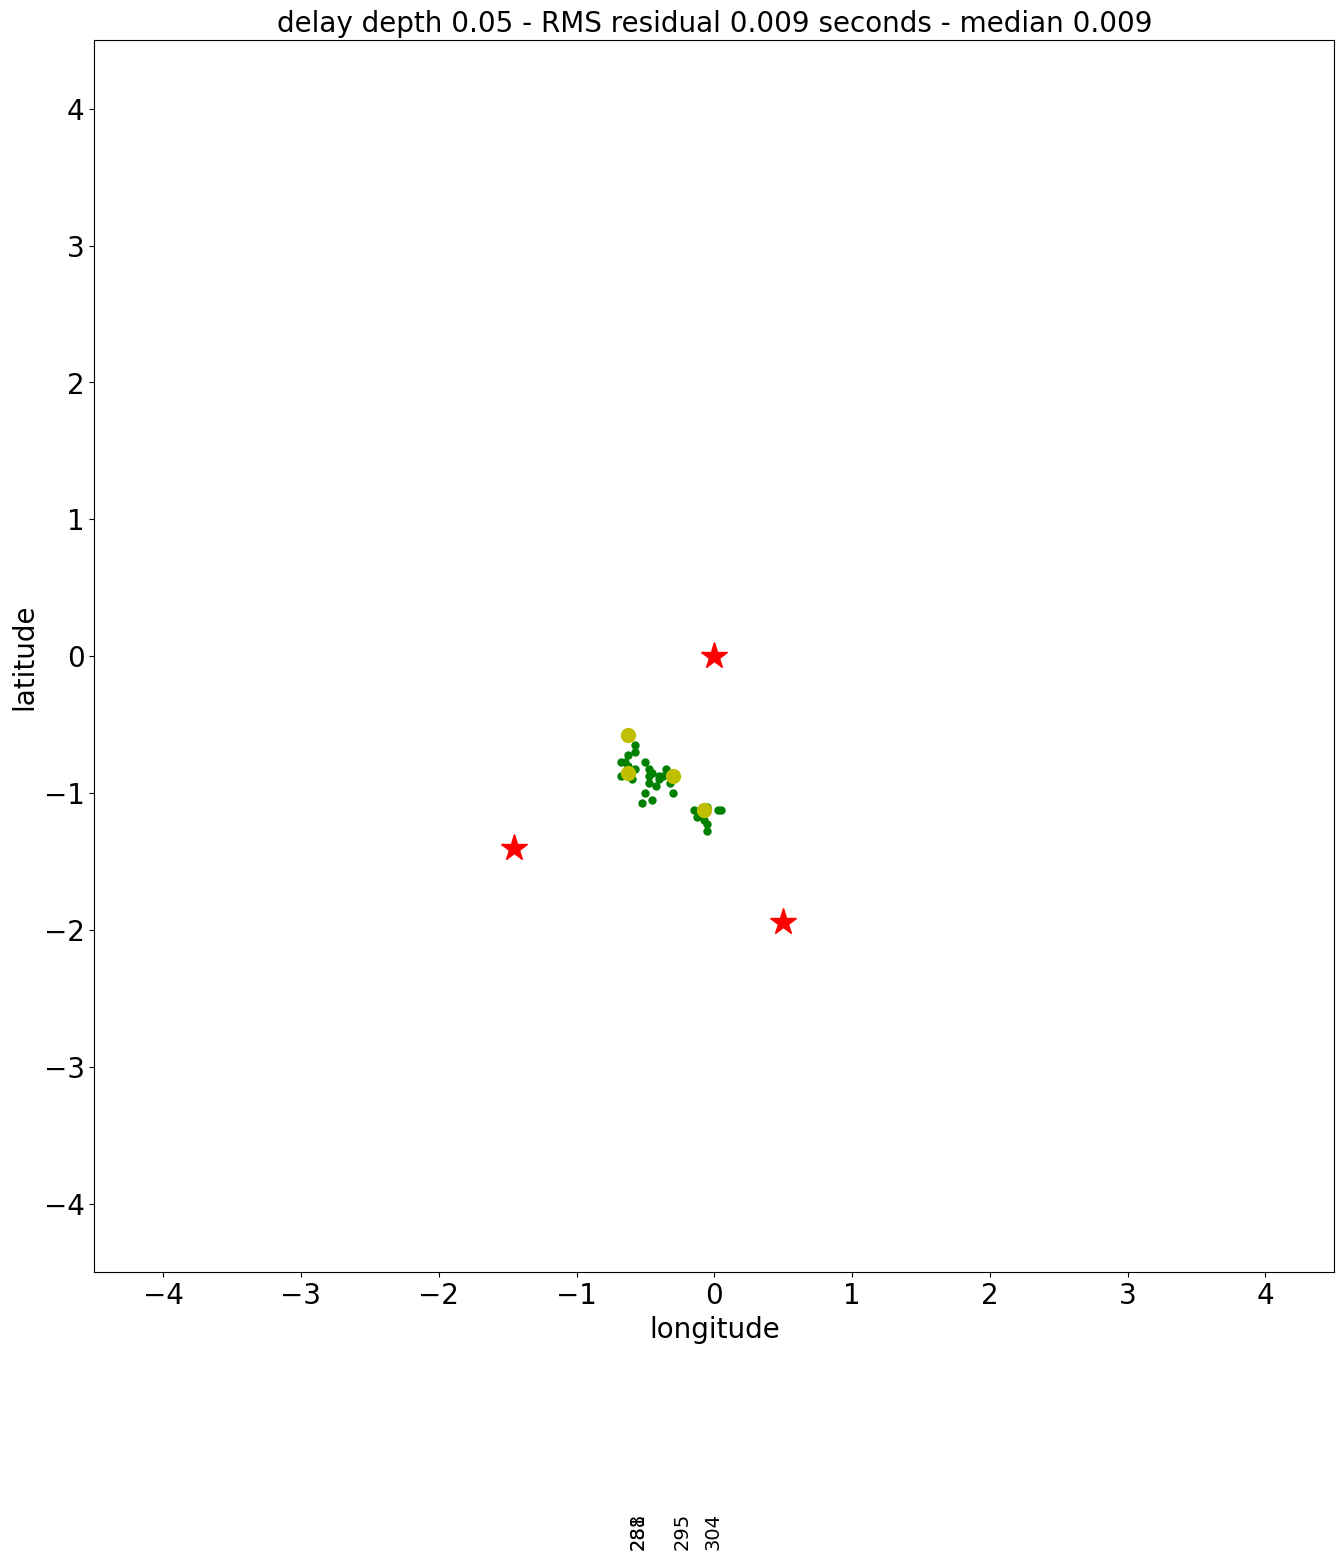

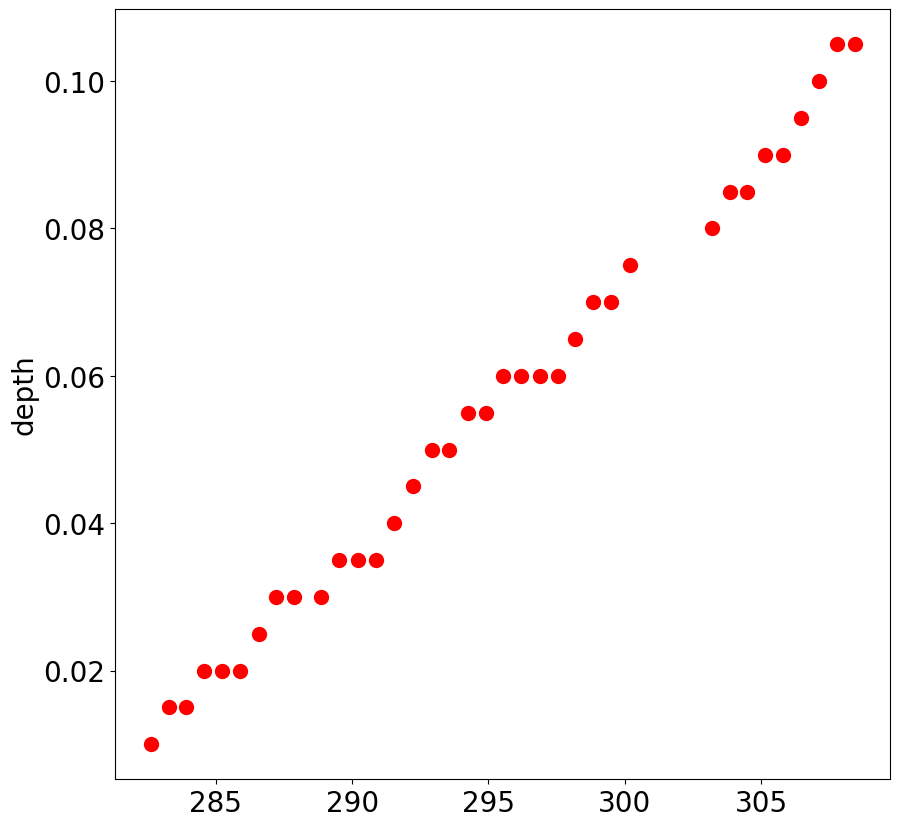

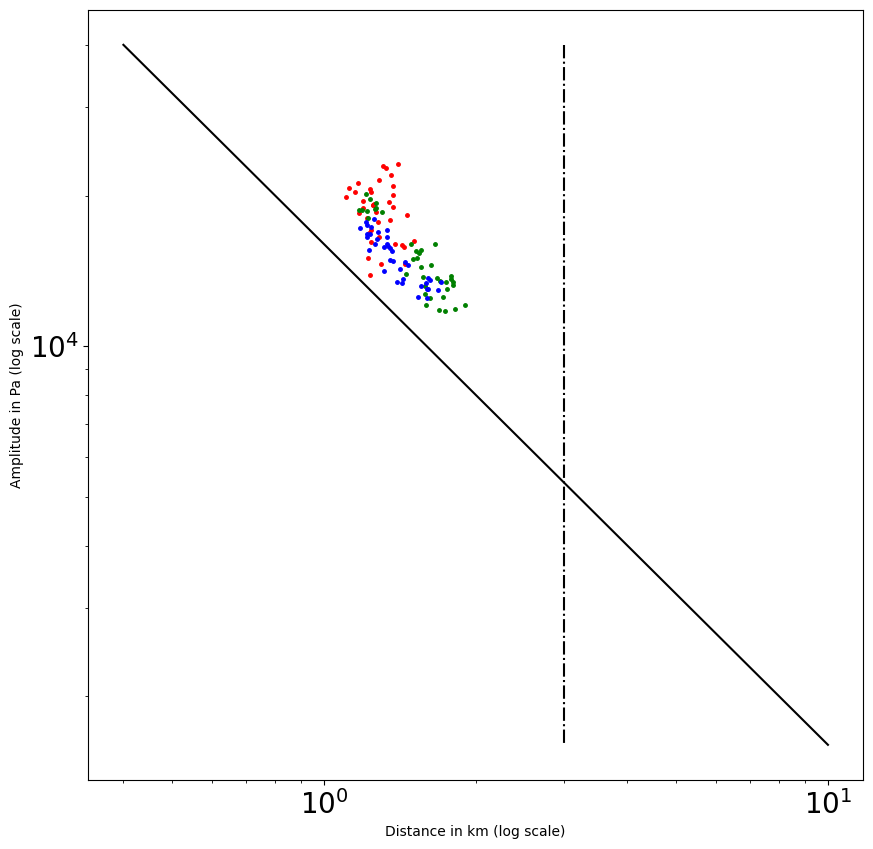

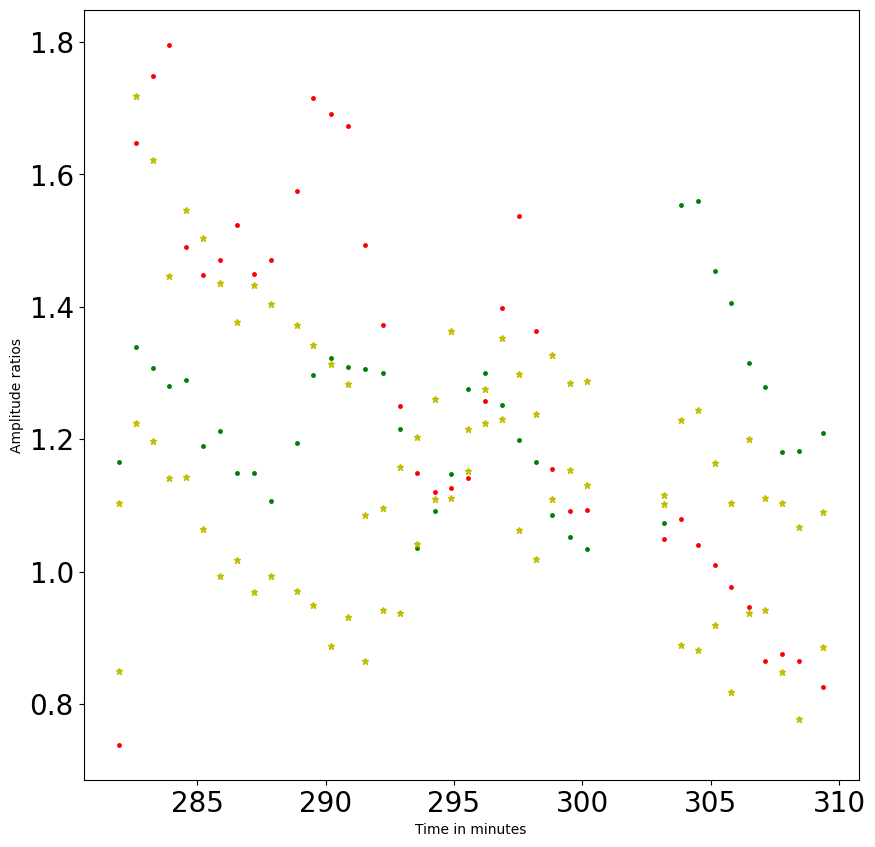

In [8]:
# Forward calculation TT differences and amplitude ratios
# limited search around previous point
#
xp = np.empty(0)
yp = np.empty(0)
zp = np.empty(0)
tp = np.empty(0)
dp = np.empty(0)
ap = np.empty(0)
amp1 = np.empty(0)
amp2 = np.empty(0)
amp3 = np.empty(0)
delay12 = np.empty(0)
delay31 = np.empty(0)
times = np.empty(0)
apvel = np.empty(0)
azim = np.empty(0)
resa = np.empty(0)
typAB = 'B'
del12 = np.load(path+"delay12"+"_"+timestring+"_"+str(Interval)+".npy")
del31 = np.load(path+"delay31"+"_"+timestring+"_"+str(Interval)+".npy")
a1 = np.load(path+"amp1"+"_"+timestring+"_"+str(Interval)+".npy")
a2 = np.load(path+"amp2"+"_"+timestring+"_"+str(Interval)+".npy")
a3 = np.load(path+"amp3"+"_"+timestring+"_"+str(Interval)+".npy")
ti = np.load(path+"times"+"_"+timestring+"_"+str(Interval)+".npy")
vel = np.load(path+"apvel"+"_"+timestring+"_"+str(Interval)+".npy")
az = np.load(path+"azim"+"_"+timestring+"_"+str(Interval)+".npy")
typ = np.load(path+"type"+"_"+timestring+"_"+str(Interval)+".npy")
nk = len(del12)
for k in range(nk):
  print(k, "Type of call:",typ[k])
  if (typ[k] == typAB):
    print("This is a ",typ[k]," call")
    amp1 = np.append(amp1,a1[k])
    amp2 = np.append(amp2,a2[k])
    amp3 = np.append(amp3,a3[k])
    delay12 = np.append(delay12,del12[k])
    delay31 = np.append(delay31,del31[k])
    times = np.append(times,ti[k])
    apvel = np.append(apvel,vel[k])
    azim = np.append(azim,az[k])

nk = len(delay12)
#
# Find first point
#
a12 = amp1[0]/amp2[0]
a31 = amp3[0]/amp1[0]
delay_only = True
amp_only = False
wdepth = -0.700
ndep = 2
if(amp_only): resmet = "amp "
if(delay_only): resmet = "delay "
if(not amp_only and not delay_only): resmet = "amp and delay "
res,xinit,yinit,zinit,resmap = MinRes(delay12[0],delay31[0],a12,a31,wdepth, delay_only,amp_only, S1, S2, S3)
print(res,xinit,yinit,zinit)
xp=np.append(xp,xinit)
yp = np.append(yp,yinit)
zp=np.append(zp,zinit)
tp=np.append(tp,times[0])
x = (xinit, yinit, zinit)
d1 = Norm(Diff(S1,x))
d2 = Norm(Diff(S2,x))
d3 = Norm(Diff(S3,x))
dp=np.append(dp,d1)
dp=np.append(dp,d2)
dp=np.append(dp,d3)
d1 = Norm(Diff(S1,x))
d2 = Norm(Diff(S2,x))
d3 = Norm(Diff(S3,x))
ap=np.append(ap,amp1[0])
ap=np.append(ap,amp2[0])
ap=np.append(ap,amp3[0])
extent = (-5,5, 5,-5)
plt.imshow(resmap, cmap = 'ocean', extent = extent)
pstr="{num} seconds".format(num=int(times[0]))
plt.title(pstr)
plt.ylim([yinit-2.5,yinit+2.5])
plt.xlim([xinit-2.5,xinit+2.5])
plt.plot(xinit,yinit,'y*', markersize=10)
plt.plot([0],[0],'r*', markersize=20)
plt.plot([x2[1]],[x2[0]],'r*', markersize=20)
plt.plot([x3[1]],[x3[0]],'r*', markersize=20)
plt.colorbar(orientation='vertical')
plt.show()
k = 1
vk = 1
nocomp = False
res_all = res*res
resa=np.append(resa,res)
while k < nk :
  print("k",k, "valid k", vk, "Time in min.",int(times[k]),"horizontal angle",apvel[k],"azimuth", int(180*azim[k]/np.pi))
  if  (apvel[k] < 20 and nocomp) :
    k += 1
    continue
#
# Amplitude ratios should be inverse of distance ratios
#

  a12 = amp1[k]/amp2[k]
  a13 = amp1[k]/amp3[k]
  res,xx,yy,zz, resmap = MinResInc(delay12[k],delay31[k],a12,a31,xinit,yinit,
                           zinit, ndep, delay_only,amp_only, S1, S2, S3)
  res_all += res*res
  resa=np.append(resa,res)
  if (not vk%10):
    dx = 2.5
    extent = (xx-dx,xx+dx, yy+dx,yy-dx)
    plt.imshow(resmap, cmap = 'ocean', extent = extent)
    pstr="{num} minutes".format(num=int(times[k]))
    plt.title(pstr)
    plt.ylim([yy-dx,yy+dx])
    plt.xlim([xx-dx,xx+dx])
    plt.plot(xx,yy,'y*', markersize=10)
    plt.plot([0],[0],'r*', markersize=20)
    plt.plot([x2[1]],[x2[0]],'r*', markersize=20)
    plt.plot([x3[1]],[x3[0]],'r*', markersize=20)
    plt.colorbar(orientation='vertical')
    plt.show()
  xinit = xx
  yinit = yy
  zinit = zz
  xp=np.append(xp,xx)
  yp=np.append(yp,yy)
  zp=np.append(zp,zz)
  tp=np.append(tp,times[k])
  x = (xx, yy, zz)
  d1 = Norm(Diff(S1,x))
  d2 = Norm(Diff(S2,x))
  d3 = Norm(Diff(S3,x))
  dp=np.append(dp,d1)
  dp=np.append(dp,d2)
  dp=np.append(dp,d3)
  d1 = Norm(Diff(S1,x))
  d2 = Norm(Diff(S2,x))
  d3 = Norm(Diff(S3,x))
  ap=np.append(ap,amp1[k])
  ap=np.append(ap,amp2[k])
  ap=np.append(ap,amp3[k])

  print(res,xx,yy,zz)
  k += 1
  vk += 1
rms_res = math.sqrt(res_all/vk)
med = np.median(resa)
print("Number of calls:",vk)
print("RMS residual:",rms_res)
print("Median residual:",med)
fig, ax = plt.subplots(figsize=(16, 8), )
for j in range (1,vk-1):
  plt.plot(xp[j],resa[j],'k+', markersize=10)
pstrres=resmet+"depth {dep} - RMS residual {num} seconds - median {medd}".format(dep=round(wdepth+0.750,3),num=round(rms_res,3), medd=round(med,3))
plt.title(pstrres, fontsize=20)
plt.ylim([0,0.2])
plt.xlim([-8,4])
plt.show()
fig, ax = plt.subplots(figsize=(16, 16), )
#plt.plot(yp,xp,'k*')
for j in range (0,vk-1):
  plt.plot(xp[j],yp[j],'go', markersize=5)
for j in range (0,vk-1,10):
  pstr="{num}".format(num=int(tp[j]))
  print(pstr)
  plt.plot(xp[j], yp[j], 'yo', markersize=10)
  plt.text(xp[j], -6.5 , pstr, color='k', rotation='vertical', fontsize=14)
# if zp[k] < -0.8 :
# plt.plot(xp[k],yp[k],'bo')
plt.ylabel('latitude', fontsize=20)
plt.xlabel('longitude', fontsize=20)
plt.title(pstrres, fontsize=20)
plt.xticks(fontsize=20)
plt.yticks(fontsize=20)
plt.xlim([-4.5,4.5])
plt.ylim([-4.5,4.5])
plt.plot([0],[0],'r*', markersize=20)
plt.plot([x2[1]],[x2[0]],'r*', markersize=20)
plt.plot([x3[1]],[x3[0]],'r*', markersize=20)
plt.xticks(fontsize=20)
plt.yticks(fontsize=20)
plt.show()
fig, ax = plt.subplots(figsize=(10, 10), )
for j in range (1,vk-1):
  plt.plot(tp[j],wdepth-zp[j],'ro', markersize=10)
  plt.xticks(fontsize=20)
plt.yticks(fontsize=20)
plt.ylabel('depth', fontsize=20)
plt.show()
fig, ax = plt.subplots(figsize=(10, 10), )
onelinx=(0.4,10)
oneliny=(40000,1600)
fourkmlinx=(3.,3.)
fourkmliny=(40000,1600)
for k in range (0,len(dp),3):
  plt.plot(dp[k],ap[k],'r.',markersize=5)
for k in range (1,len(dp),3):
  plt.plot(dp[k],ap[k],'g.',markersize=5)
for k in range (2,len(dp),3):
  plt.plot(dp[k],ap[k],'b.',markersize=5)
plt.plot(onelinx,oneliny,'k-')
plt.plot(fourkmlinx,fourkmliny,'k-.')
plt.yscale('log')
plt.xscale('log')
plt.xlabel('Distance in km (log scale)')
plt.ylabel('Amplitude in Pa (log scale)')
plt.xticks(fontsize=20)
plt.yticks(fontsize=20)
plt.show()
fig, ax = plt.subplots(figsize=(10, 10), )
for k in range (0,len(tp)):
  plt.plot(tp[k],ap[3*(k-1)]/ap[3*(k-1)+1],'r.', tp[k],ap[3*(k-1)]/ap[3*(k-1)+2],'g.', tp[k], dp[3*(k-1)+1]/dp[3*(k-1)],'y*',tp[k], dp[3*(k-1)+2]/dp[3*(k-1)], 'y*', markersize=5)
plt.xlabel('Time in minutes')
plt.ylabel('Amplitude ratios')
plt.xticks(fontsize=20)
plt.yticks(fontsize=20)
plt.show()
#
# Save results
#
if (typAB == 'A'):
  np.save(path+"Adist"+"_"+timestring+"_"+str(Interval),dp)
  np.save(path+"Aamps"+"_"+timestring+"_"+str(Interval),ap)
  np.save(path+"Axp"+"_"+timestring+"_"+str(Interval),xp)
  np.save(path+"Ayp"+"_"+timestring+"_"+str(Interval),yp)
  np.save(path+"Azp"+"_"+timestring+"_"+str(Interval),zp)
  np.save(path+"Atp"+"_"+timestring+"_"+str(Interval),tp)
else :
  np.save(path+"Bdist"+"_"+timestring+"_"+str(Interval),dp)
  np.save(path+"Bamps"+"_"+timestring+"_"+str(Interval),ap)
  np.save(path+"Bxp"+"_"+timestring+"_"+str(Interval),xp)
  np.save(path+"Byp"+"_"+timestring+"_"+str(Interval),yp)
  np.save(path+"Bzp"+"_"+timestring+"_"+str(Interval),zp)
  np.save(path+"Btp"+"_"+timestring+"_"+str(Interval),tp)

Number of A: 597 Number of B: 600
(-0.31888584116312174, -1.1124813333333192)


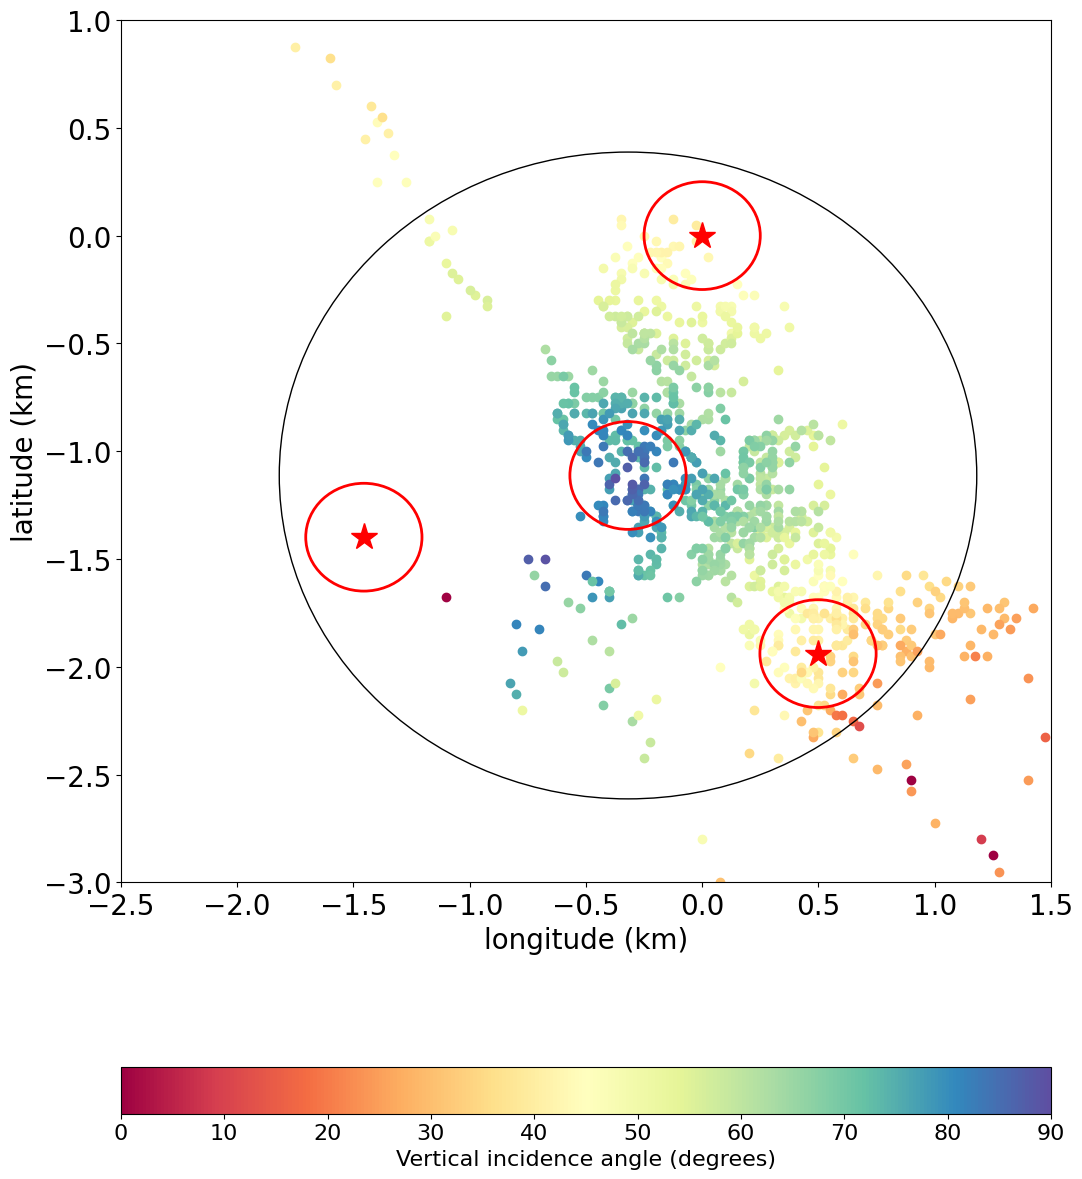

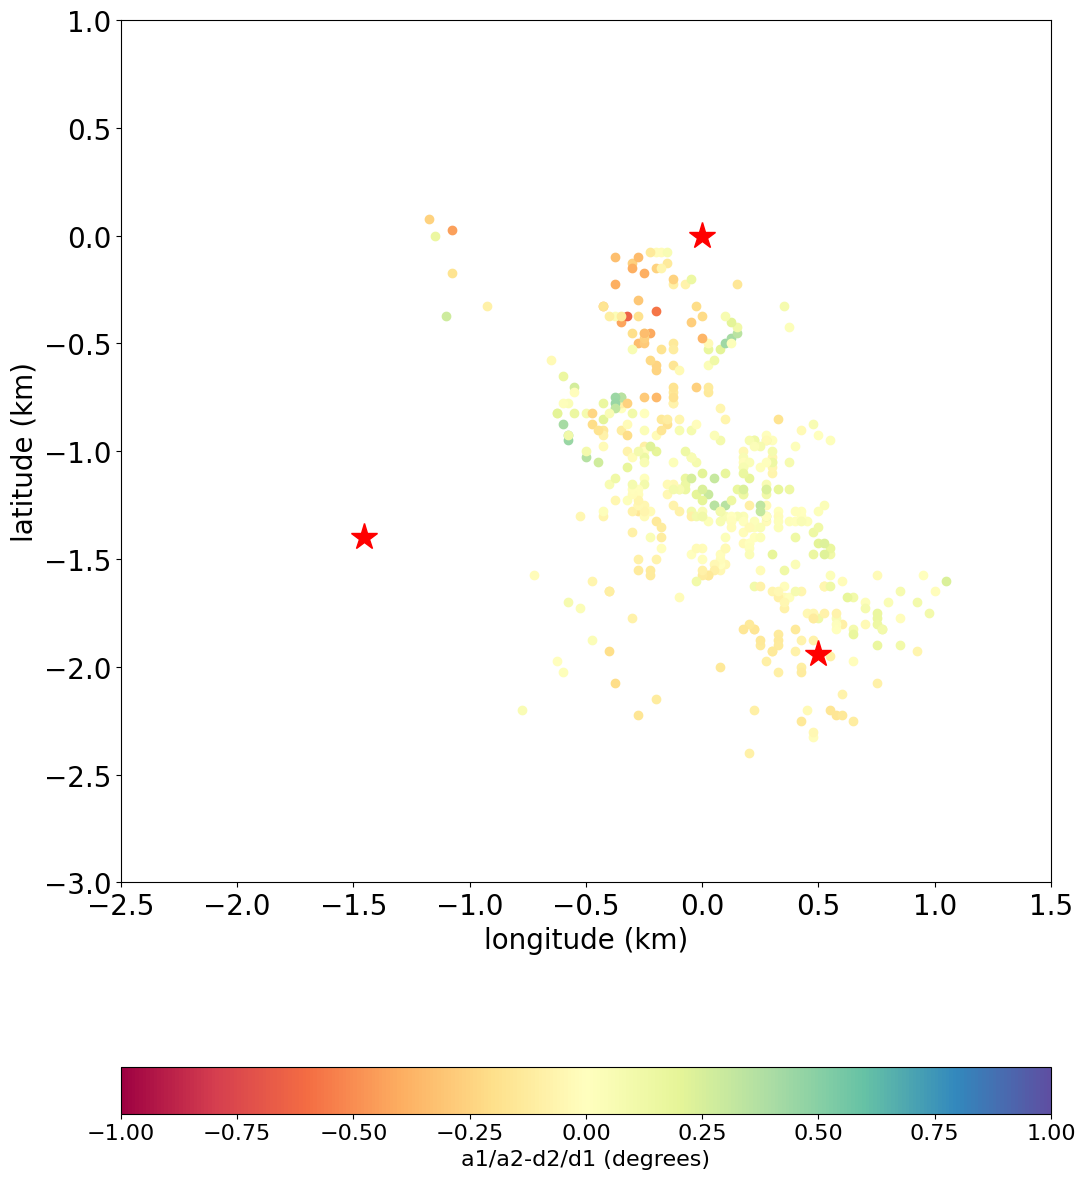

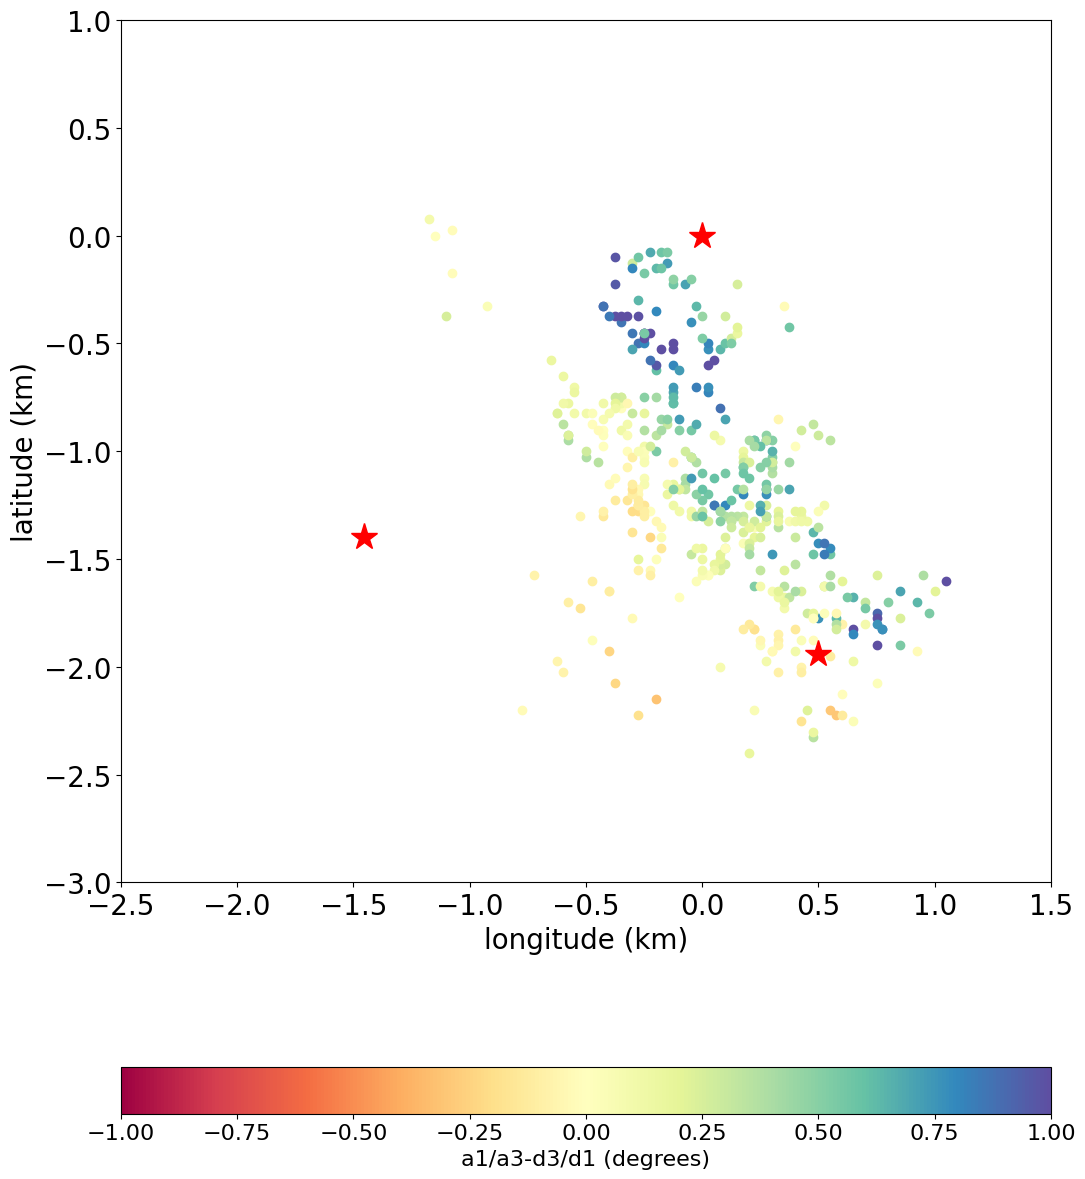

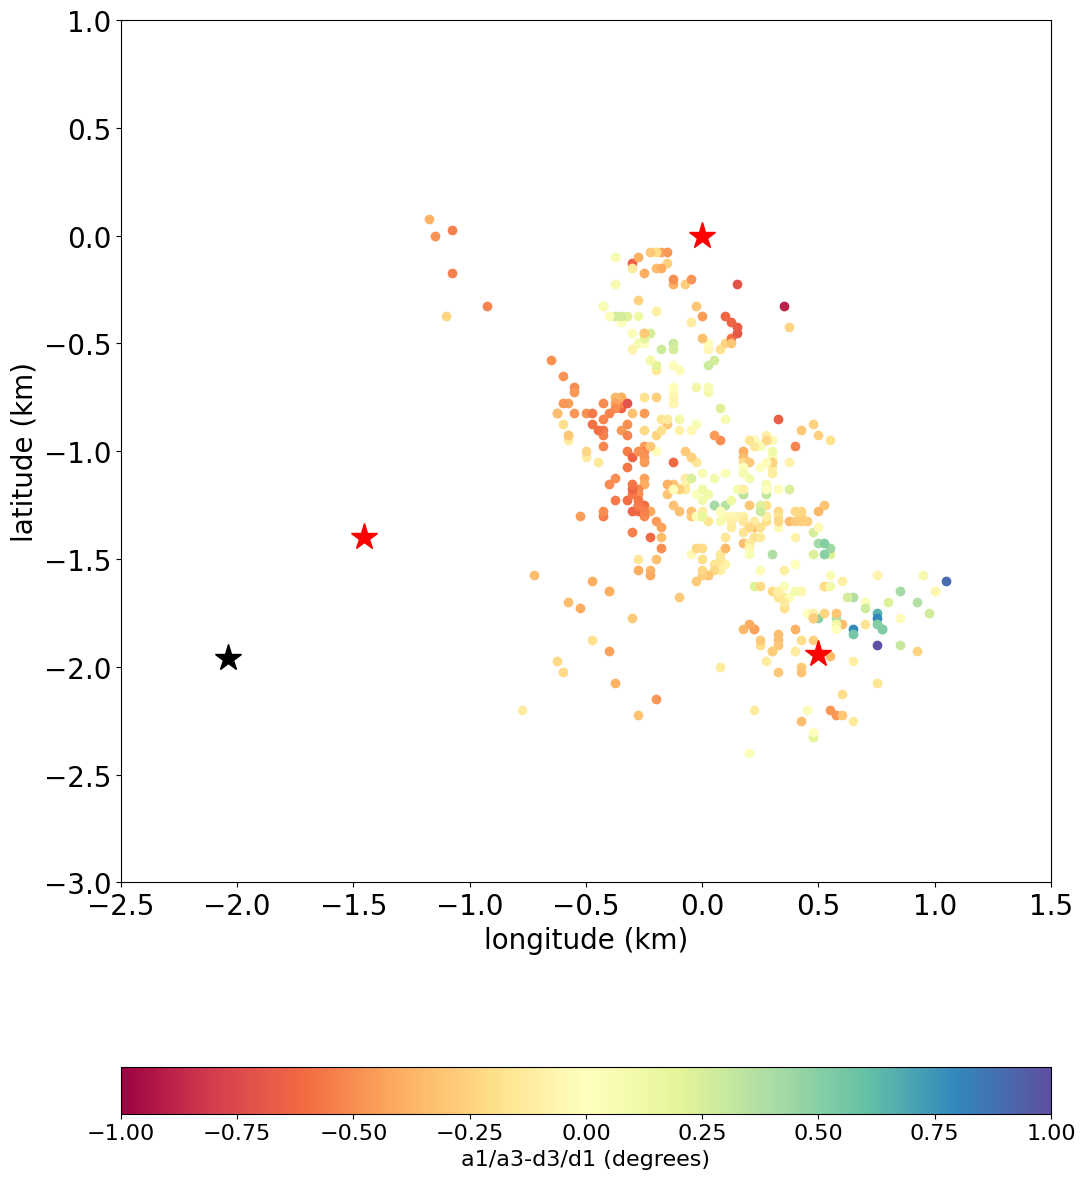

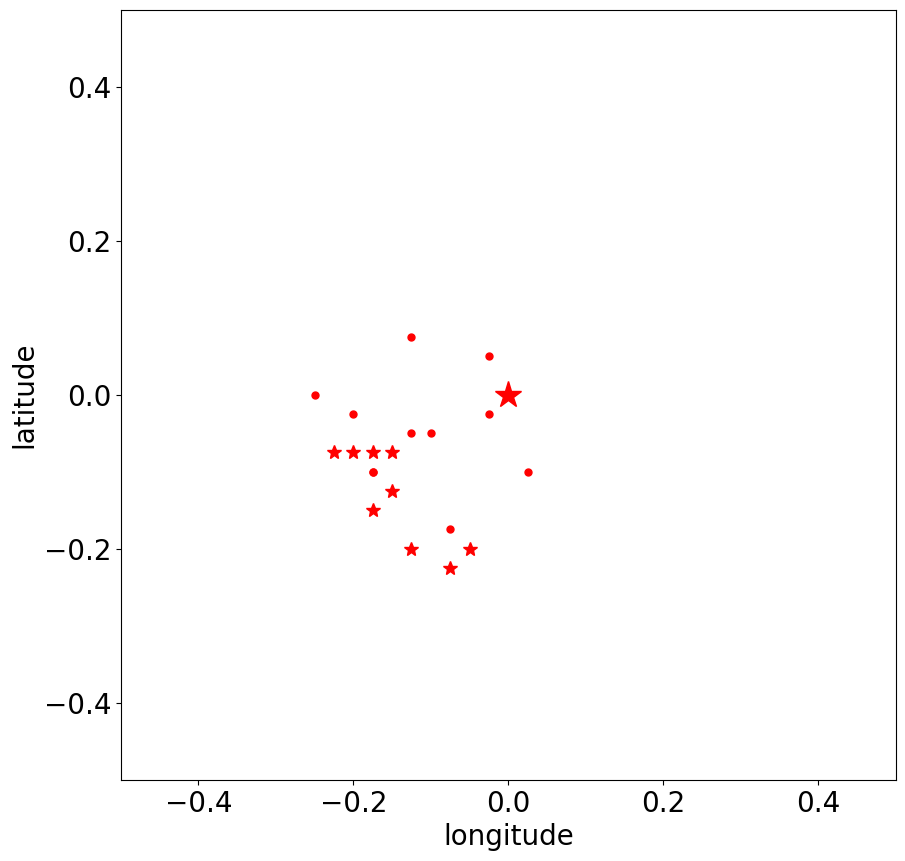

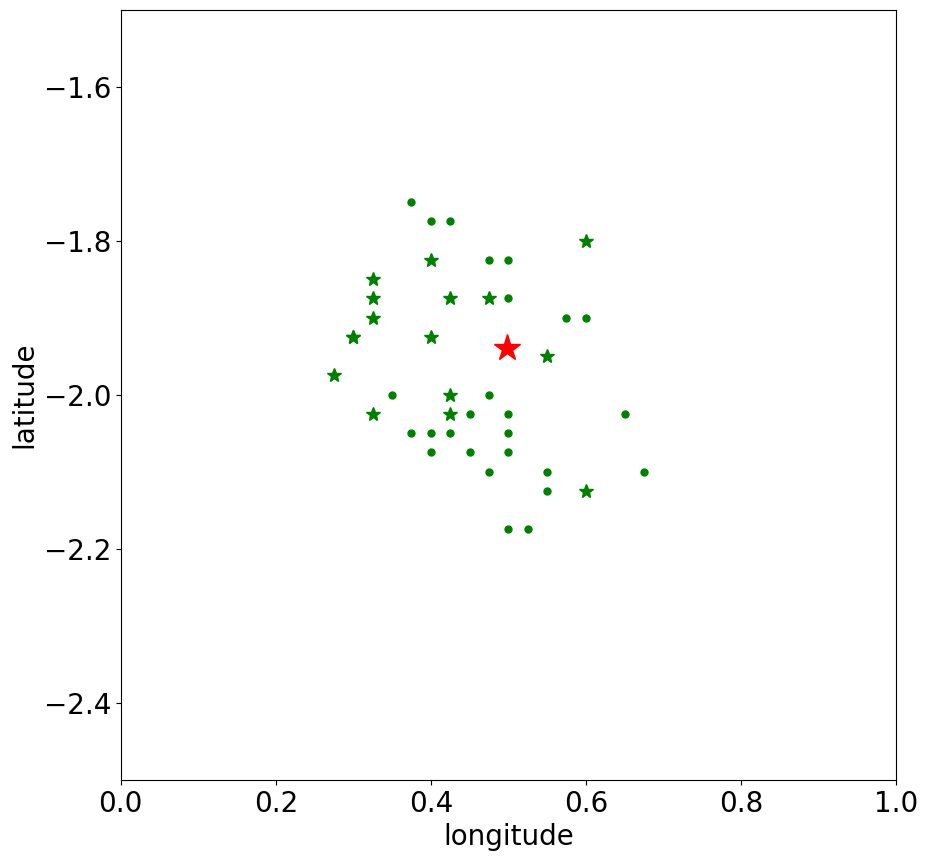

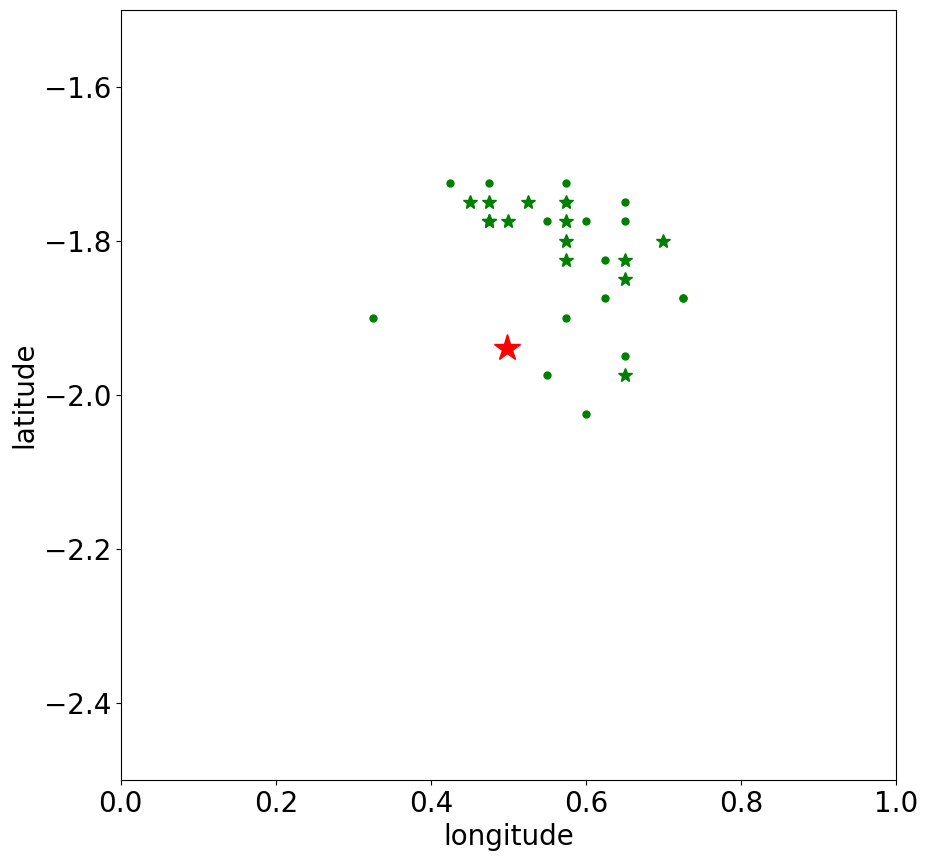

Distance S1 to S2: 2.0
Distance S1 to S3: 2.02


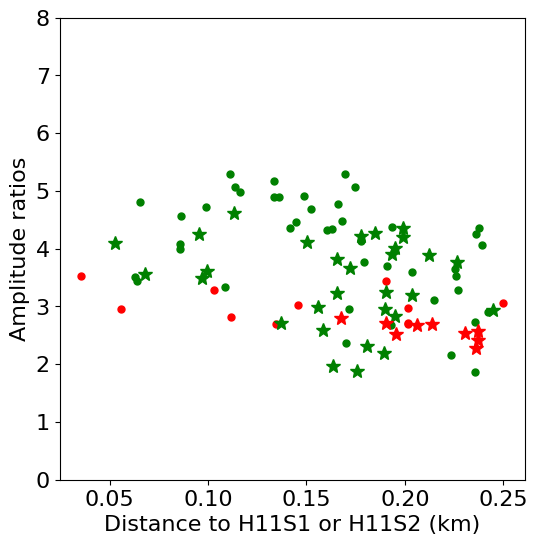

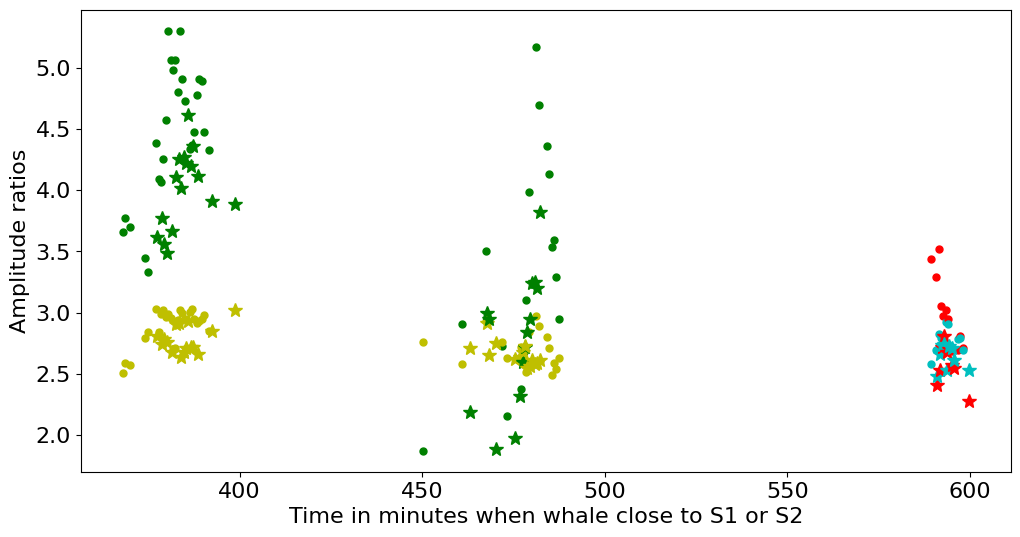

Mean S1: 2.8 +/- 0.3 Mean S2: 3.8 +/- 0.9


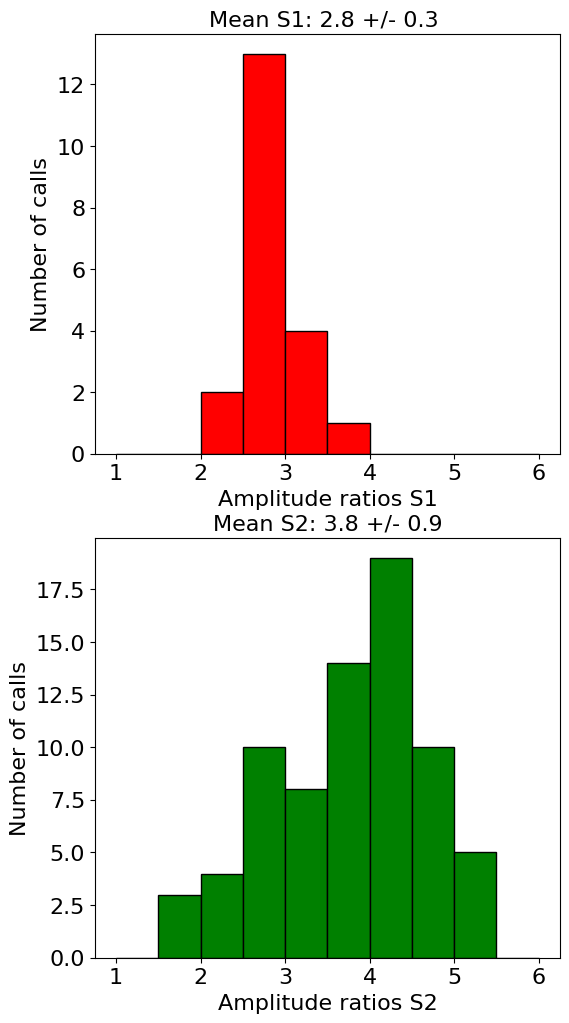

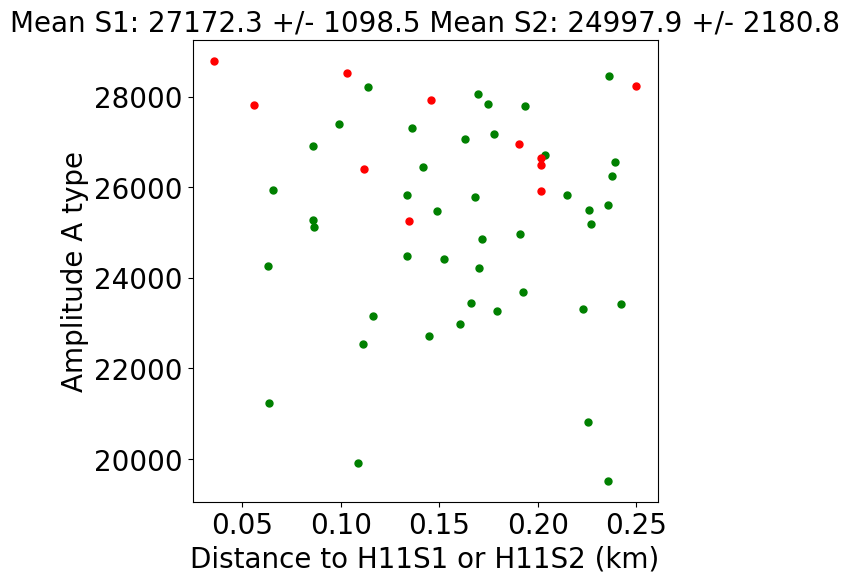

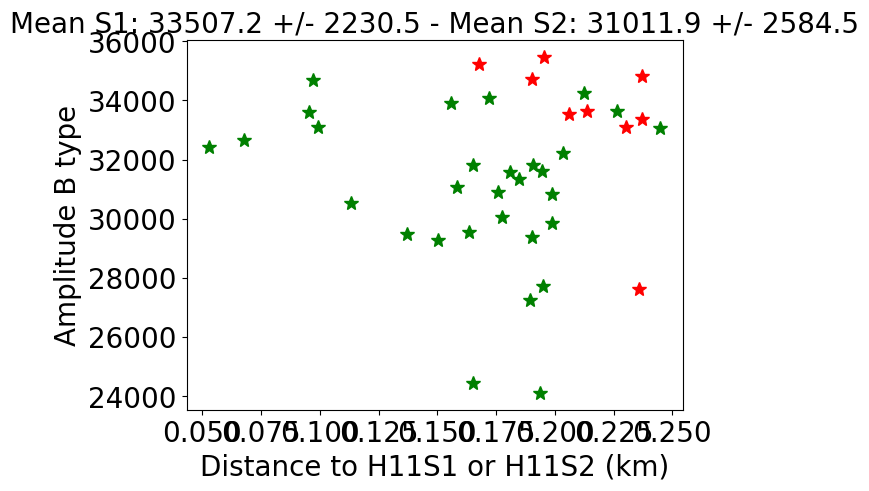

S1: 3.388503641002611 -3.213673157301924 r2: 0.36546475243258925 1.271039590569724 2.003103208911485
S2: 4.398965212014298 -0.7504937959622956 r2: 0.0056571349128630155 11.204833450882502 11.268581335775554


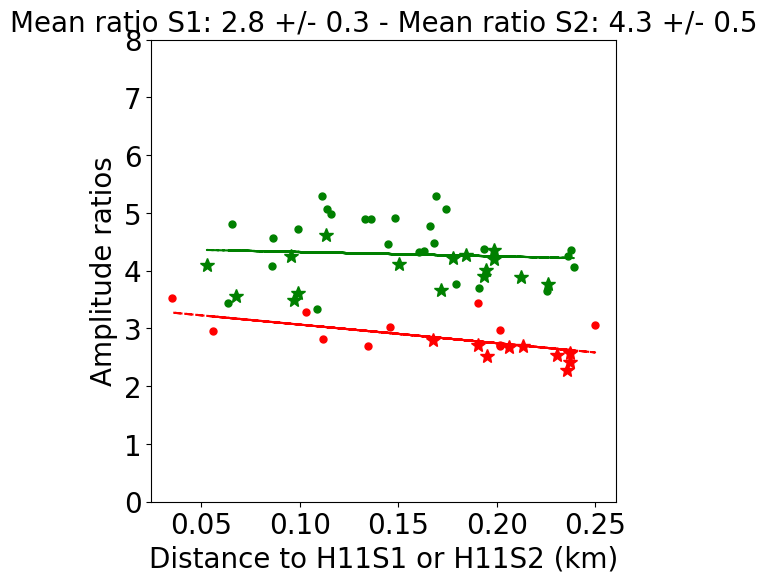

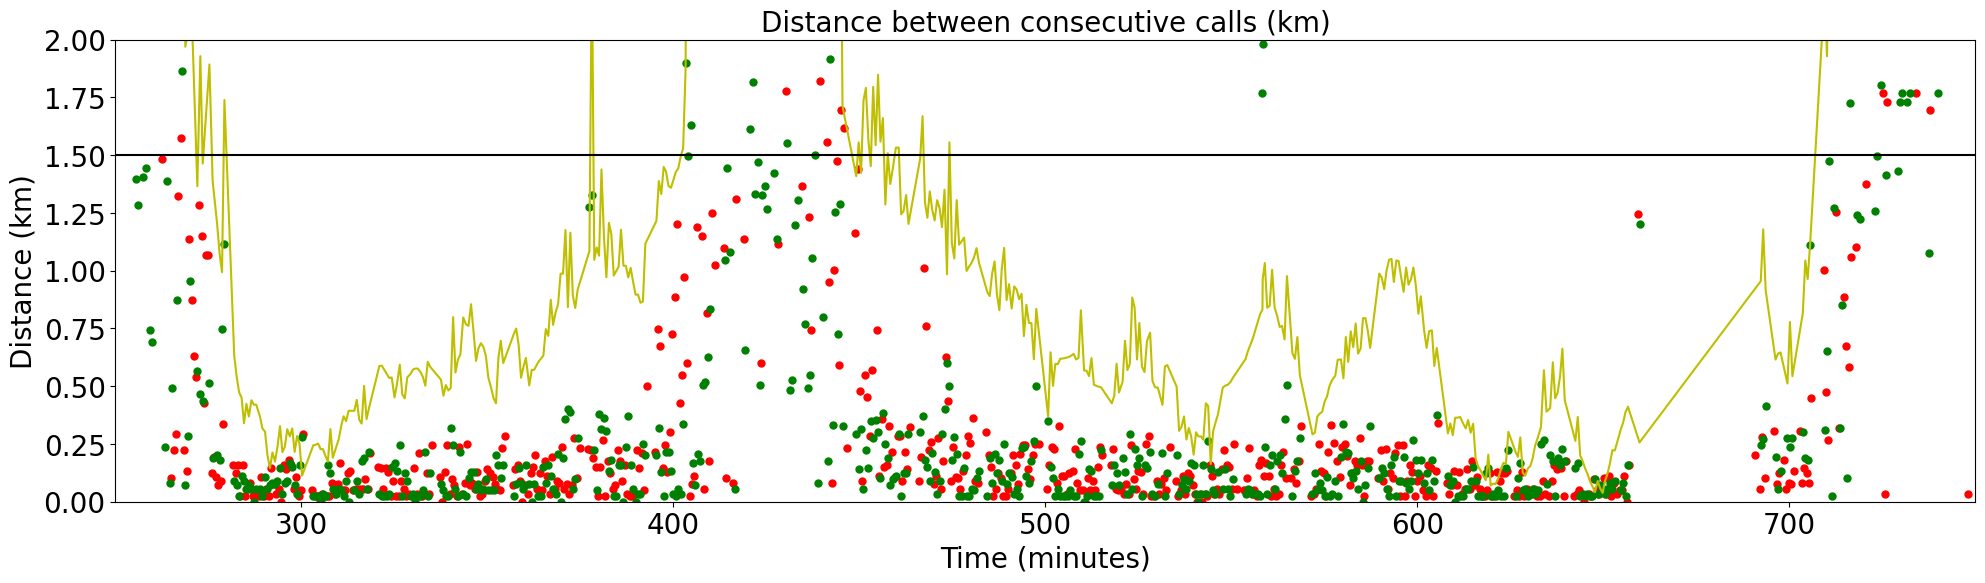

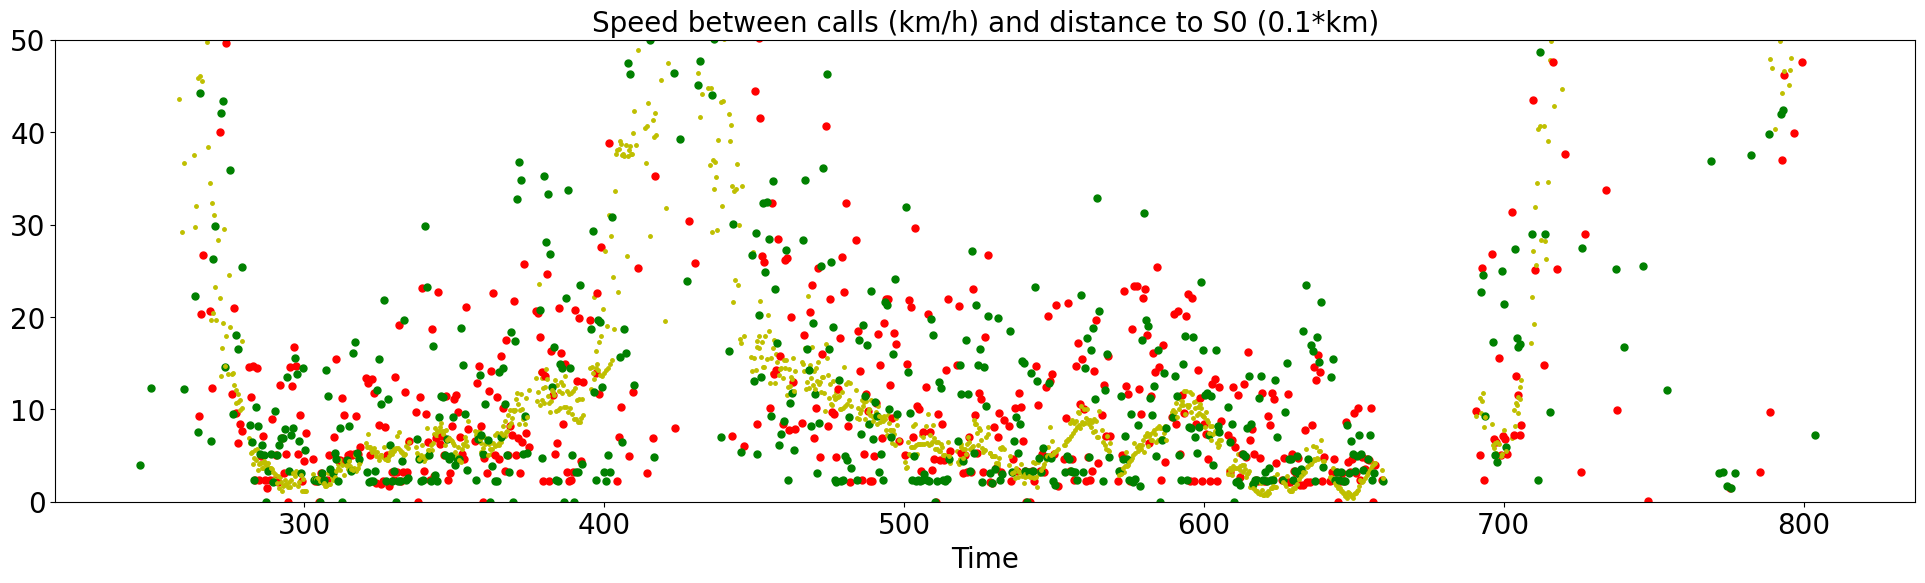

After filtering in distance A: 447 B: 430


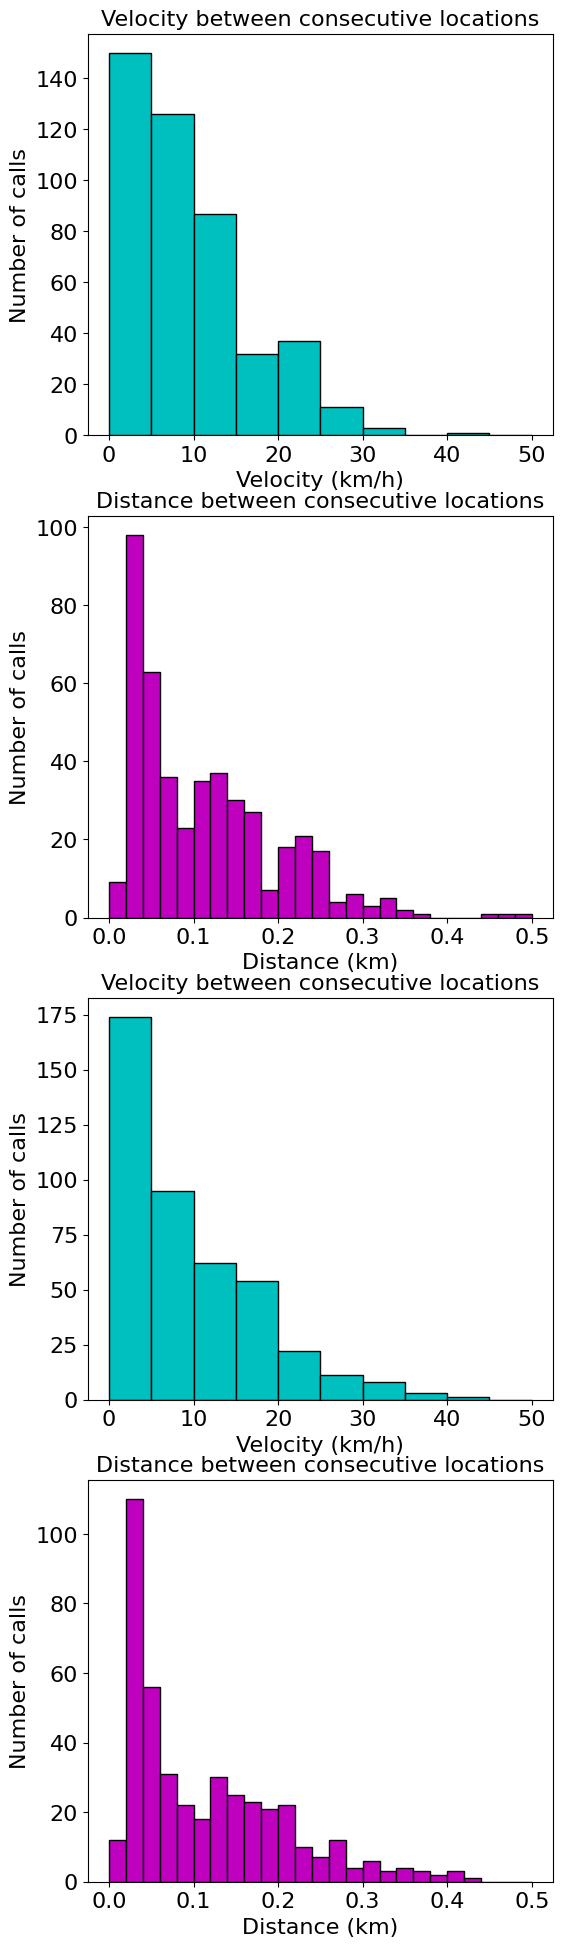

Velocity mean and std 9.44891505104126 7.052045161295408
Distance mean and std 0.1170146640355955 0.10258933003862135
Velocity mean and std 9.572226792127358 8.039844186472958
Distance mean and std 0.1219026033188137 0.12083257473897276


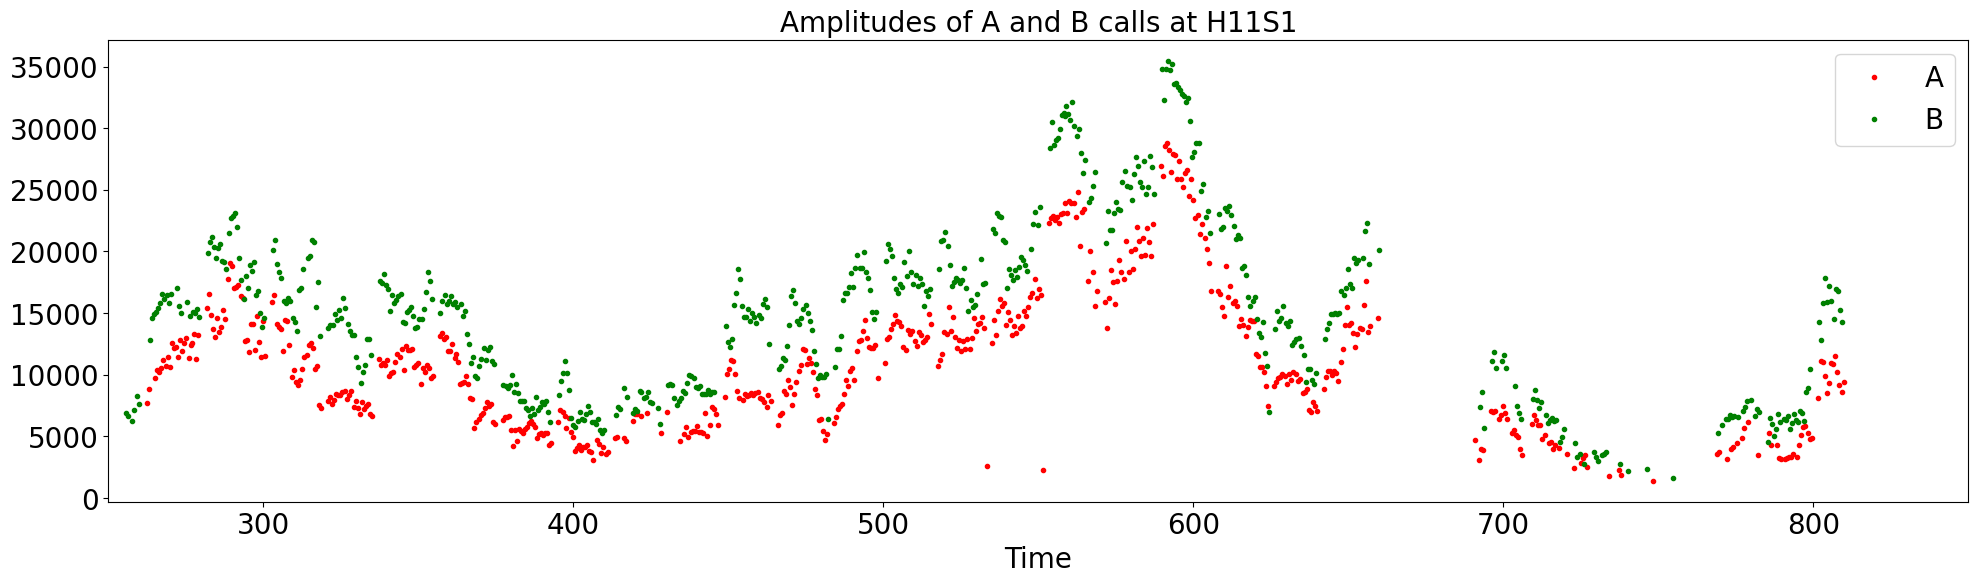

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


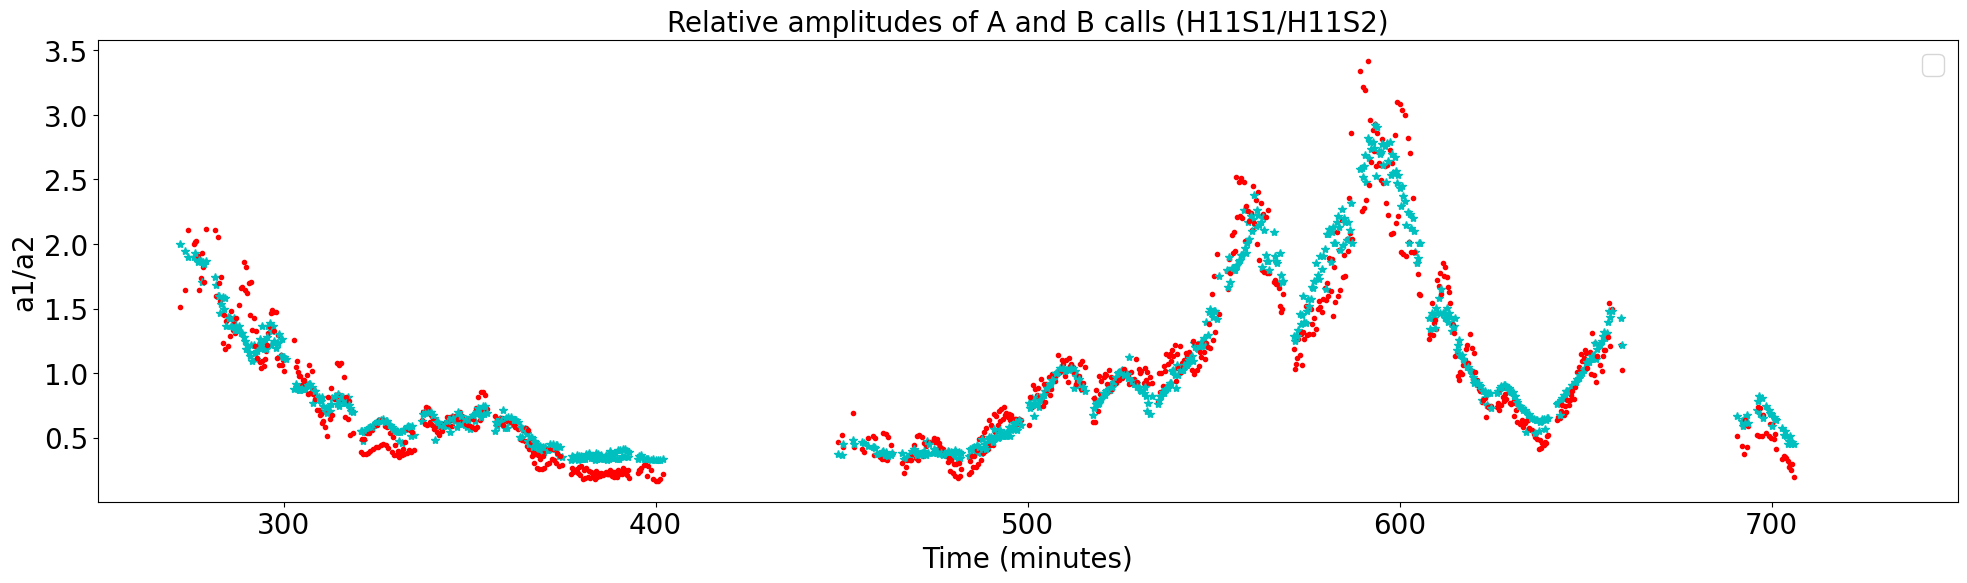

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


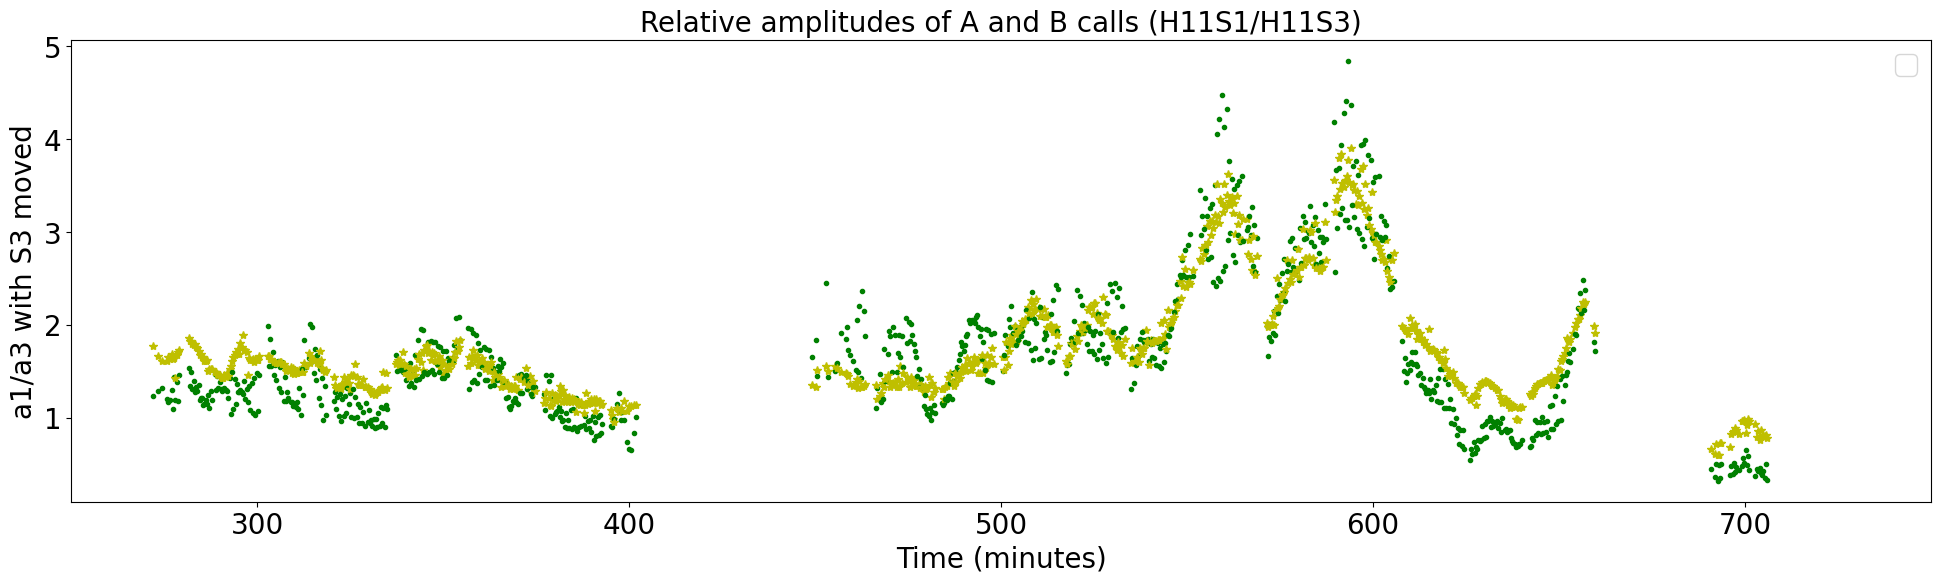

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


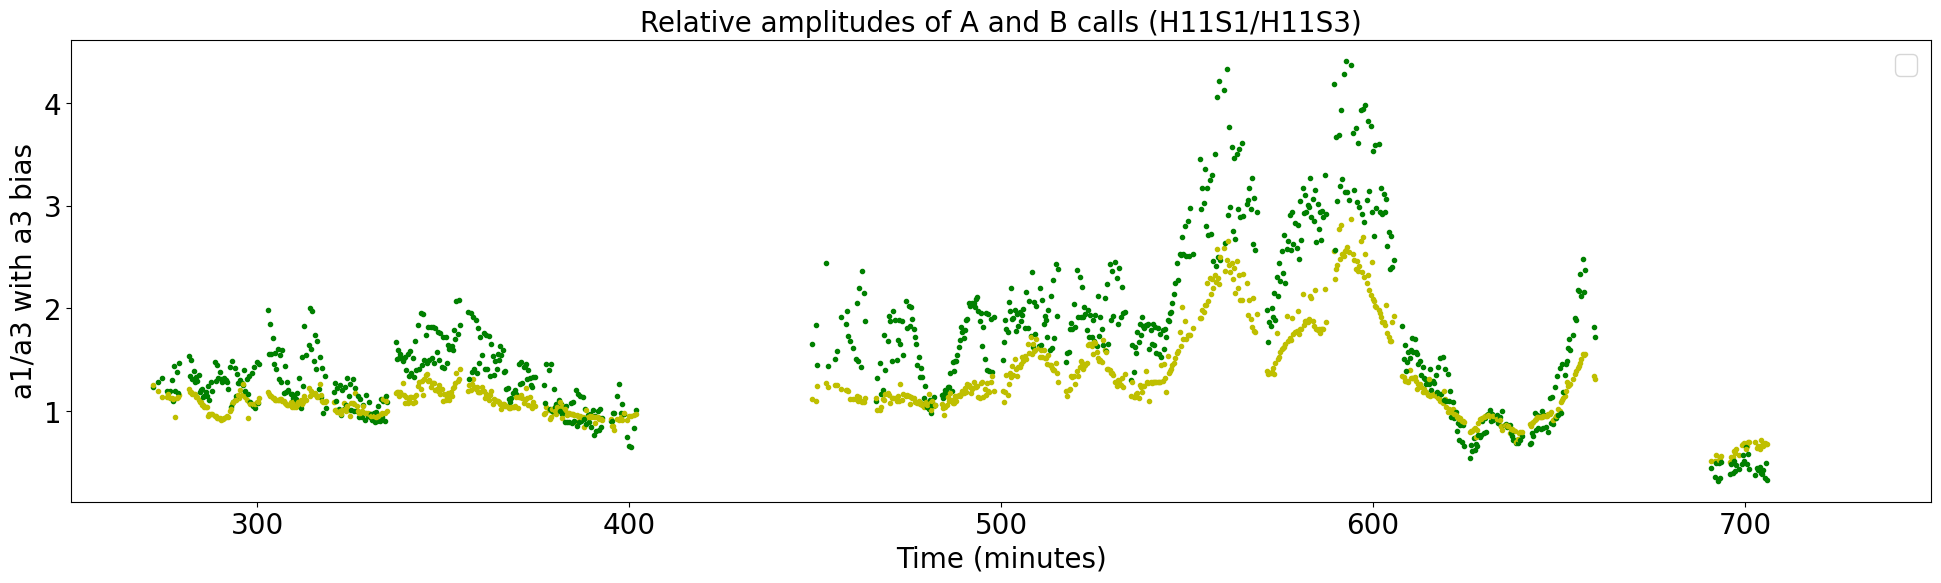

Mean a1/a2 ratio res: -0.002098764996276852 Mean a1/a3 ratio res. S3 moved: -0.00584601885384583 Mean a1/a3 ratio res. biased a3 0.46964792977710496
Std a1/a2: 0.20918756185933599 Std a1/a3 moved S3: 0.37406858071471605 Std a1/a3 bias a3: 0.4672031477471518
Mean d2/d1: 0.9978953333708637 Mean d3/d1: 1.368430386202426
Std d2/d1: 1.165488793880692 Std d3/d1: 1.9766185269669845


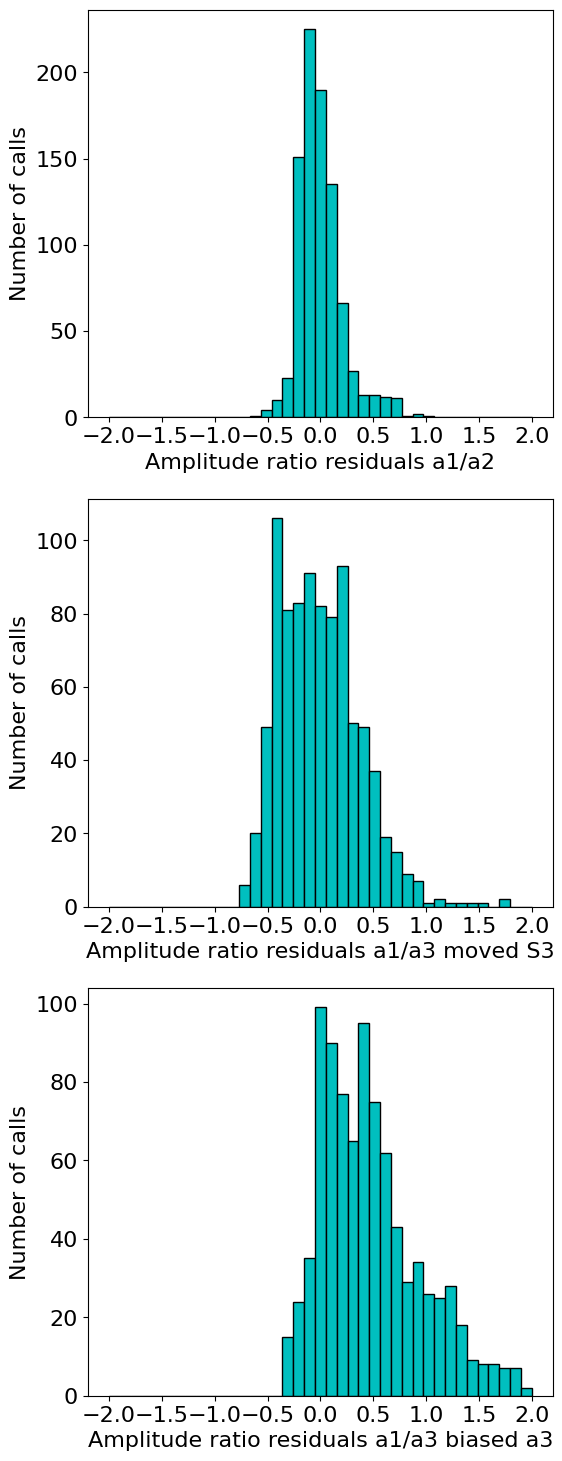

In [ ]:
#
#  Read A and B calls points and plot them on the same map
#  Calculate time consecutive distances. Plot amplitudes for
# A and B and relative amplitudes
#
Ax = np.load(path+"Axp"+"_"+timestring+"_"+str(Interval)+".npy")
Bx = np.load(path+"Bxp"+"_"+timestring+"_"+str(Interval)+".npy")
Ay = np.load(path+"Ayp"+"_"+timestring+"_"+str(Interval)+".npy")
By = np.load(path+"Byp"+"_"+timestring+"_"+str(Interval)+".npy")
Az = np.load(path+"Azp"+"_"+timestring+"_"+str(Interval)+".npy")
Bz = np.load(path+"Bzp"+"_"+timestring+"_"+str(Interval)+".npy")
At = np.load(path+"Atp"+"_"+timestring+"_"+str(Interval)+".npy")
Bt = np.load(path+"Btp"+"_"+timestring+"_"+str(Interval)+".npy")
Aamp1 = np.load(path+"Aamp1"+"_"+timestring+"_"+str(Interval)+".npy")
Bamp1 = np.load(path+"Bamp1"+"_"+timestring+"_"+str(Interval)+".npy")
Aamp2 = np.load(path+"Aamp2"+"_"+timestring+"_"+str(Interval)+".npy")
Bamp2 = np.load(path+"Bamp2"+"_"+timestring+"_"+str(Interval)+".npy")
Aamp3 = np.load(path+"Aamp3"+"_"+timestring+"_"+str(Interval)+".npy")
Bamp3 = np.load(path+"Bamp3"+"_"+timestring+"_"+str(Interval)+".npy")
vertA = np.load(path+"Aapvel"+"_"+timestring+"_"+str(Interval)+".npy")
vertB = np.load(path+"Bapvel"+"_"+timestring+"_"+str(Interval)+".npy")
#
#
#
#
nkA = len(Ax)
nkB = len(Bx)
print('Number of A:', nkA, 'Number of B:',nkB)
#
#
#
C0 =((x2[1]+x3[1])/3., (x2[0]+x3[0])/3.)
C1 =(0., 0.)
C2 =(x2[1], x2[0])
C3 =(x3[1], x3[0])
print (C0)
rmax = 1.5
#Aamp3 *= 1.25
#Bamp3 *= 1.25
S3p = (-2.04,-1.96, -0.026)
#
# Plot all points on map
#
c0=plt.Circle(C0, 1.5, color='k', fill=False)
c1=plt.Circle(C1, 0.25, color='r',  linewidth = 2, fill=False)
c2=plt.Circle(C2, 0.25, color='r',  linewidth = 2, fill=False)
c3=plt.Circle(C3, 0.25, color='r',  linewidth = 2, fill=False)
c4=plt.Circle(C0, 0.25, color='r',  linewidth = 2, fill=False)
fig, ax = plt.subplots(figsize=(12, 16), )
for k in range (0,nkA):
  plt.scatter(Ax[k],Ay[k], marker='o', c=vertA[k], vmin=0, vmax=90, cmap="Spectral")
for k in range (0,nkB):
  plt.scatter(Bx[k],By[k], marker='o', c=vertB[k], vmin=0, vmax=90, cmap="Spectral")
cbar = plt.colorbar(orientation="horizontal")
cbar.ax.tick_params(labelsize=16)
cbar.set_label('Vertical incidence angle (degrees)', fontsize=16)
#for j in range (0,nkA):
#  plt.plot(Ax[j],Ay[j],'c.', markersize=5)
#for j in range (0,nkB):
#  plt.plot(Bx[j],By[j],'y.', markersize=5)
plt.plot([0],[0],'r*', markersize=20)
plt.plot([x2[1]],[x2[0]],'r*', markersize=20)
plt.plot([x3[1]],[x3[0]],'r*', markersize=20)
plt.ylabel('latitude (km)', fontsize=20)
plt.xlabel('longitude (km)', fontsize=20)
#plt.title(pstrres, fontsize=20)
plt.xticks(fontsize=20)
plt.yticks(fontsize=20)
plt.xlim([-2.5,1.5])
plt.ylim([-3,1])
ax.add_patch(c0)
ax.add_patch(c1)
ax.add_patch(c2)
ax.add_patch(c3)
ax.add_patch(c4)
plt.show()
#
# Plot residual of amplitude ratio minus distance ratios (a1/a2)
typeAB = 'B'

fig, ax = plt.subplots(figsize=(12, 16), )
nkA = min (len(Ax),len(Aamp1),len(Ay),len(Aamp2))
nkB = min (len(Bx),len(Bamp1),len(By),len(Bamp2))
if (typeAB == 'A'):
  for j in range (0,nkA):
    hd1 = math.sqrt(Ax[j]*Ax[j]+Ay[j]*Ay[j])
    hd2 = math.sqrt((Ax[j]-S2[0])*(Ax[j]-S2[0])+(Ay[j]-S2[1])*(Ay[j]-S2[1]))
    d1 = math.sqrt(hd1*hd1+(Az[j]-S1[2])*(Az[j]-S1[2]))
    d2 = math.sqrt(hd2*hd2+(Az[j]-S2[2])*(Az[j]-S2[2]))
    hd0 = math.sqrt((Ax[j]-S0[0])*(Ax[j]-S0[0])+(Ay[j]-S0[1])*(Ay[j]-S0[1]))
    if(hd0 < rmax and abs(Aamp1[j]/Aamp2[j]-d2/d1)< 1):
      plt.scatter(Ax[j],Ay[j], marker='o', c=(Aamp1[j]/Aamp2[j]-d2/d1), vmin=-1, vmax=1, cmap="Spectral")
if(typeAB == 'B'):
  for j in range (0,nkB):
    hd0 = math.sqrt((Bx[j]-S0[0])*(Bx[j]-S0[0])+(By[j]-S0[1])*(By[j]-S0[1]))
    hd1 = math.sqrt(Bx[j]*Bx[j]+By[j]*By[j])
    hd2 = math.sqrt((Bx[j]-S2[0])*(Bx[j]-S2[0])+(By[j]-S2[1])*(By[j]-S2[1]))
    d1 = math.sqrt(hd1*hd1+(Bz[j]-S1[2])*(Bz[j]-S1[2]))
    d2 = math.sqrt(hd2*hd2+(Bz[j]-S2[2])*(Bz[j]-S2[2]))
    if(hd0 < rmax and abs(Aamp1[j]/Aamp2[j]-d2/d1)< 1):
      plt.scatter(Bx[j],By[j], marker='o', c=(Bamp1[j]/Bamp2[j]-d2/d1), vmin=-1, vmax=1, cmap="Spectral")
cbar = plt.colorbar(orientation="horizontal")
cbar.ax.tick_params(labelsize=16)
cbar.set_label('a1/a2-d2/d1 (degrees)', fontsize=16)
plt.plot([0],[0],'r*', markersize=20)
plt.plot([x2[1]],[x2[0]],'r*', markersize=20)
plt.plot([x3[1]],[x3[0]],'r*', markersize=20)
plt.ylabel('latitude (km)', fontsize=20)
plt.xlabel('longitude (km)', fontsize=20)
#plt.title(pstrres, fontsize=20)
plt.xticks(fontsize=20)
plt.yticks(fontsize=20)
plt.xlim([-2.5,1.5])
plt.ylim([-3,1])
plt.show()
#
#
#
fig, ax = plt.subplots(figsize=(12, 16), )
nkA = min (len(Ax),len(Aamp1),len(Ay),len(Aamp2))
nkB = min (len(Bx),len(Bamp1),len(By),len(Bamp2))
if (typeAB == 'A'):
  for j in range (0,nkA):
    hd1 = math.sqrt(Ax[j]*Ax[j]+Ay[j]*Ay[j])
    hd2 = math.sqrt((Ax[j]-S2[0])*(Ax[j]-S2[0])+(Ay[j]-S2[1])*(Ay[j]-S2[1]))
    hd3 = math.sqrt((Ax[j]-S3[0])*(Ax[j]-S3[0])+(Ay[j]-S3[1])*(Ay[j]-S3[1]))
    d1 = math.sqrt(hd1*hd1+(Az[j]-S1[2])*(Az[j]-S1[2]))
    d2 = math.sqrt(hd2*hd2+(Az[j]-S2[2])*(Az[j]-S2[2]))
    d3 = math.sqrt(hd3*hd3+(Az[j]-S3[2])*(Az[j]-S3[2]))
    hd0 = math.sqrt((Ax[j]-S0[0])*(Ax[j]-S0[0])+(Ay[j]-S0[1])*(Ay[j]-S0[1]))
    if(hd0 < rmax and abs(Aamp1[j]/Aamp3[j]-d3/d1)< 2):
      plt.scatter(Ax[j],Ay[j], marker='o', c=(Aamp1[j]/Aamp3[j]-d3/d1), vmin=-1, vmax=1, cmap="Spectral")
if(typeAB == 'B'):
  for j in range (0,nkB):
    hd0 = math.sqrt((Bx[j]-S0[0])*(Bx[j]-S0[0])+(By[j]-S0[1])*(By[j]-S0[1]))
    hd1 = math.sqrt(Bx[j]*Bx[j]+By[j]*By[j])
    hd2 = math.sqrt((Bx[j]-S2[0])*(Bx[j]-S2[0])+(By[j]-S2[1])*(By[j]-S2[1]))
    hd3 = math.sqrt((Bx[j]-S3[0])*(Bx[j]-S3[0])+(By[j]-S3[1])*(By[j]-S3[1]))
    d1 = math.sqrt(hd1*hd1+(Bz[j]-S1[2])*(Bz[j]-S1[2]))
    d2 = math.sqrt(hd2*hd2+(Bz[j]-S2[2])*(Bz[j]-S2[2]))
    d3 = math.sqrt(hd3*hd3+(Bz[j]-S3[2])*(Bz[j]-S3[2]))
    if(hd0 < rmax and abs(Aamp1[j]/Aamp3[j]-d3/d1)< 2):
      plt.scatter(Bx[j],By[j], marker='o', c=(Bamp1[j]/Bamp3[j]-d3/d1), vmin=-1, vmax=1, cmap="Spectral")
cbar = plt.colorbar(orientation="horizontal")
cbar.ax.tick_params(labelsize=16)
cbar.set_label('a1/a3-d3/d1 (degrees)', fontsize=16)
plt.plot([0],[0],'r*', markersize=20)
plt.plot([x2[1]],[x2[0]],'r*', markersize=20)
plt.plot([x3[1]],[x3[0]],'r*', markersize=20)
plt.ylabel('latitude (km)', fontsize=20)
plt.xlabel('longitude (km)', fontsize=20)
#plt.title(pstrres, fontsize=20)
plt.xticks(fontsize=20)
plt.yticks(fontsize=20)
plt.xlim([-2.5,1.5])
plt.ylim([-3,1])
plt.show()
#
# Alternative S3 position
#
fig, ax = plt.subplots(figsize=(12, 16), )
nkA = min (len(Ax),len(Aamp1),len(Ay),len(Aamp2))
nkB = min (len(Bx),len(Bamp1),len(By),len(Bamp2))
if (typeAB == 'A'):
  for j in range (0,nkA):
    hd1 = math.sqrt(Ax[j]*Ax[j]+Ay[j]*Ay[j])
    hd2 = math.sqrt((Ax[j]-S2[0])*(Ax[j]-S2[0])+(Ay[j]-S2[1])*(Ay[j]-S2[1]))
    hd3 = math.sqrt((Ax[j]-S3p[0])*(Ax[j]-S3p[0])+(Ay[j]-S3p[1])*(Ay[j]-S3p[1]))
    d1 = math.sqrt(hd1*hd1+(Az[j]-S1[2])*(Az[j]-S1[2]))
    d2 = math.sqrt(hd2*hd2+(Az[j]-S2[2])*(Az[j]-S2[2]))
    d3 = math.sqrt(hd3*hd3+(Az[j]-S3p[2])*(Az[j]-S3p[2]))
    hd0 = math.sqrt((Ax[j]-S0[0])*(Ax[j]-S0[0])+(Ay[j]-S0[1])*(Ay[j]-S0[1]))
    if(hd0 < rmax and abs(Aamp1[j]/Aamp3[j]-d3/d1)< 2):
      plt.scatter(Ax[j],Ay[j], marker='o', c=(Aamp1[j]/Aamp3[j]-d3/d1), vmin=-1, vmax=1, cmap="Spectral")
if(typeAB == 'B'):
  for j in range (0,nkB):
    hd0 = math.sqrt((Bx[j]-S0[0])*(Bx[j]-S0[0])+(By[j]-S0[1])*(By[j]-S0[1]))
    hd1 = math.sqrt(Bx[j]*Bx[j]+By[j]*By[j])
    hd2 = math.sqrt((Bx[j]-S2[0])*(Bx[j]-S2[0])+(By[j]-S2[1])*(By[j]-S2[1]))
    hd3 = math.sqrt((Bx[j]-S3p[0])*(Bx[j]-S3p[0])+(By[j]-S3p[1])*(By[j]-S3p[1]))
    d1 = math.sqrt(hd1*hd1+(Bz[j]-S1[2])*(Bz[j]-S1[2]))
    d2 = math.sqrt(hd2*hd2+(Bz[j]-S2[2])*(Bz[j]-S2[2]))
    d3 = math.sqrt(hd3*hd3+(Bz[j]-S3[2])*(Bz[j]-S3p[2]))
    if(hd0 < rmax and abs(Aamp1[j]/Aamp3[j]-d3/d1)< 2):
      plt.scatter(Bx[j],By[j], marker='o', c=(Bamp1[j]/Bamp3[j]-d3/d1), vmin=-1, vmax=1, cmap="Spectral")
cbar = plt.colorbar(orientation="horizontal")
cbar.ax.tick_params(labelsize=16)
cbar.set_label('a1/a3-d3/d1 (degrees)', fontsize=16)
plt.plot([0],[0],'r*', markersize=20)
plt.plot([x2[1]],[x2[0]],'r*', markersize=20)
plt.plot([x3[1]],[x3[0]],'r*', markersize=20)
plt.plot([S3p[0]],[S3p[1]],'k*', markersize=20)
plt.ylabel('latitude (km)', fontsize=20)
plt.xlabel('longitude (km)', fontsize=20)
#plt.title(pstrres, fontsize=20)
plt.xticks(fontsize=20)
plt.yticks(fontsize=20)
plt.xlim([-2.5,1.5])
plt.ylim([-3,1])
plt.show()
#
# Plot sequences next to S1
#
hmax = 0.25
fig, ax = plt.subplots(figsize=(10, 10), )
for j in range (0,nkA):
  hd1 = math.sqrt(Ax[j]*Ax[j]+Ay[j]*Ay[j])
  hd2 = math.sqrt((Ax[j]-x2[1])*(Ax[j]-x2[1])+(Ay[j]-x2[0])*(Ay[j]-x2[0]))
  if (hd1 < hmax):
    plt.plot(Ax[j], Ay[j],'ro', markersize=5)
for j in range (0,nkB):
  hd1 = math.sqrt(Bx[j]*Bx[j]+By[j]*By[j])
  hd2 = math.sqrt((Bx[j]-x2[1])*(Bx[j]-x2[1])+(By[j]-x2[0])*(By[j]-x2[0]))
  if (hd1 < hmax):
    plt.plot(Bx[j],By[j],'r*' , markersize=10)
plt.plot([0],[0],'r*', markersize=20)
plt.ylabel('latitude', fontsize=20)
plt.xlabel('longitude', fontsize=20)
#plt.title(pstrres, fontsize=20)
plt.xticks(fontsize=20)
plt.yticks(fontsize=20)
plt.xlim([-0.5,0.5])
plt.ylim([-0.5,0.5])
#ax.add_patch(c01)
#ax.add_patch(c11)
plt.show()
#
#
# Plot sequences next to S2 before 450
#
fig, ax = plt.subplots(figsize=(10, 10), )
for j in range (0,nkA):
  hd1 = math.sqrt(Ax[j]*Ax[j]+Ay[j]*Ay[j])
  hd2 = math.sqrt((Ax[j]-x2[1])*(Ax[j]-x2[1])+(Ay[j]-x2[0])*(Ay[j]-x2[0]))
  if (hd2 < hmax and At[j] < 450):
    plt.plot(Ax[j], Ay[j],'go', markersize=5)
for j in range (0,nkB):
  hd1 = math.sqrt(Bx[j]*Bx[j]+By[j]*By[j])
  hd2 = math.sqrt((Bx[j]-x2[1])*(Bx[j]-x2[1])+(By[j]-x2[0])*(By[j]-x2[0]))
  if (hd2 < hmax and Bt[j] < 450):
    plt.plot(Bx[j],By[j],'g*' , markersize=10)
plt.plot([x2[1]],[x2[0]],'r*', markersize=20)
plt.ylabel('latitude', fontsize=20)
plt.xlabel('longitude', fontsize=20)
#plt.title(pstrres, fontsize=20)
plt.xticks(fontsize=20)
plt.yticks(fontsize=20)
plt.xlim([0,1.])
plt.ylim([-2.5,-1.5])
#ax.add_patch(c01)
#ax.add_patch(c11)
plt.show()
#
# Plot sequences next to S2 later
#
#
#
# Plot sequences next to S2 after 450
#
fig, ax = plt.subplots(figsize=(10, 10), )
for j in range (0,nkA):
  hd1 = math.sqrt(Ax[j]*Ax[j]+Ay[j]*Ay[j])
  hd2 = math.sqrt((Ax[j]-x2[1])*(Ax[j]-x2[1])+(Ay[j]-x2[0])*(Ay[j]-x2[0]))
  if (hd2 < hmax and At[j] > 450):
    plt.plot(Ax[j], Ay[j],'go', markersize=5)
for j in range (0,nkB):
  hd1 = math.sqrt(Bx[j]*Bx[j]+By[j]*By[j])
  hd2 = math.sqrt((Bx[j]-x2[1])*(Bx[j]-x2[1])+(By[j]-x2[0])*(By[j]-x2[0]))
  if (hd2 < hmax and Bt[j] > 450):
    plt.plot(Bx[j],By[j],'g*' , markersize=10)
plt.plot([x2[1]],[x2[0]],'r*', markersize=20)
plt.ylabel('latitude', fontsize=20)
plt.xlabel('longitude', fontsize=20)
#plt.title(pstrres, fontsize=20)
plt.xticks(fontsize=20)
plt.yticks(fontsize=20)
plt.xlim([0,1.])
plt.ylim([-2.5,-1.5])
#ax.add_patch(c01)
#ax.add_patch(c11)
plt.show()
print("Distance S1 to S2: {dis}".format(dis=round(Norm(Diff(S1,S2)),2)))
print("Distance S1 to S3: {dis}".format(dis=round(Norm(Diff(S1,S3)),2)))
fig, ax = plt.subplots(figsize=(6, 6), )
#
# Plot a1 and a2 for horizontal distances less
# than 250m from S1 and S2
#
hmax = 0.25
rat1 = np.empty(0)
rat2 = np.empty(0)

for j in range (0,nkA):
  hd1 = math.sqrt(Ax[j]*Ax[j]+Ay[j]*Ay[j])
  hd2 = math.sqrt((Ax[j]-x2[1])*(Ax[j]-x2[1])+(Ay[j]-x2[0])*(Ay[j]-x2[0]))
  if (hd1 < hmax):
    rat1 = np.append(rat1,Aamp1[j]/Aamp2[j])
    plt.plot(hd1, Aamp1[j]/Aamp2[j],'ro', markersize=5)
  if (hd2 < hmax):
    rat2 = np.append(rat2,Aamp2[j]/Aamp1[j])
    plt.plot(hd2,Aamp2[j]/Aamp1[j],'go' , markersize=5)
for j in range (0,nkB):
  hd1 = math.sqrt(Bx[j]*Bx[j]+By[j]*By[j])
  hd2 = math.sqrt((Bx[j]-x2[1])*(Bx[j]-x2[1])+(By[j]-x2[0])*(By[j]-x2[0]))
  if (hd1 < hmax):
    rat1 = np.append(rat1,Bamp1[j]/Bamp2[j])
    plt.plot(hd1,Bamp1[j]/Bamp2[j],'r*', markersize=10)
  if (hd2 < hmax):
    rat2 = np.append(rat2,Bamp2[j]/Bamp1[j])
    plt.plot(hd2,Bamp2[j]/Bamp1[j],'g*', markersize=10)
plt.ylabel('Amplitude ratios', fontsize=16)
plt.xlabel('Distance to H11S1 or H11S2 (km)', fontsize=16)
pstrres1="Mean S1: {n1} +/- {nn1} ".format(n1=round(rat1.mean(),1),nn1=round(rat1.std(),1))
pstrres2="Mean S2: {n2} +/- {nn2}".format(n2=round(rat2.mean(),1),nn2=round(rat2.std(),1))
pstrres=pstrres1+pstrres2
#plt.title(pstrres, fontsize=20)
plt.xticks(fontsize=16)
plt.yticks(fontsize=16)
plt.ylim([0.,8.])
plt.show()
fig, ax = plt.subplots(figsize=(12, 6), )
#
# Plot a1 and a2 for horizontal distances less
# than 200m from S1 and S2
#
hmax = 0.25
rat1 = np.empty(0)
rat2 = np.empty(0)

for j in range (0,nkA):
  hd1 = math.sqrt(Ax[j]*Ax[j]+Ay[j]*Ay[j])
  hd2 = math.sqrt((Ax[j]-x2[1])*(Ax[j]-x2[1])+(Ay[j]-x2[0])*(Ay[j]-x2[0]))
  d1 = math.sqrt(hd1*hd1+(Az[j]-S1[2])*(Az[j]-S1[2]))
  d2 = math.sqrt(hd2*hd2+(Az[j]-S2[2])*(Az[j]-S2[2]))
  if (hd1 < hmax):
    rat1 = np.append(rat1,Aamp1[j]/Aamp2[j])
    plt.plot(At[j], Aamp1[j]/Aamp2[j],'ro', At[j],d2/d1,'co', markersize=5)
  if (hd2 < hmax ):
    rat2 = np.append(rat2,Aamp2[j]/Aamp1[j])
    plt.plot(At[j],Aamp2[j]/Aamp1[j],'go' , At[j],d1/d2,'yo', markersize=5)
for j in range (0,nkB):
  hd1 = math.sqrt(Bx[j]*Bx[j]+By[j]*By[j])
  hd2 = math.sqrt((Bx[j]-x2[1])*(Bx[j]-x2[1])+(By[j]-x2[0])*(By[j]-x2[0]))
  d1 = math.sqrt(hd1*hd1+(Bz[j]-S1[2])*(Bz[j]-S1[2]))
  d2 = math.sqrt(hd2*hd2+(Bz[j]-S2[2])*(Bz[j]-S2[2]))
  if (hd1 < hmax):
    rat1 = np.append(rat1,Bamp1[j]/Bamp2[j])
    plt.plot(Bt[j],Bamp1[j]/Bamp2[j],'r*', Bt[j],d2/d1,'c*',markersize=10)
  if (hd2 < hmax ):
    rat2 = np.append(rat2,Bamp2[j]/Bamp1[j])
    plt.plot(Bt[j],Bamp2[j]/Bamp1[j],'g*', Bt[j],d1/d2,'y*',markersize=10)
plt.ylabel('Amplitude ratios', fontsize=16)
plt.xlabel('Time in minutes when whale close to S1 or S2', fontsize=16)
pstrres1="Mean S1: {n1} +/- {nn1} ".format(n1=round(rat1.mean(),1),nn1=round(rat1.std(),1))
pstrres2="Mean S2: {n2} +/- {nn2}".format(n2=round(rat2.mean(),1),nn2=round(rat2.std(),1))
pstrres=pstrres1+pstrres2
#plt.title(pstrres, fontsize=20)
plt.xticks(fontsize=16)
plt.yticks(fontsize=16)
#plt.ylim([0.,8.])
plt.show()
pstrres1="Mean S1: {n1} +/- {nn1} ".format(n1=round(rat1.mean(),1),nn1=round(rat1.std(),1))
pstrres2="Mean S2: {n2} +/- {nn2}".format(n2=round(rat2.mean(),1),nn2=round(rat2.std(),1))
pstrres=pstrres1+pstrres2
print(pstrres)
fig, axs = plt.subplots(2,1,figsize=(6, 12), )
#
# Plot histograms
#
hbin=(1.,1.5,2.,2.5,3.,3.5,4.,4.5,5.,5.5,6.)
axs[0].hist(rat1, bins=hbin, color='r', edgecolor= 'black')
axs[1].hist(rat2, bins=hbin, color='g', edgecolor= 'black')
axs[0].set_xlabel('Amplitude ratios S1', fontsize=16)
axs[0].set_ylabel('Number of calls', fontsize=16)
axs[1].set_xlabel('Amplitude ratios S2', fontsize=16)
axs[1].set_ylabel('Number of calls', fontsize=16)
plt.sca(axs[0])
plt.xticks(fontsize=16)
plt.yticks(fontsize=16)
plt.title(pstrres1, fontsize=16)
plt.sca(axs[1])
plt.xticks(fontsize=16)
plt.yticks(fontsize=16)
plt.title(pstrres2, fontsize=16)
plt.show()

fig, ax = plt.subplots(figsize=(6, 6), )
#
# Plot a1 and a2 for horizontal distances less
# than 200m from S1 and S2
#
hmax = 0.25
rat1 = np.empty(0)
rat2 = np.empty(0)

for j in range (0,nkA):
  hd1 = math.sqrt(Ax[j]*Ax[j]+Ay[j]*Ay[j])
  hd2 = math.sqrt((Ax[j]-x2[1])*(Ax[j]-x2[1])+(Ay[j]-x2[0])*(Ay[j]-x2[0]))
  if (hd1 < hmax):
    rat1 = np.append(rat1,Aamp1[j])
    plt.plot(hd1, Aamp1[j],'ro', markersize=5)
  if (hd2 < hmax):
    rat2 = np.append(rat2,Aamp2[j])
    plt.plot(hd2,Aamp2[j],'go' , markersize=5)
plt.ylabel('Amplitude A type', fontsize=20)
plt.xlabel('Distance to H11S1 or H11S2 (km)', fontsize=20)
pstrres1="Mean S1: {n1} +/- {nn1} ".format(n1=round(rat1.mean(),1),nn1=round(rat1.std(),1))
pstrres2="Mean S2: {n2} +/- {nn2}".format(n2=round(rat2.mean(),1),nn2=round(rat2.std(),1))
pstrres=pstrres1+pstrres2
plt.title(pstrres, fontsize=20)
plt.xticks(fontsize=20)
plt.yticks(fontsize=20)
plt.show()
rat1 = np.empty(0)
rat2 = np.empty(0)
for j in range (0,nkB):
  hd1 = math.sqrt(Bx[j]*Bx[j]+By[j]*By[j])
  hd2 = math.sqrt((Bx[j]-x2[1])*(Bx[j]-x2[1])+(By[j]-x2[0])*(By[j]-x2[0]))
  if (hd1 < hmax):
    rat1 = np.append(rat1,Bamp1[j])
    plt.plot(hd1,Bamp1[j],'r*', markersize=10)
  if (hd2 < hmax):
    rat2 = np.append(rat2,Bamp2[j])
    plt.plot(hd2,Bamp2[j],'g*', markersize=10)
plt.ylabel('Amplitude B type', fontsize=20)
plt.xlabel('Distance to H11S1 or H11S2 (km)', fontsize=20)
pstrres="Mean S1: {n1} +/- {nn1} - Mean S2: {n2} +/- {nn2}".format(n1=round(rat1.mean(),1),nn1=round(rat1.std(),1),n2=round(rat2.mean(),1),nn2=round(rat2.std(),1))
plt.title(pstrres, fontsize=20)
plt.xticks(fontsize=20)
plt.yticks(fontsize=20)
plt.show()

fig, ax = plt.subplots(figsize=(6, 6), )
#
# Plot a1 and a2 for horizontal distances less
# than 200m from S1 and S2
#
hmax = 0.25
rat1 = np.empty(0)
rat2 = np.empty(0)
d1 = np.empty(0)
d2 = np.empty(0)

for j in range (0,nkA):
  hd1 = math.sqrt(Ax[j]*Ax[j]+Ay[j]*Ay[j])
  hd2 = math.sqrt((Ax[j]-x2[1])*(Ax[j]-x2[1])+(Ay[j]-x2[0])*(Ay[j]-x2[0]))
  if (hd1 < hmax):
    d1=np.append(d1,hd1)
    rat1 = np.append(rat1,Aamp1[j]/Aamp2[j])
    plt.plot(hd1, Aamp1[j]/Aamp2[j],'ro', markersize=5)
  if (hd2 < hmax and At[j]<450):
    d2=np.append(d2,hd2)
    rat2 = np.append(rat2,Aamp2[j]/Aamp1[j])
    plt.plot(hd2,Aamp2[j]/Aamp1[j],'go' , markersize=5)
for j in range (0,nkB):
  hd1 = math.sqrt(Bx[j]*Bx[j]+By[j]*By[j])
  hd2 = math.sqrt((Bx[j]-x2[1])*(Bx[j]-x2[1])+(By[j]-x2[0])*(By[j]-x2[0]))
  if (hd1 < hmax):
    d1=np.append(d1,hd1)
    rat1 = np.append(rat1,Bamp1[j]/Bamp2[j])
    plt.plot(hd1,Bamp1[j]/Bamp2[j],'r*', markersize=10)
  if (hd2 < hmax and Bt[j]<450):
    d2=np.append(d2,hd2)
    rat2 = np.append(rat2,Bamp2[j]/Bamp1[j])
    plt.plot(hd2,Bamp2[j]/Bamp1[j],'g*', markersize=10)
plt.ylabel('Amplitude ratios', fontsize=20)
plt.xlabel('Distance to H11S1 or H11S2 (km)', fontsize=20)
pstrres="Mean ratio S1: {n1} +/- {nn1} - Mean ratio S2: {n2} +/- {nn2}".format(n1=round(rat1.mean(),1),nn1=round(rat1.std(),1),n2=round(rat2.mean(),1),nn2=round(rat2.std(),1))
plt.title(pstrres, fontsize=20)
plt.xticks(fontsize=20)
plt.yticks(fontsize=20)
m, b = np.polyfit(d1, rat1, 1)
#
# Compute r2:
#
reslin = m*d1+b - rat1
ss_res = np.sum(reslin**2)
ss_tot = np.sum((rat1-np.mean(rat1))**2)
r2 = 1 - (ss_res / ss_tot)
print("S1:", b, m, "r2:", r2, ss_res, ss_tot)
plt.plot(d1, m*d1+b, '--r')
m, b = np.polyfit(d2, rat2, 1)
#
# Compute r2:
#
reslin = m*d2+b - rat2
ss_res = np.sum(reslin**2)
ss_tot = np.sum((rat2-np.mean(rat2))**2)
r2 = 1 - (ss_res / ss_tot)
print("S2:", b, m, "r2:", r2, ss_res, ss_tot)
plt.plot(d2, m*d2+b, '--g')
plt.ylim([0.,8.])
plt.show()
d0 = np.empty(0)
fig, ax = plt.subplots(figsize=(24, 6), )
for j in range (0,nkA-1):
  d = math.sqrt((Ax[j+1]-Ax[j])*(Ax[j+1]-Ax[j])+(Ay[j+1]-Ay[j])*(Ay[j+1]-Ay[j]))
  plt.plot(At[j],d,'ro', markersize=5)
for j in range (0,nkB-1):
  d = math.sqrt((Bx[j+1]-Bx[j])*(Bx[j+1]-Bx[j])+(By[j+1]-By[j])*(By[j+1]-By[j]))
  plt.plot(Bt[j],d,'go', markersize=5)
x0 = (x2[1]+x3[1])/3.
y0 = (x2[0]+x3[0])/3.
for j in range (0,nkB):
  d0 = np.append(d0, math.sqrt((Bx[j]-x0)*(Bx[j]-x0)+(By[j]-y0)*(By[j]-y0)))
plt.plot(Bt,d0,'y-' )
linx=(250.,750.)
liny=(1.5,1.5)
plt.plot(linx,liny,'k-')
plt.ylabel('Distance (km)', fontsize=20)
plt.xlabel('Time (minutes)', fontsize=20)
plt.title("Distance between consecutive calls (km)", fontsize=20)
plt.xticks(fontsize=20)
plt.yticks(fontsize=20)
plt.ylim([0,2.])
plt.xlim([250,750.])
plt.show()
Awv = np.empty(0)
Awd = np.empty(0)
Bwv = np.empty(0)
Bwd = np.empty(0)
fig, ax = plt.subplots(figsize=(24, 6), )
for j in range (0,nkA-1):
  d = math.sqrt((Ax[j+1]-Ax[j])*(Ax[j+1]-Ax[j])+(Ay[j+1]-Ay[j])*(Ay[j+1]-Ay[j]))
  d0 = math.sqrt((Ax[j]-x0)*(Ax[j]-x0)+(Ay[j]-y0)*(Ay[j]-y0))
  v = 60*d/(At[j+1]-At[j])
  if (d0 < 1.5 and v < 50):
   Awv = np.append(Awv,v)
   Awd = np.append(Awd,d)
  plt.plot(At[j],v,'ro', At[j],10*d0,'y.',markersize=5)
for j in range (0,nkB-1):
  d = math.sqrt((Bx[j+1]-Bx[j])*(Bx[j+1]-Bx[j])+(By[j+1]-By[j])*(By[j+1]-By[j]))
  v = 60*d/(Bt[j+1]-Bt[j])
  d0 = math.sqrt((Bx[j]-x0)*(Bx[j]-x0)+(By[j]-y0)*(By[j]-y0))
  if (d0 < 1.5 and v < 50):
   Bwv = np.append(Bwv,v)
   Bwd = np.append(Bwd,d)
  plt.plot(Bt[j],v,'go',Bt[j],10*d0,'y.', markersize=5 )
#plt.ylabel('Velocity (km/h)', fontsize=20)
plt.xlabel('Time', fontsize=20)
plt.title("Speed between calls (km/h) and distance to S0 (0.1*km)", fontsize=20)
plt.xticks(fontsize=20)
plt.yticks(fontsize=20)
plt.ylim([0,50])
plt.show()
print('After filtering in distance A:', len(Awv),'B:',len(Bwv))
fig, axs = plt.subplots(4,1,figsize=(6, 24), )
vbin=(0.,5.,10.,15.,20.,25.,30.,35.,40.,45.,50.)
dbin=(0.,0.02,0.04,0.06,0.08,0.1,0.12,0.14,0.16,0.18,0.2,0.22,0.24,0.26,0.28,0.3,0.32,0.34,0.36,0.38,0.4,0.42,0.44,0.46,0.48,0.5)
axs[0].hist(Awv, bins=vbin, color='c', edgecolor= 'black')
axs[1].hist(Awd, bins=dbin, color='m', edgecolor= 'black')
axs[2].hist(Bwv, bins=vbin, color='c', edgecolor= 'black')
axs[3].hist(Bwd, bins=dbin, color='m', edgecolor= 'black')
axs[0].set_xlabel('Velocity (km/h)', fontsize=16)
axs[0].set_ylabel('Number of calls', fontsize=16)
axs[1].set_xlabel('Distance (km)', fontsize=16)
axs[1].set_ylabel('Number of calls', fontsize=16)
axs[2].set_xlabel('Velocity (km/h)', fontsize=16)
axs[2].set_ylabel('Number of calls', fontsize=16)
axs[3].set_xlabel('Distance (km)', fontsize=16)
axs[3].set_ylabel('Number of calls', fontsize=16)
plt.sca(axs[0])
plt.xticks(fontsize=16)
plt.yticks(fontsize=16)
plt.title('Velocity between consecutive locations', fontsize=16)
plt.sca(axs[1])
plt.xticks(fontsize=16)
plt.yticks(fontsize=16)
plt.title('Distance between consecutive locations', fontsize=16)
plt.sca(axs[2])
plt.xticks(fontsize=16)
plt.yticks(fontsize=16)
plt.title('Velocity between consecutive locations', fontsize=16)
plt.sca(axs[3])
plt.xticks(fontsize=16)
plt.yticks(fontsize=16)
plt.title('Distance between consecutive locations', fontsize=16)
plt.show()
print('Velocity mean and std', Awv.mean(), Awv.std())
print('Distance mean and std', Awd.mean(), Awd.std())
print('Velocity mean and std', Bwv.mean(), Bwv.std())
print('Distance mean and std', Bwd.mean(), Bwd.std())

fig, ax = plt.subplots(figsize=(24, 6), )
plt.plot(At, Aamp1,'r.',label='A')
plt.plot(Bt, Bamp1,'g.',label='B')
plt.xlim([250,850.])
plt.xlabel('Time', fontsize=20)
plt.title("Amplitudes of A and B calls at H11S1", fontsize=20)
plt.xticks(fontsize=20)
plt.yticks(fontsize=20)
plt.legend(fontsize=20)
plt.show()
rmax = 1.5
rat1 = np.empty(0)
rat2 = np.empty(0)
rat2p = np.empty(0)
amp12 = np.empty(0)
amp13 = np.empty(0)
d21 = np.empty(0)
d31 = np.empty(0)
fig, ax = plt.subplots(figsize=(24, 6), )
Aamp2 *= 1.03
Bamp2 *= 1.03
#
# Plot relative amplitudes
#
S0 = ((S1[0]+S2[0]+S3[0])/3., (S1[1]+S2[1]+S3[1])/3., 0.)
for j in range (0,nkA-1):
  hd0 = math.sqrt((Ax[j]-S0[0])*(Ax[j]-S0[0])+(Ay[j]-S0[1])*(Ay[j]-S0[1]))
  hd1 = math.sqrt(Ax[j]*Ax[j]+Ay[j]*Ay[j])
  hd2 = math.sqrt((Ax[j]-x2[1])*(Ax[j]-x2[1])+(Ay[j]-x2[0])*(Ay[j]-x2[0]))
  d1 = math.sqrt(hd1*hd1+(Az[j]-S1[2])*(Az[j]-S1[2]))
  d2 = math.sqrt(hd2*hd2+(Az[j]-S2[2])*(Az[j]-S2[2]))
  if (hd0 < rmax and abs(Aamp1[j]/Aamp2[j]-d2/d1)< 1):
    plt.plot(At[j], Aamp1[j]/Aamp2[j],'r.')
    plt.plot(At[j], d2/d1,'c*')
    rat1 = np.append(rat1,(Aamp1[j]/Aamp2[j]-d2/d1))
    amp12 = np.append(amp12,Aamp1[j]/Aamp2[j])
    d21 = np.append(d21,d2/d1)
for j in range (0,nkB-1):
  hd0 = math.sqrt((Bx[j]-S0[0])*(Bx[j]-S0[0])+(By[j]-S0[1])*(By[j]-S0[1]))
  hd1 = math.sqrt(Bx[j]*Bx[j]+By[j]*By[j])
  hd2 = math.sqrt((Bx[j]-x2[1])*(Bx[j]-x2[1])+(By[j]-x2[0])*(By[j]-x2[0]))
  d1 = math.sqrt(hd1*hd1+(Bz[j]-S1[2])*(Bz[j]-S1[2]))
  d2 = math.sqrt(hd2*hd2+(Bz[j]-S2[2])*(Bz[j]-S2[2]))
  if (hd0 < rmax and abs(Aamp1[j]/Aamp2[j]-d2/d1)< 1):
    plt.plot(Bt[j], Bamp1[j]/Bamp2[j],'r.')
    plt.plot(Bt[j], d2/d1,'c*')
    rat1 = np.append(rat1,(Aamp1[j]/Aamp2[j]-d2/d1))
    amp12 = np.append(amp12,Aamp1[j]/Aamp2[j])
    d21 = np.append(d21,d2/d1)
plt.xlim([250,750.])
plt.xlabel('Time (minutes)', fontsize=20)
plt.ylabel('a1/a2', fontsize=20)
plt.title("Relative amplitudes of A and B calls (H11S1/H11S2)", fontsize=20)
plt.xticks(fontsize=20)
plt.yticks(fontsize=20)
plt.legend(fontsize=20)
plt.show()
fig, ax = plt.subplots(figsize=(24, 6), )
#
# Plot relative amplitudes
#
for j in range (0,nkA-1):
  hd0 = math.sqrt((Ax[j]-S0[0])*(Ax[j]-S0[0])+(Ay[j]-S0[1])*(Ay[j]-S0[1]))
  hd1 = math.sqrt(Ax[j]*Ax[j]+Ay[j]*Ay[j])
  hd2 = math.sqrt((Ax[j]-S3p[0])*(Ax[j]-S3p[0])+(Ay[j]-S3p[1])*(Ay[j]-S3p[1]))
  d1 = math.sqrt(hd1*hd1+(Az[j]-S1[2])*(Az[j]-S1[2]))
  d3 = math.sqrt(hd2*hd2+(Az[j]-S3p[2])*(Az[j]-S3p[2]))
  if (hd0 < rmax and abs(Aamp1[j]/Aamp3[j]-d3/d1)< 2 ):
    plt.plot(At[j], Aamp1[j]/Aamp3[j],'g.')
    plt.plot(At[j], d3/d1,'y*')
    rat2p = np.append(rat2p,(Aamp1[j]/Aamp3[j]-d3/d1))
    amp13 = np.append(amp13,Aamp1[j]/Aamp3[j])
    d31 = np.append(d31,d3/d1)
for j in range (0,nkB-1):
  hd0 = math.sqrt((Bx[j]-S0[0])*(Bx[j]-S0[0])+(By[j]-S0[1])*(By[j]-S0[1]))
  hd1 = math.sqrt(Bx[j]*Bx[j]+By[j]*By[j])
  hd2 = math.sqrt((Bx[j]-S3p[0])*(Bx[j]-S3p[0])+(By[j]-S3p[1])*(By[j]-S3p[1]))
  d1 = math.sqrt(hd1*hd1+(Bz[j]-S1[2])*(Bz[j]-S1[2]))
  d3 = math.sqrt(hd2*hd2+(Bz[j]-S3p[2])*(Bz[j]-S3p[2]))
  if (hd0 < rmax and abs(Aamp1[j]/Aamp3[j]-d3/d1)< 2):
    plt.plot(Bt[j], Bamp1[j]/Bamp3[j],'g.')
    plt.plot(Bt[j], d3/d1,'y*')
    rat2p = np.append(rat2p,(Aamp1[j]/Aamp3[j]-d3/d1))
    amp13 = np.append(amp13,Aamp1[j]/Aamp3[j])
    d31 = np.append(d31,d3/d1)
plt.xlim([250,750.])
plt.xlabel('Time (minutes)', fontsize=20)
plt.ylabel('a1/a3 with S3 moved', fontsize=20)
plt.title("Relative amplitudes of A and B calls (H11S1/H11S3)", fontsize=20)
plt.xticks(fontsize=20)
plt.yticks(fontsize=20)
plt.legend(fontsize=20)
plt.show()
#Aamp3 *= 1.37
#Bamp3 *= 1.37
d31 = np.empty(0)
amp13 = np.empty(0)
rat2 = np.empty(0)
fig, ax = plt.subplots(figsize=(24, 6), )
#
# Plot relative amplitudes
#
for j in range (0,nkA-1):
  hd0 = math.sqrt((Ax[j]-S0[0])*(Ax[j]-S0[0])+(Ay[j]-S0[1])*(Ay[j]-S0[1]))
  hd1 = math.sqrt(Ax[j]*Ax[j]+Ay[j]*Ay[j])
  hd2 = math.sqrt((Ax[j]-S3[0])*(Ax[j]-S3[0])+(Ay[j]-S3[1])*(Ay[j]-S3[1]))
  d1 = math.sqrt(hd1*hd1+(Az[j]-S1[2])*(Az[j]-S1[2]))
  d3 = math.sqrt(hd2*hd2+(Az[j]-S3[2])*(Az[j]-S3[2]))
  if (hd0 < rmax and abs(Aamp1[j]/Aamp3[j]-d3/d1)< 2 ):
    plt.plot(At[j], Aamp1[j]/Aamp3[j],'g.')
    plt.plot(At[j], d3/d1,'y.')
    rat2 = np.append(rat2,(Aamp1[j]/Aamp3[j]-d3/d1))
    amp13 = np.append(amp13,Aamp1[j]/Aamp3[j])
    d31 = np.append(d31,d3/d1)
for j in range (0,nkB-1):
  hd0 = math.sqrt((Bx[j]-S0[0])*(Bx[j]-S0[0])+(By[j]-S0[1])*(By[j]-S0[1]))
  hd1 = math.sqrt(Bx[j]*Bx[j]+By[j]*By[j])
  hd2 = math.sqrt((Bx[j]-S3[0])*(Bx[j]-S3[0])+(By[j]-S3[1])*(By[j]-S3[1]))
  d1 = math.sqrt(hd1*hd1+(Bz[j]-S1[2])*(Bz[j]-S1[2]))
  d3 = math.sqrt(hd2*hd2+(Bz[j]-S3[2])*(Bz[j]-S3[2]))
  if (hd0 < rmax and abs(Aamp1[j]/Aamp3[j]-d3/d1)< 2):
    plt.plot(Bt[j], Bamp1[j]/Bamp3[j],'g.')
    plt.plot(Bt[j], d3/d1,'y.')
    rat2 = np.append(rat2,(Aamp1[j]/Aamp3[j]-d3/d1))
    amp13 = np.append(amp13,Aamp1[j]/Aamp3[j])
    d31 = np.append(d31,d3/d1)
plt.xlim([250,750.])
plt.xlabel('Time (minutes)', fontsize=20)
plt.ylabel('a1/a3 with a3 bias', fontsize=20)
plt.title("Relative amplitudes of A and B calls (H11S1/H11S3)", fontsize=20)
plt.xticks(fontsize=20)
plt.yticks(fontsize=20)
plt.legend(fontsize=20)
plt.show()
fig, axs = plt.subplots(3,1,figsize=(6, 18), )
#
# Plot histograms
#
print("Mean a1/a2 ratio res:", rat1.mean(), "Mean a1/a3 ratio res. S3 moved:", rat2p.mean(), "Mean a1/a3 ratio res. biased a3", rat2.mean(),)
print("Std a1/a2:", rat1.std(), "Std a1/a3 moved S3:", rat2p.std(),"Std a1/a3 bias a3:", rat2.std())
print("Mean d2/d1:", amp12.mean()/d21.mean(), "Mean d3/d1:", amp13.mean()/d31.mean())
print("Std d2/d1:", amp12.std()/d21.std(), "Std d3/d1:", amp13.std()/d31.std())
defbin=np.linspace(-2.,2.,40)
axs[0].hist(rat1, bins=defbin, color='c', edgecolor= 'black')
axs[1].hist(rat2p, bins=defbin, color='c', edgecolor= 'black')
axs[2].hist(rat2, bins=defbin, color='c', edgecolor= 'black')
axs[0].set_xlabel('Amplitude ratio residuals a1/a2', fontsize=16)
axs[0].set_ylabel('Number of calls', fontsize=16)
axs[1].set_xlabel('Amplitude ratio residuals a1/a3 moved S3', fontsize=16)
axs[1].set_ylabel('Number of calls', fontsize=16)
axs[2].set_xlabel('Amplitude ratio residuals a1/a3 biased a3', fontsize=16)
axs[2].set_ylabel('Number of calls', fontsize=16)
plt.sca(axs[0])
plt.xticks(fontsize=16)
plt.yticks(fontsize=16)
plt.sca(axs[1])
plt.xticks(fontsize=16)
plt.yticks(fontsize=16)
plt.sca(axs[2])
plt.xticks(fontsize=16)
plt.yticks(fontsize=16)
plt.show()


S0: (-0.31888584116312174, -1.1124813333333192, 0.0)
Number of A calls: 597 Number of B calls: 600
S1: (0.0, 0.0, 0.0)
S2: (0.49834692578129824, -1.9386950000000207, -0.008)
S3: (-1.4550044492706635, -1.3987489999999372, -0.024)


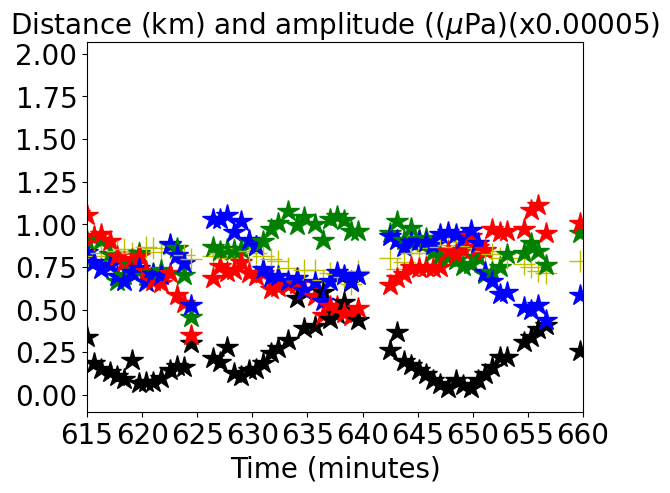

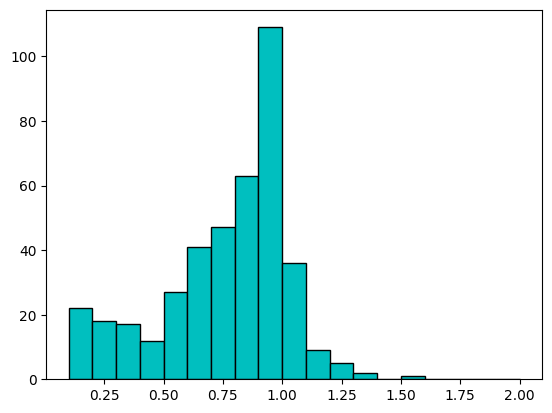

Mean estimated depth S1: 1.2009895384395273
Modifies mean estimated depth S1: 0.6832723934416913


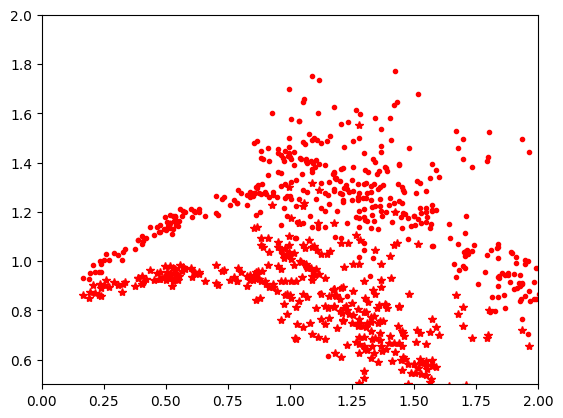

Mean estimated depth S2: 1.2009895384395273
Modified mean estimated depth S2: 0.8122276672491111


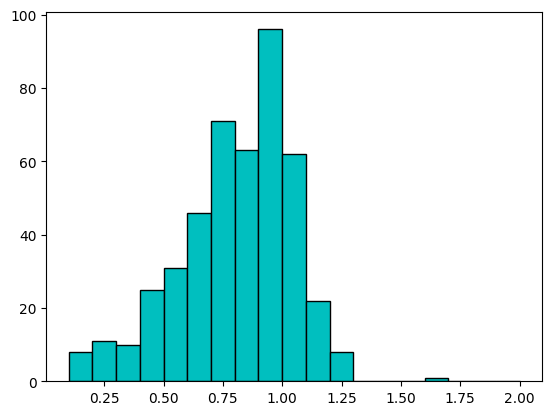

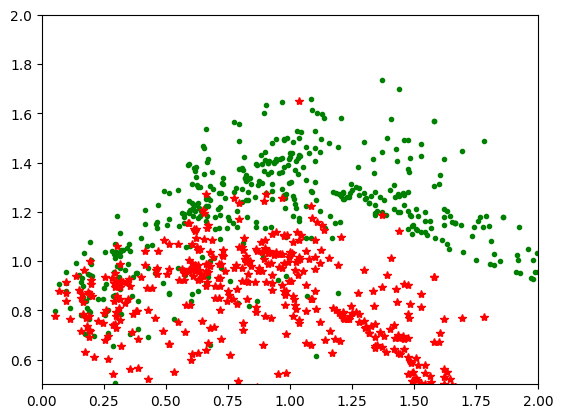

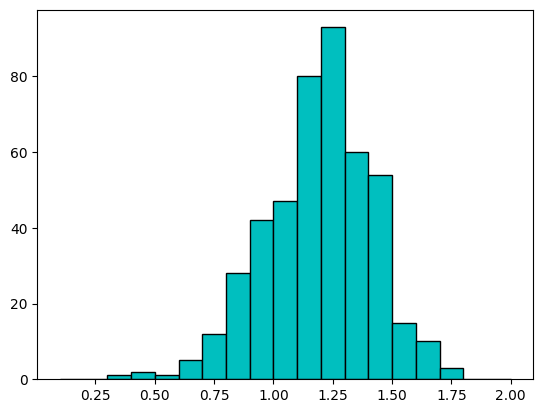

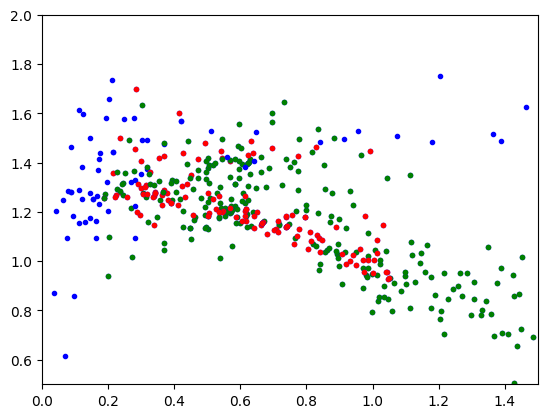

In [ ]:
#
#  Vertical angles
#
path="/content/drive/MyDrive/MSEED/"
timestring="2024-02-19 21:00:00"
Interval = 36000
Ax = np.load(path+"Axp"+"_"+timestring+"_"+str(Interval)+".npy")
Bx = np.load(path+"Bxp"+"_"+timestring+"_"+str(Interval)+".npy")
Bamp1 = np.load(path+"Bamp1"+"_"+timestring+"_"+str(Interval)+".npy")
Aamp1 = np.load(path+"Aamp1"+"_"+timestring+"_"+str(Interval)+".npy")
Bamp2 = np.load(path+"Bamp2"+"_"+timestring+"_"+str(Interval)+".npy")
Aamp2 = np.load(path+"Aamp2"+"_"+timestring+"_"+str(Interval)+".npy")
Bamp3 = np.load(path+"Bamp3"+"_"+timestring+"_"+str(Interval)+".npy")
Aamp3 = np.load(path+"Aamp3"+"_"+timestring+"_"+str(Interval)+".npy")
Ay = np.load(path+"Ayp"+"_"+timestring+"_"+str(Interval)+".npy")
By = np.load(path+"Byp"+"_"+timestring+"_"+str(Interval)+".npy")
Az = np.load(path+"Azp"+"_"+timestring+"_"+str(Interval)+".npy")
Bz = np.load(path+"Bzp"+"_"+timestring+"_"+str(Interval)+".npy")
At = np.load(path+"Atp"+"_"+timestring+"_"+str(Interval)+".npy")
Bt = np.load(path+"Btp"+"_"+timestring+"_"+str(Interval)+".npy")
Avert = np.load(path+"Aapvel"+"_"+timestring+"_"+str(Interval)+".npy")
Bvert = np.load(path+"Bapvel"+"_"+timestring+"_"+str(Interval)+".npy")
S1 = (0., 0., 0.)
S2 = (x2[1], x2[0], -0.008)
S3 = (x3[1], x3[0], -0.024)
S0 = ((S1[0]+S2[0]+S3[0])/3., (S1[1]+S2[1]+S3[1])/3., 0.)
rmax = 2
nkA=len(Ax)
nkB=len(Bx)
hS0=np.empty(0)
ht0=np.empty(0)
hS1=np.empty(0)
ht1=np.empty(0)
hS2=np.empty(0)
ht2=np.empty(0)
print("S0:", S0)
print("Number of A calls:", nkA, "Number of B calls:", nkB)
print("S1:", S1)
print("S2:", S2)
print("S3:", S3)

'''
  fig, ax = plt.subplots(figsize=(24, 6), )

  for j in range (0,nkA):
  #    if(At[j]<374 or At[j] > 396):
  #      continue
      hd0 = math.sqrt((Ax[j]-S0[0])*(Ax[j]-S0[0])+(Ay[j]-S0[1])*(Ay[j]-S0[1]))
      hd1 = math.sqrt((Ax[j]-S1[0])*(Ax[j]-S1[0])+(Ay[j]-S1[1])*(Ay[j]-S1[1]))
      hd2 = math.sqrt((Ax[j]-S2[0])*(Ax[j]-S2[0])+(Ay[j]-S2[1])*(Ay[j]-S2[1]))
      if (hd0 < rmax):
  #      print("Horizontal distance S1:",hd1,"Vertical estimate:",hd0*math.tan(np.pi*Avert[j]/180))
        hS1 = np.append(  hS1, hd0*math.tan(np.pi*Avert[j]/180))
        hS0 = np.append(  hS0, hd0*math.tan(np.pi*Avert[j]/180))
        ht1 = np.append(ht1, hd1)
        ht0 = np.append(ht0, hd0)
        plt.plot(At[j], Avert[j]/100,'y+',  markersize=16)
        plt.plot(At[j], hd0,'ko', markersize=16)
        plt.plot(At[j], Aamp2[j]/20000,'go', markersize=16)
        plt.plot(At[j], Aamp1[j]/20000,'ro', markersize=16)
        plt.plot(At[j], Aamp3[j]/20000,'bo', markersize=16)
      if (hd0 < rmax):
  #     print("Horizontal distance S2:",hd2,"Vertical estimate:",hd0*math.tan(np.pi*Avert[j]/180))
        hS2 = np.append(  hS2, hd0*math.tan(np.pi*Avert[j]/180))
  #      hS0 = np.append(  hS0, hd0*math.tan(np.pi*Avert[j]/180))
        ht2 = np.append(ht2, hd2)
  #      plt.plot(At[j], Aamp1[j]/Aamp2[j],'g*')

'''
for j in range (0,nkB):
#  if(Bt[j]<374 or Bt[j] >396):
#    continue
  hd0 = math.sqrt((Bx[j]-S0[0])*(Bx[j]-S0[0])+(By[j]-S0[1])*(By[j]-S0[1]))
  hd1 = math.sqrt((Bx[j]-S1[0])*(Bx[j]-S1[0])+(By[j]-S1[1])*(By[j]-S1[1]))
  hd2 = math.sqrt((Bx[j]-S2[0])*(Bx[j]-S2[0])+(By[j]-S2[1])*(By[j]-S2[1]))
  if (hd0 < rmax):
#    print("Horizontal distance S1:",hd1,"Vertical estimate:",hd0*math.tan(np.pi*Bvert[j]/180))
    hS1 = np.append(  hS1, hd0*math.tan(np.pi*Bvert[j]/180))
    hS0 = np.append(  hS0, hd0*math.tan(np.pi*Bvert[j]/180))
    ht0 = np.append(ht0, hd0)
    ht1 = np.append(ht1, hd1)
    plt.plot(Bt[j], Bvert[j]/100,'y+', markersize=16)
    plt.plot(Bt[j], hd0,'k*', markersize=16)
    plt.plot(Bt[j], Bamp2[j]/20000,'g*', markersize=16)
    plt.plot(Bt[j], Bamp1[j]/20000,'r*', markersize=16)
    plt.plot(Bt[j], Bamp3[j]/20000,'b*', markersize=16)
  if (hd0 < rmax):
#   print("Horizontal distance S2:",hd2,"Vertical estimate:",hd0*math.tan(np.pi*Bvert[j]/180))
    hS2 = np.append(  hS2, hd0*math.tan(np.pi*Bvert[j]/180))
#    hS0 = np.append(  hS0, hd0*math.tan(np.pi*Avert[j]/180))
    ht2 = np.append(ht2, hd2)
#    plt.plot(Bt[j], Bamp1[j]/Bamp2[j],'g*')
plt.xlabel('Time (minutes)', fontsize=20)
plt.title('Distance (km) and amplitude (($\u03BC$Pa)(x0.00005)', fontsize=20)
plt.xticks(fontsize=20)
plt.yticks(fontsize=20)
plt.xlim([615,660])
#plt.ylim([70,90])
plt.show()
hbin=np.linspace( 0.1,2.,20)
plt.hist(hS1-0.4*ht1, bins=hbin, color='c', edgecolor= 'black')
plt.show()
plt.plot(ht1,hS1,'r.')
plt.plot(ht1,hS1-0.4*ht1,'r*')
print("Mean estimated depth S1:", hS1.mean())
print("Modifies mean estimated depth S1:", hS1.mean()-0.4*ht1.mean())
plt.ylim([0.5,2])
plt.xlim([0.,2.])
#plt.xlim([588,600])
plt.show()
plt.hist(hS2-0.4*ht2, bins=hbin, color='c', edgecolor= 'black')
print("Mean estimated depth S2:", hS2.mean())
print("Modified mean estimated depth S2:", hS2.mean()-0.4*ht2.mean())
plt.show()
plt.plot(ht2,hS2,'g.')
plt.plot(ht2,hS2-0.4*ht2,'r*')
plt.ylim([0.5,2])
plt.xlim([0.,2.])
#plt.xlim([440,490])
plt.show()
plt.hist(hS0, bins=hbin, color='c', edgecolor= 'black')
plt.show()
n0 = len(ht0)
for k in range(n0):
  plt.plot(ht0[k],hS0[k],'b.')
  if(ht2[k] < 1.):
    plt.plot(ht0[k],hS0[k],'g.')
  if(ht1[k] < 1.):
    plt.plot(ht0[k],hS0[k],'r.')
plt.ylim([0.5,2])
#plt.xlim([440,490])
plt.xlim([0.,1.5])
plt.show()



Optimal hd1: 250 Optimal hd2: 250


[]

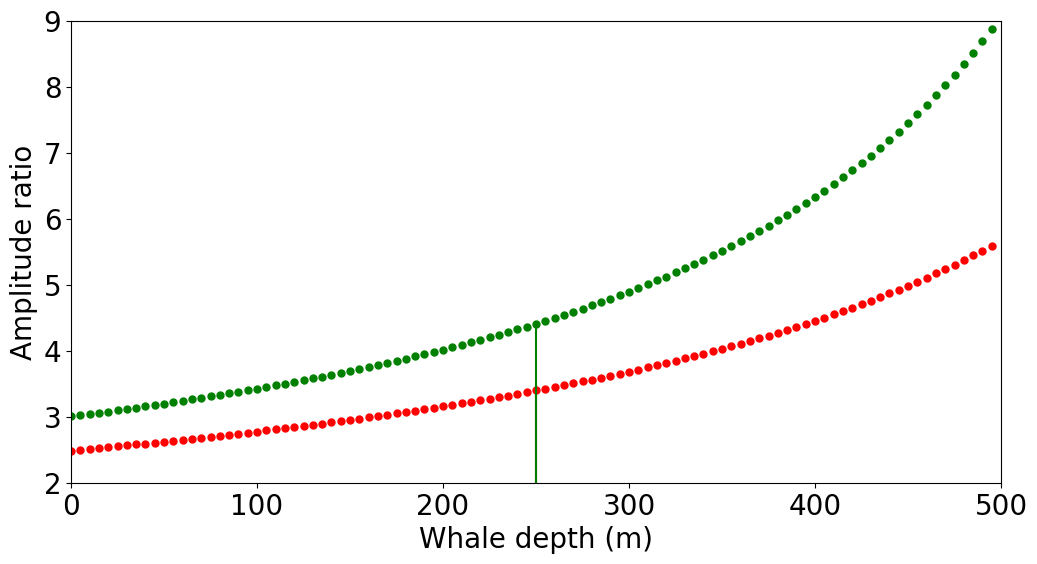

In [ ]:
fig, ax = plt.subplots(figsize=(12, 6), )
minres1 = 999999.
minres2 = 999999.
for w in range (0,500,5):
  wd = w*0.001
  hd1 = math.sqrt((0.724-wd)**2+4.)/(0.855-wd)
  hd2 = math.sqrt((0.855-wd)**2+4.)/(0.724-wd)
  res1 = abs(hd1-3.39)
  res2 = abs(hd2-4.4)
  if(res1 < minres1):
    minres1 = res1
    minw1 = w
  if(res2 < minres2):
    minres2 = res2
    minw2 = w
  plt.plot(w,hd1,'r.', w, hd2,'g.', markersize=10)
print("Optimal hd1:", minw1, "Optimal hd2:", minw2)
linx=(0.,400)
liny=(2.5,2.5)
#plt.plot(linx,liny,'r--')
linx=(0.,400)
liny=(3.1,3.1)
#plt.plot(linx,liny,'r--')
linx=(0.,400)
liny=(2.8,2.8)
#plt.plot(linx,liny,'r-')
linx=(0.,400)
liny=(2.9,2.9)
#plt.plot(linx,liny,'g--')
linx=(0.,400)
liny=(3.8,3.8)
#plt.plot(linx,liny,'g-')
linx=(0.,400)
liny=(4.7,4.7)
#plt.plot(linx,liny,'g--')
linx=(0.,400)
liny=(4.7,4.7)
#plt.plot(linx,liny,'g--')
linx=(250,250)
liny=(2.,3.39)
plt.plot(linx,liny,'r-')
linx=(250,250)
liny=(2.,4.4)
plt.plot(linx,liny,'g-')
plt.xlim(0,500)
plt.ylim(2,9)
plt.xlabel('Whale depth (m)', fontsize=20)
plt.ylabel('Amplitude ratio', fontsize=20)
#plt.title("Amplitude ratios a1/a2 (red) a2/a1 (green)", fontsize=20)
plt.xticks(fontsize=20)
plt.yticks(fontsize=20)
plt.plot()

0
20
40
60


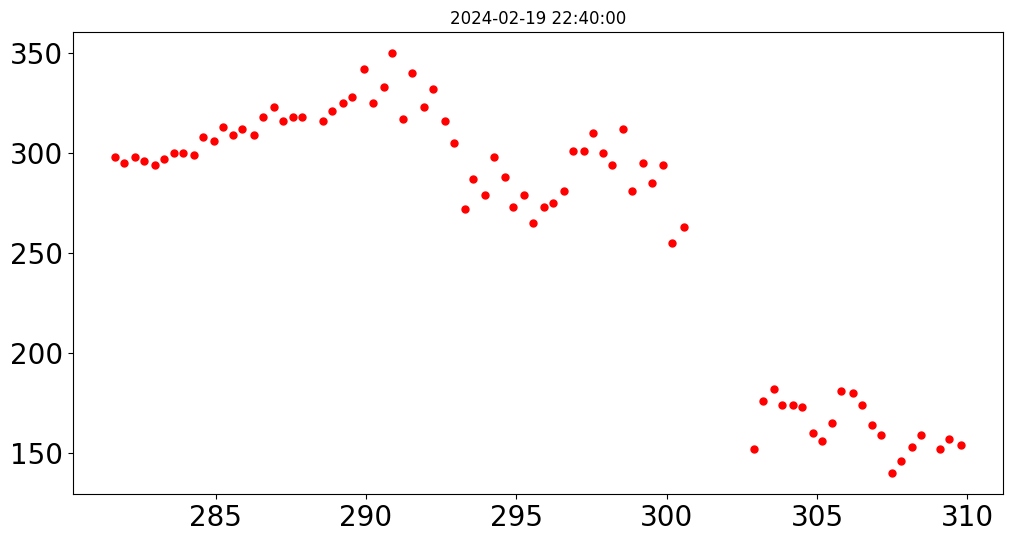

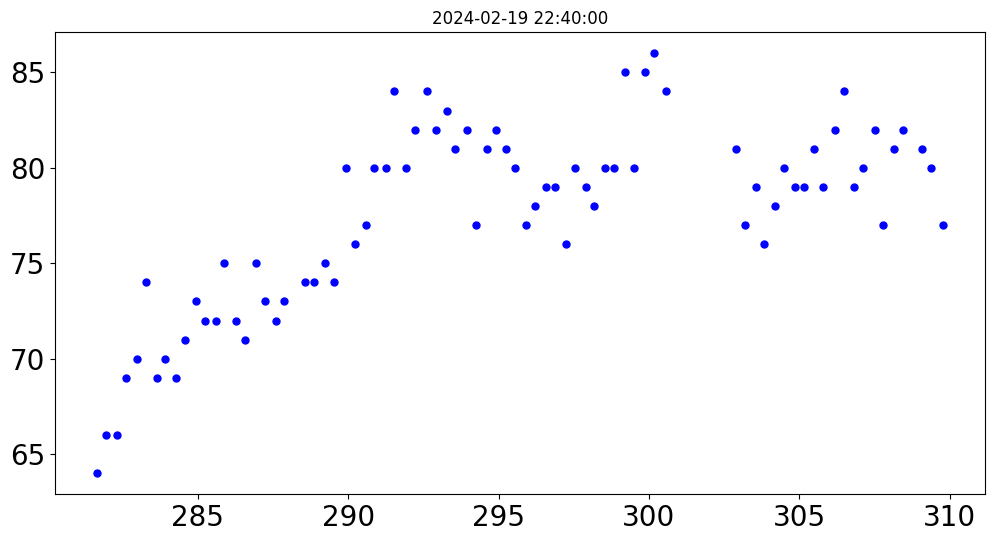

In [ ]:
#
# Compute optimal velocity and direction assuming far-field
# If velocity is very high, this assumption is not correct.
#
#
#
#
delay12 = np.load(path+"delay12"+"_"+timestring+"_"+str(Interval)+".npy")
delay31 = np.load(path+"delay31"+"_"+timestring+"_"+str(Interval)+".npy")
delay23 = np.load(path+"delay23"+"_"+timestring+"_"+str(Interval)+".npy")
UpdatedHydro = False
if(UpdatedHydro):
  Delta_S = np.load(path+"Delta_S"+"_"+timestring+"_"+str(Interval)+".npy")
  S1	= (Delta_S[0], Delta_S[1], Delta_S[2])
  S2	= (x2[1]+Delta_S[3], x2[0]+Delta_S[4], Delta_S[5])
  S3	= (x3[1]+Delta_S[6], x3[0]+Delta_S[7], Delta_S[8])
else:
  S1 = (0., 0., 0.)
  S2 = (x2[1], x2[0], 0.)
  S3 = (x3[1], x3[0], 0.)
az, vel = CompVelAz(delay12, delay31, delay23, S1, S2, S3, 1.)
times = np.load(path+"times"+"_"+timestring+"_"+str(Interval)+".npy")
fig, ax = plt.subplots(1, 1, figsize=(12, 6),  )
plt.plot(times, 180.*az/np.pi,'r.', markersize=10)
plt.xticks(fontsize=20)
plt.yticks(fontsize=20)
plt.title(timestring)
#plt.xlim([0, 7200])
plt.show()
fig, ax = plt.subplots(1, 1, figsize=(12, 6),  )
plt.plot(times, vel,'b.', markersize=10)
plt.xticks(fontsize=20)
plt.yticks(fontsize=20)
plt.title(timestring)
#plt.xlim([0, 7200])
plt.show()
np.save(path+"apvel"+"_"+timestring+"_"+str(Interval),vel)
np.save(path+"azim"+"_"+timestring+"_"+str(Interval),az)
#

0
331.0 1.69 0.0
1
335.0 1.84 18.5
2
333.0 1.83 9.0
3
4
5
6
7
8
329.99999999999994 1.85 18.5
9
10
11
12
332.00000000000006 1.84 16.5
13
333.0 1.83 13.5
14
15
331.5 1.83 9.5
16
17
329.99999999999994 1.8 0.5
18
333.0 1.85 18.5
19
20
21
335.49999999999994 1.84 15.5
22
23
24
25
26
27
28
29
30
31
32
33
34
35
36
37
38
39
40
41
42
43
44
45
46
47
48
49
50
51
52
53
54
55
56
57
58
59
60
61
62
63
64
65
66
67
68
69
70
71
72
73
74
75
76
77
78
79
80
81
82
83
84
85
86
87
88
89
90
91
92
93
94
95
96
97
98
99
100
101
102
103
104
105
106
107
108
109
110
111
112
113
114
115
116
117
118
119
120
121
122
123
124
125
126
127
128
129
130
131
132
133
134
135
136
137
138
139
140
141
142
143
144
145
146
147
148
149
150
151
152
153
154
155
156
157
158
159
160
161
162
163
164
165
166
167
168
169
170
171
172
173
174
175
176
177
178
179
180
181
182
183
184
185
186
187
188
189
190
191
192
193
194
195
196
197
198
199
200
201
202
203
204
205
206
207
208
209
210
211
212
213
214
215
216
217
218
219
220
221
222
223
224
225

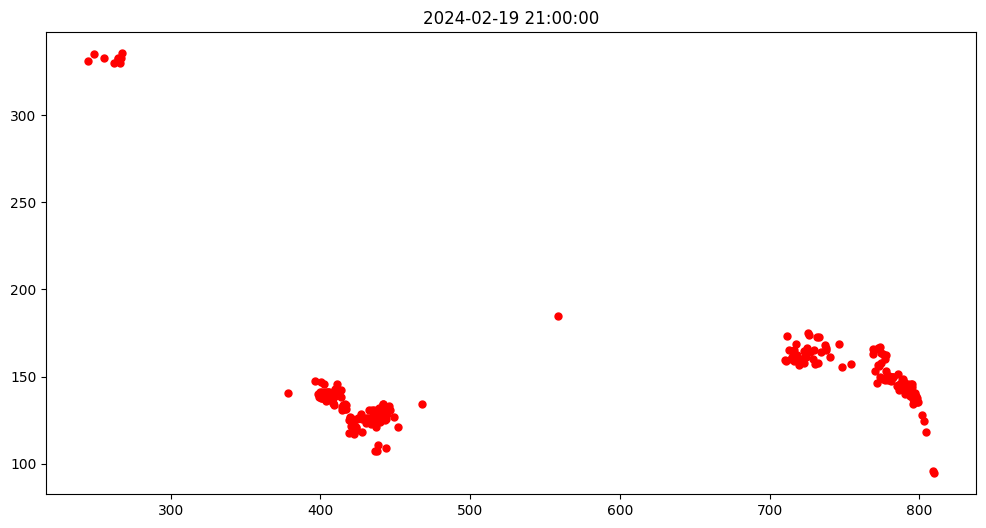

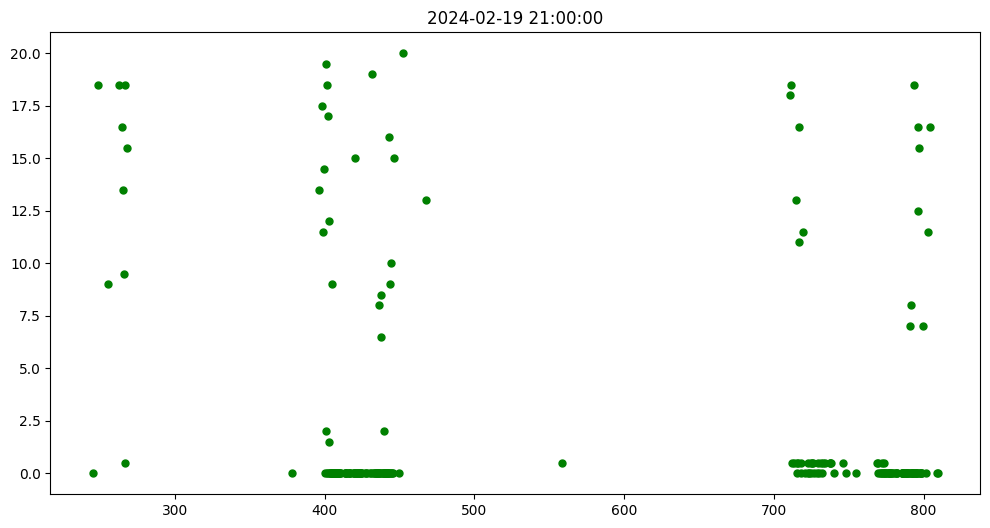

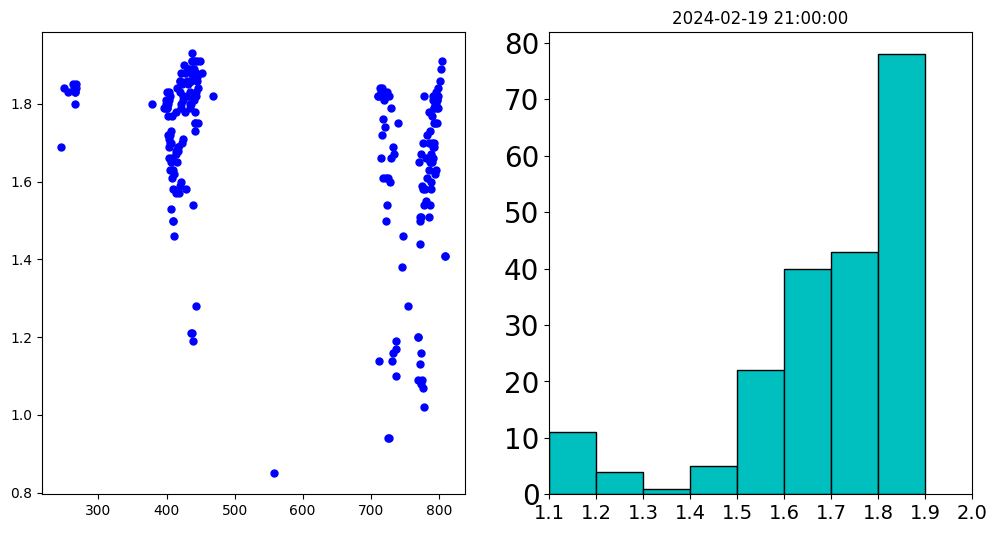

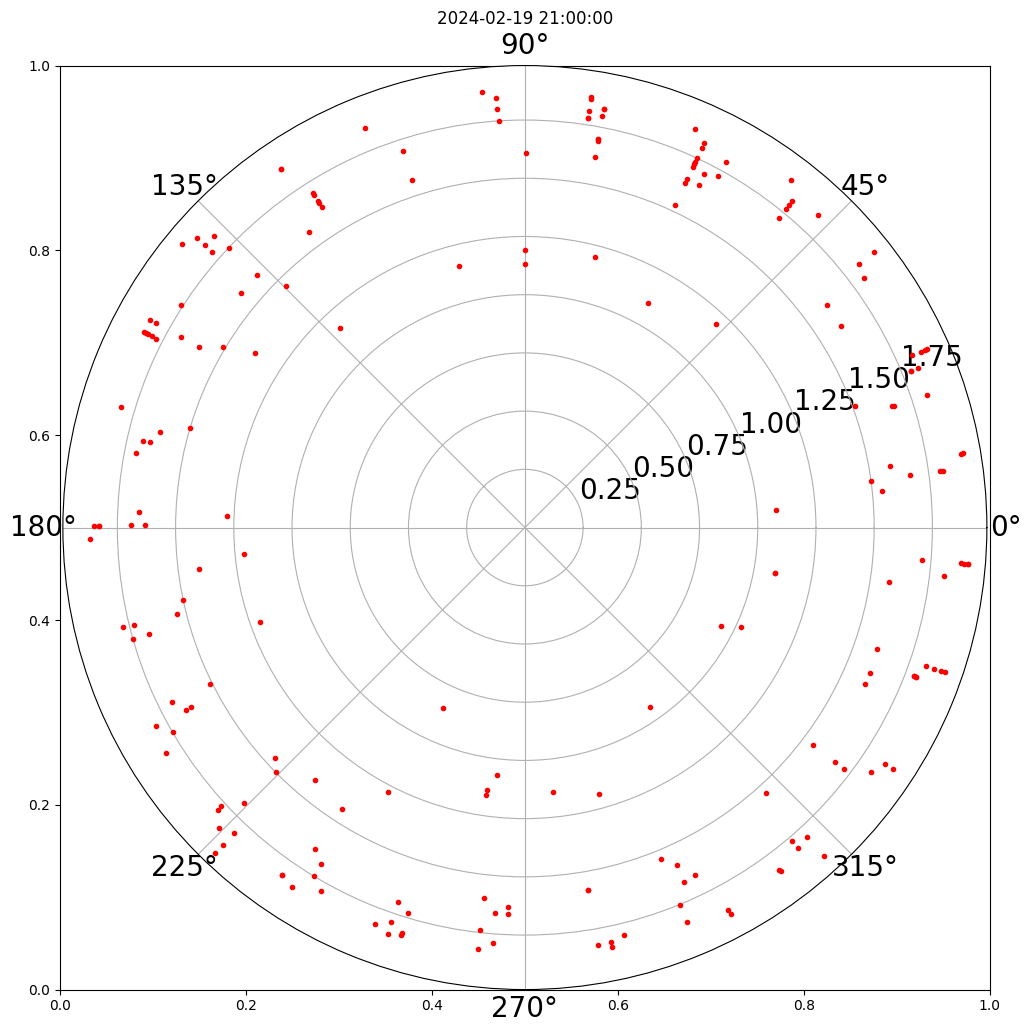

In [ ]:
#
# Estimate optimal velocity given delay measurements
# and assuming horizontal propagation
#
#
def CompOptVel(x2, x3, vertang, dt):
#
# Loop over values of velocity and vertical angle to get optimal direction
# velocity and vertical angle for two delay values
#
  mindiff = 9999999999999999999999.
  OptDirection = 0.
  OptVelocity= 99999.
#
#
  UpdatedHydro = True
  if(UpdatedHydro):
    Delta_S = np.load(path+"Delta_S"+"_"+timestring+"_"+str(Interval)+".npy")
    S1	= (Delta_S[0], Delta_S[1], Delta_S[2])
    S2	= (x2[1]+Delta_S[3], x2[0]+Delta_S[4], Delta_S[5])
    S3	= (x3[1]+Delta_S[6], x3[0]+Delta_S[7], Delta_S[8])
  else:
    S1 = (0., 0., 0.)
    S2 = (x2[1], x2[0], 0.)
    S3 = (x3[1], x3[0], 0.)
  for devl in range (-100,51,1):
      svel = 1.5+devl*0.01
      for i in range (720):
        theta = 2.*np.pi*float(i)/720.
        dt1,dt2 = CompDt(theta,vertang, svel, S1, S2, S3)
        dt3 = dt2-dt1
        diff = math.sqrt((dt1-dt[0])*(dt1-dt[0])+(dt2-dt[1])*(dt2-dt[1])+(dt3-dt[2])*(dt3-dt[2]))
        if (diff < mindiff):
          mindiff = diff
          OptDirection = theta
          OptVelocity = svel
          Optang = vertang
  #
  return OptDirection, OptVelocity, Optang
#
#
#
k = 0
az = np.empty(0)
ang = np.empty(0)
vel = np.empty(0)
tim = np.empty(0)
#
#
delay12 = np.load(path+"delay12"+"_"+timestring+"_"+str(Interval)+".npy")
delay31 = np.load(path+"delay31"+"_"+timestring+"_"+str(Interval)+".npy")
delay23 = np.load(path+"delay23"+"_"+timestring+"_"+str(Interval)+".npy")
apvel = np.load(path+"apvel"+"_"+timestring+"_"+str(Interval)+".npy")
times = np.load(path+"times"+"_"+timestring+"_"+str(Interval)+".npy")
nk = len(delay12)
#
k = 0
while k < nk :
  print(k)
  if(apvel[k] > 20.):
    k += 1
    continue
  std = (delay12[k] + delay13[k] + delay23[k])/3.
  dt =  (delay12[k], delay13[k], delay23[k], std, std, std)
  OptDirection, OptVelocity, Optang = CompOptVel(x2,x3, apvel[k], dt)
#
# Direction computed is the azimuth of the propagating plane wave
# change to backazimuth within [0-2*pi]
#
  if (Optang < 90):
    if (OptDirection < 0) :
      OptDirection += 2*np.pi
    elif (OptDirection >= 2.*np.pi ):
      OptDirection -= 2*np.pi
    az=np.append(az,OptDirection)
    ang=np.append(ang,Optang)
    vel=np.append(vel,OptVelocity)
    tim = np.append(tim, times[k])
#
#
#
  print(180*OptDirection/np.pi, OptVelocity, Optang)
  k += 1
fig, ax = plt.subplots(1, 1, figsize=(12, 6),  )
plt.plot(tim, 180.*az/np.pi,'r.', markersize=10)
#plt.xlim([0, 7200])
plt.title(timestring)
plt.show()
fig, ax = plt.subplots(1, 1, figsize=(12, 6),  )
plt.plot(tim, ang,'g.', markersize=10)
plt.title(timestring)
plt.show()
#
fig, ax = plt.subplots(1, 2, figsize=(12, 6),  )
ax[0].plot(tim, vel,'b.', markersize=10)
defbin = np.linspace(1.1, 1.9, 9)
ax[1].hist(vel, color='c', bins=defbin, edgecolor='black')
plt.xticks(fontsize=14)
plt.yticks(fontsize=20)
plt.xlim([1.1, 2.])
plt.title(timestring)
plt.show()
fig, ax = plt.subplots(1, 1, figsize=(12, 12))
ax = plt.subplot(projection='polar' )
plt.polar(az*180./2./np.pi,vel, 'r.')
plt.xticks(fontsize=20)
plt.yticks(fontsize=20)
plt.title(timestring)
plt.show()

600 600 600 600 600 600 600
-0.75 -0.0 -0.0
first and large angle: k, vertang, S2, S2 , S3 19 1.36585958461159 (0.0, 0.0, 0.0) (0.49834692578129824, -1.9386950000000207, -0.008) (-1.4550044492706635, -1.3987489999999372, -0.024)
not first and near centre 20 1.9289290182213354
first and large angle: k, vertang, S2, S2 , S3 21 1.4639137167114913 (0.0, 0.0, 0.0) (0.49834692578129824, -1.9386950000000207, -0.008) (-1.4550044492706635, -1.3987489999999372, -0.024)
not first and near centre 22 1.8929588987179875
first and large angle: k, vertang, S2, S2 , S3 23 1.3886559912498888 (0.0, 0.0, 0.0) (0.49834692578129824, -1.9386950000000207, -0.008) (-1.4550044492706635, -1.3987489999999372, -0.024)
not first and large angle, k, vertang, S1, S2 , S3 24 55.5 (0.0, 0.0, 0.0) (0.49834692578129824, -1.9386950000000207, -0.008) (-1.4550044492706635, -1.3987489999999372, -0.024)
not first and large angle, k, vertang, S1, S2 , S3 25 54.5 (0.0, 0.0, 0.0) (0.49834692578129824, -1.9386950000000207, -0.008

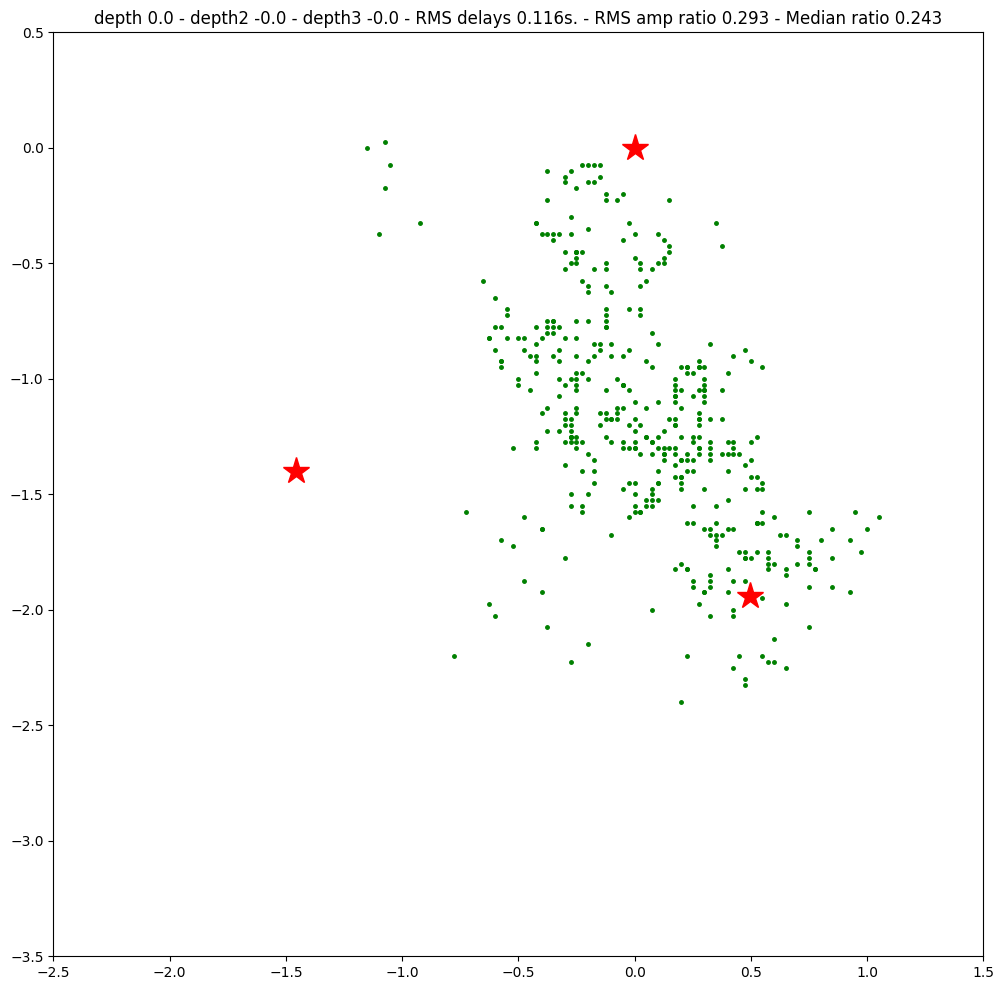

Whale depth: -0.75 0.0 -0.0 -0.0 37.29131400088692
-0.7 -0.0 -0.0
first and large angle: k, vertang, S2, S2 , S3 19 1.36585958461159 (0.0, 0.0, 0.0) (0.49834692578129824, -1.9386950000000207, -0.008) (-1.4550044492706635, -1.3987489999999372, -0.024)
not first and near centre 20 1.9289290182213354
first and large angle: k, vertang, S2, S2 , S3 21 1.4639137167114913 (0.0, 0.0, 0.0) (0.49834692578129824, -1.9386950000000207, -0.008) (-1.4550044492706635, -1.3987489999999372, -0.024)
not first and near centre 22 1.8929588987179875
first and large angle: k, vertang, S2, S2 , S3 23 1.3886559912498888 (0.0, 0.0, 0.0) (0.49834692578129824, -1.9386950000000207, -0.008) (-1.4550044492706635, -1.3987489999999372, -0.024)
not first and large angle, k, vertang, S1, S2 , S3 24 55.5 (0.0, 0.0, 0.0) (0.49834692578129824, -1.9386950000000207, -0.008) (-1.4550044492706635, -1.3987489999999372, -0.024)
not first and large angle, k, vertang, S1, S2 , S3 25 54.5 (0.0, 0.0, 0.0) (0.49834692578129824, -1.93

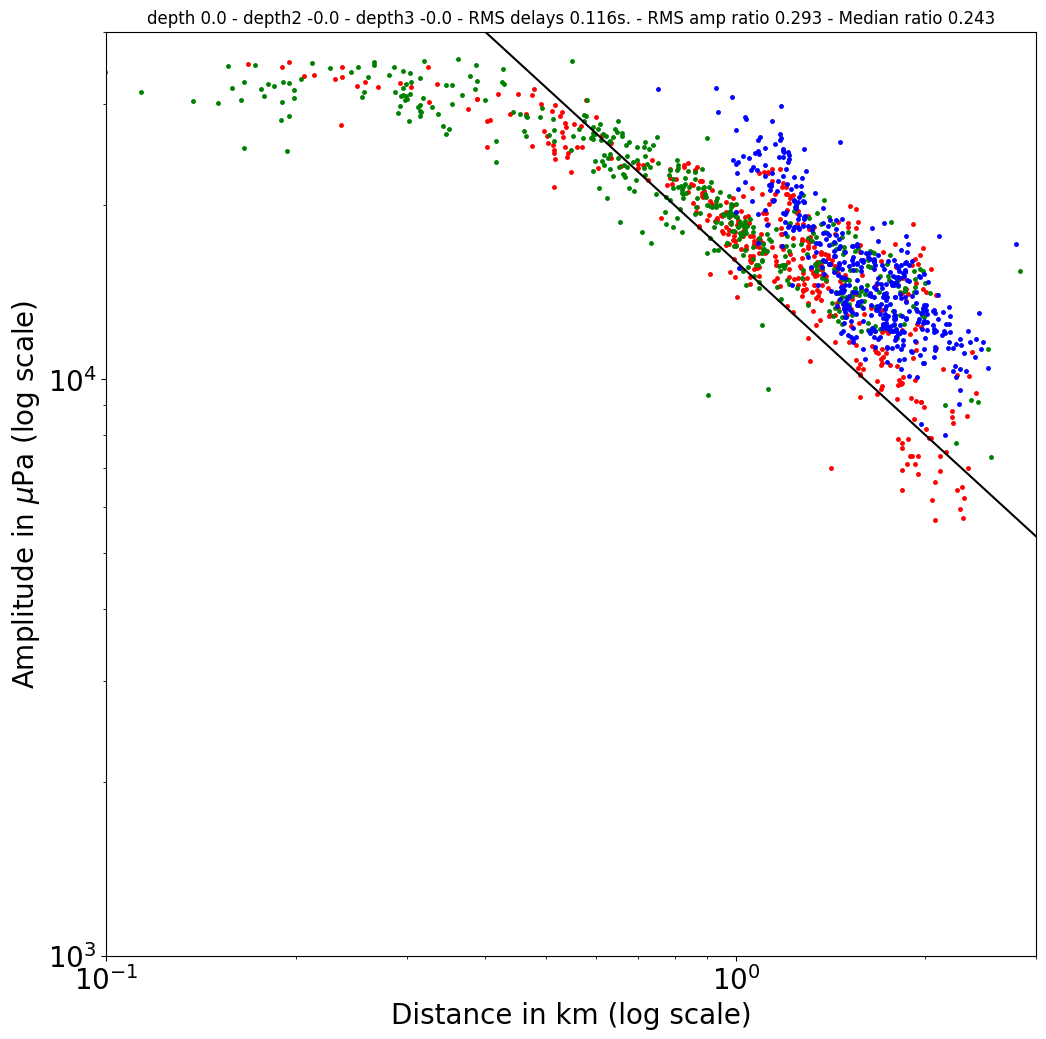

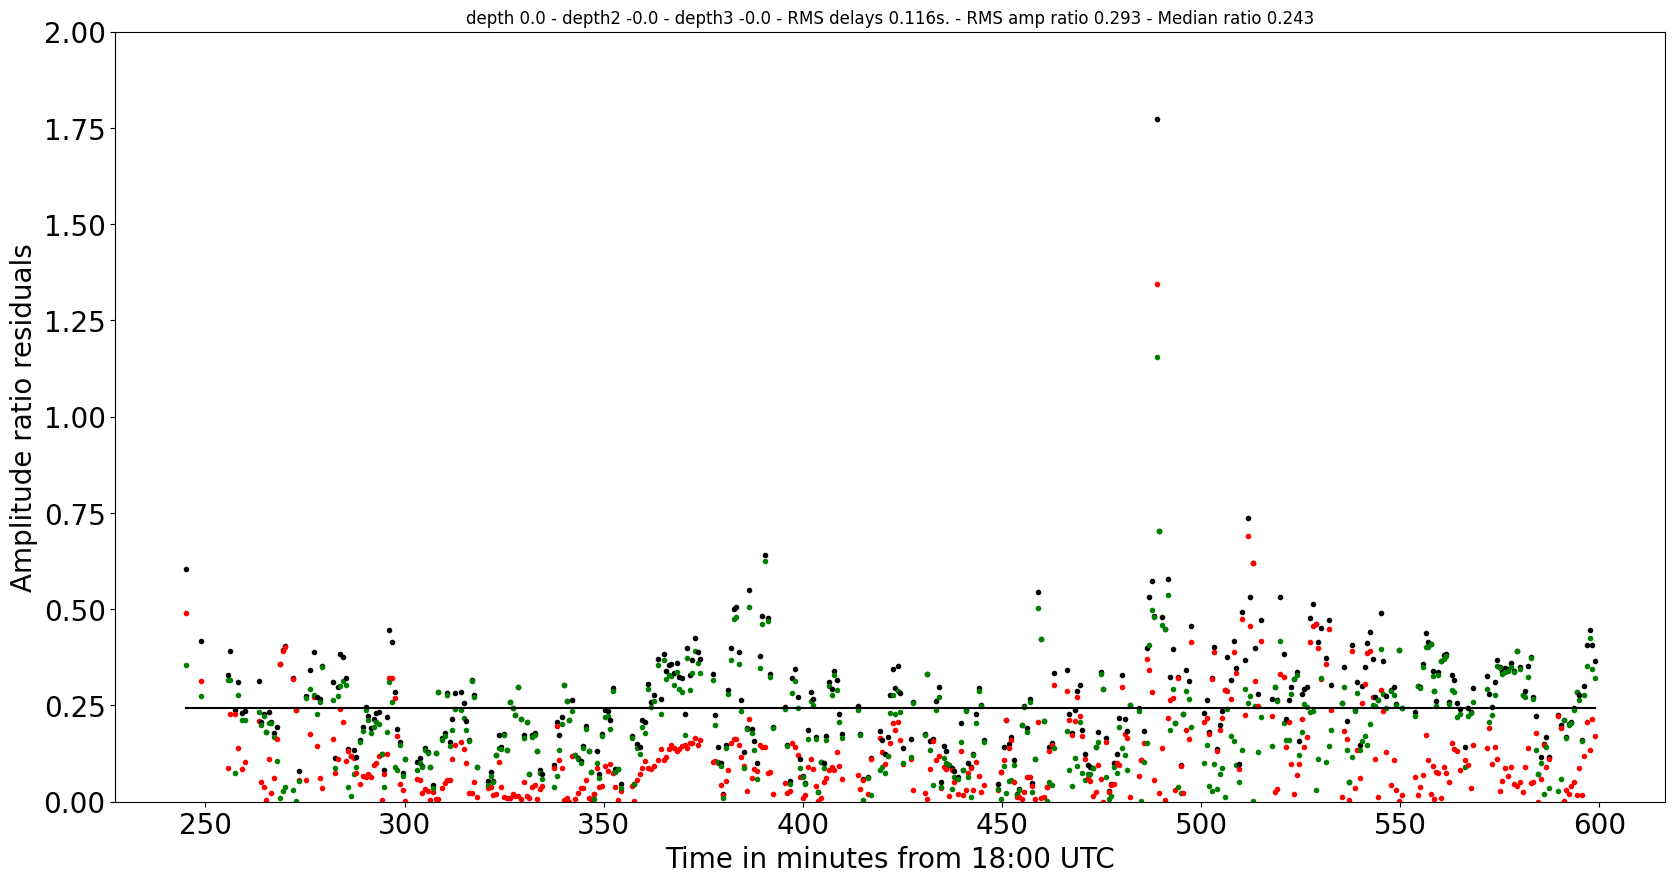

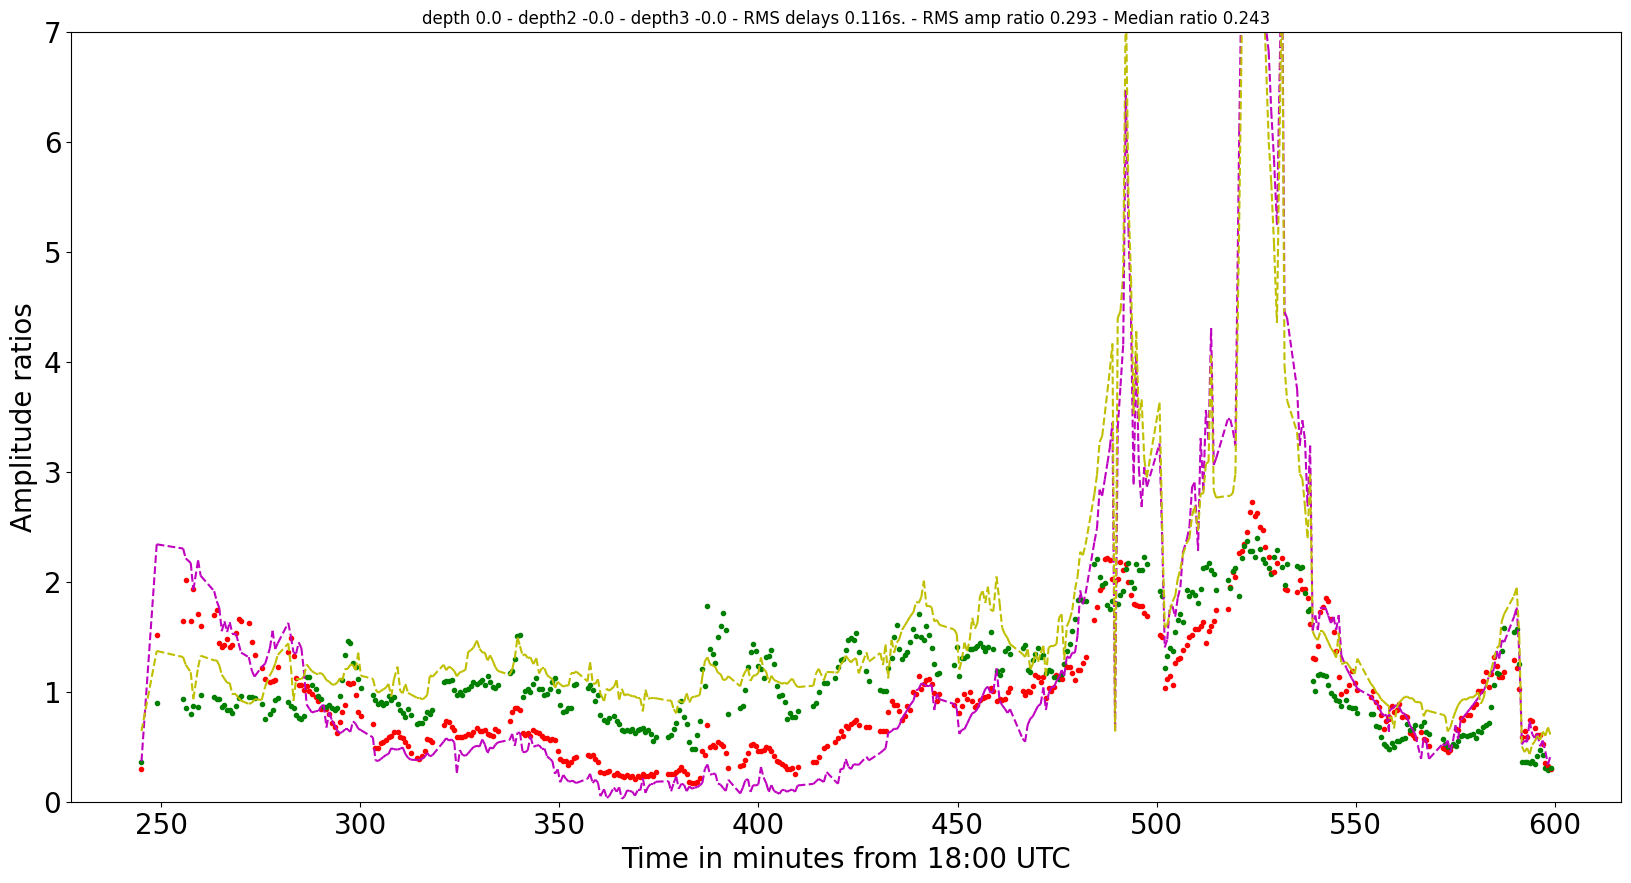

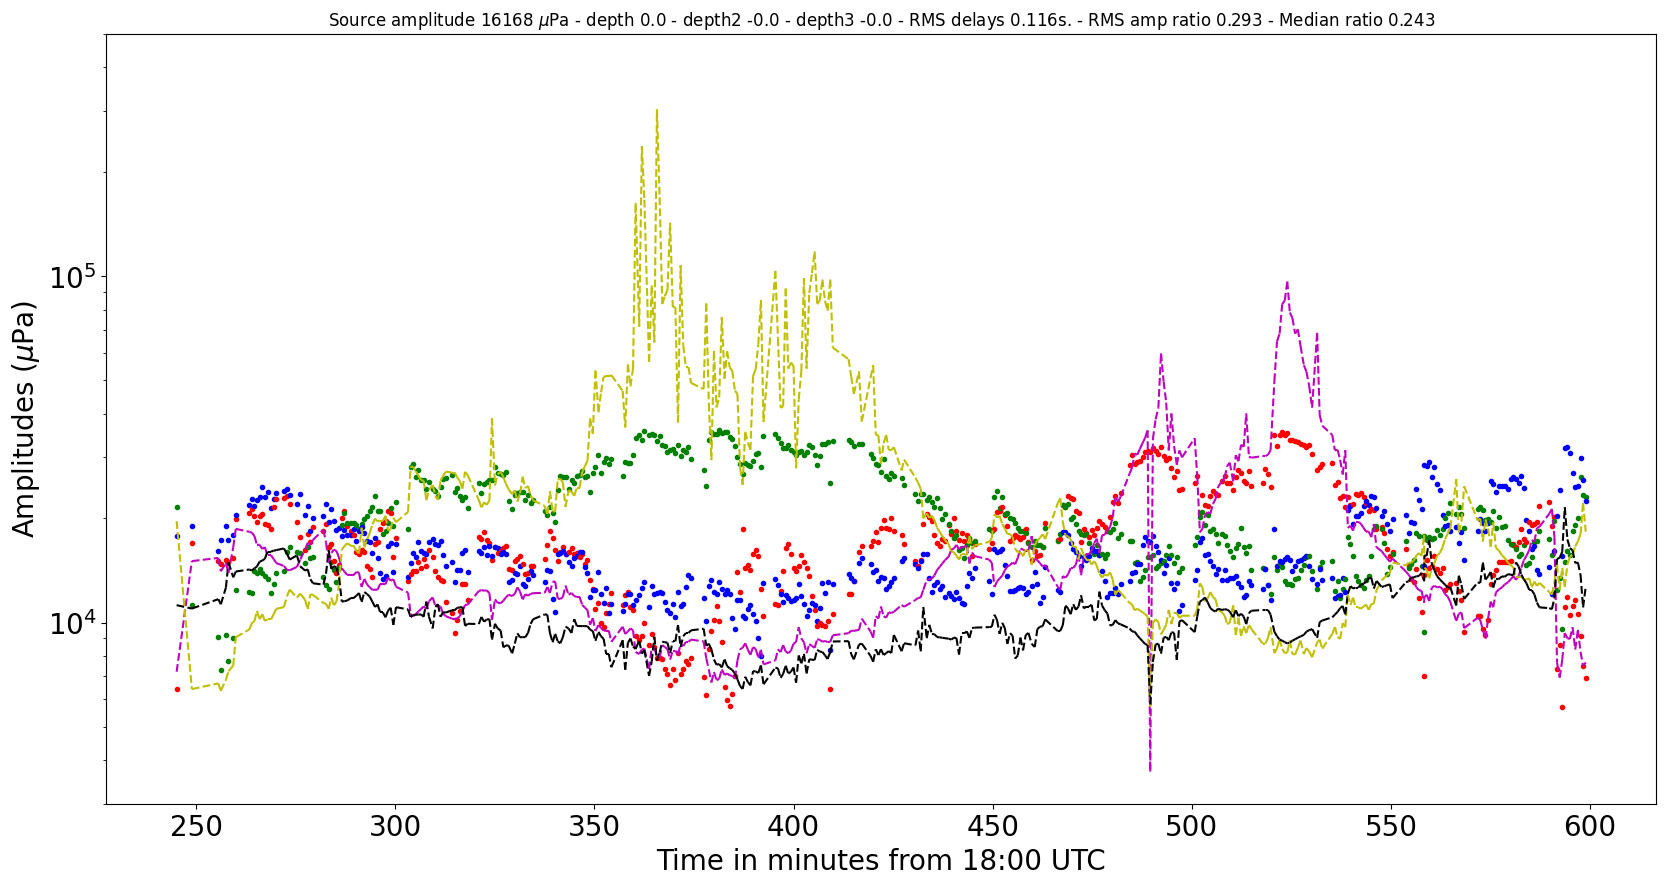

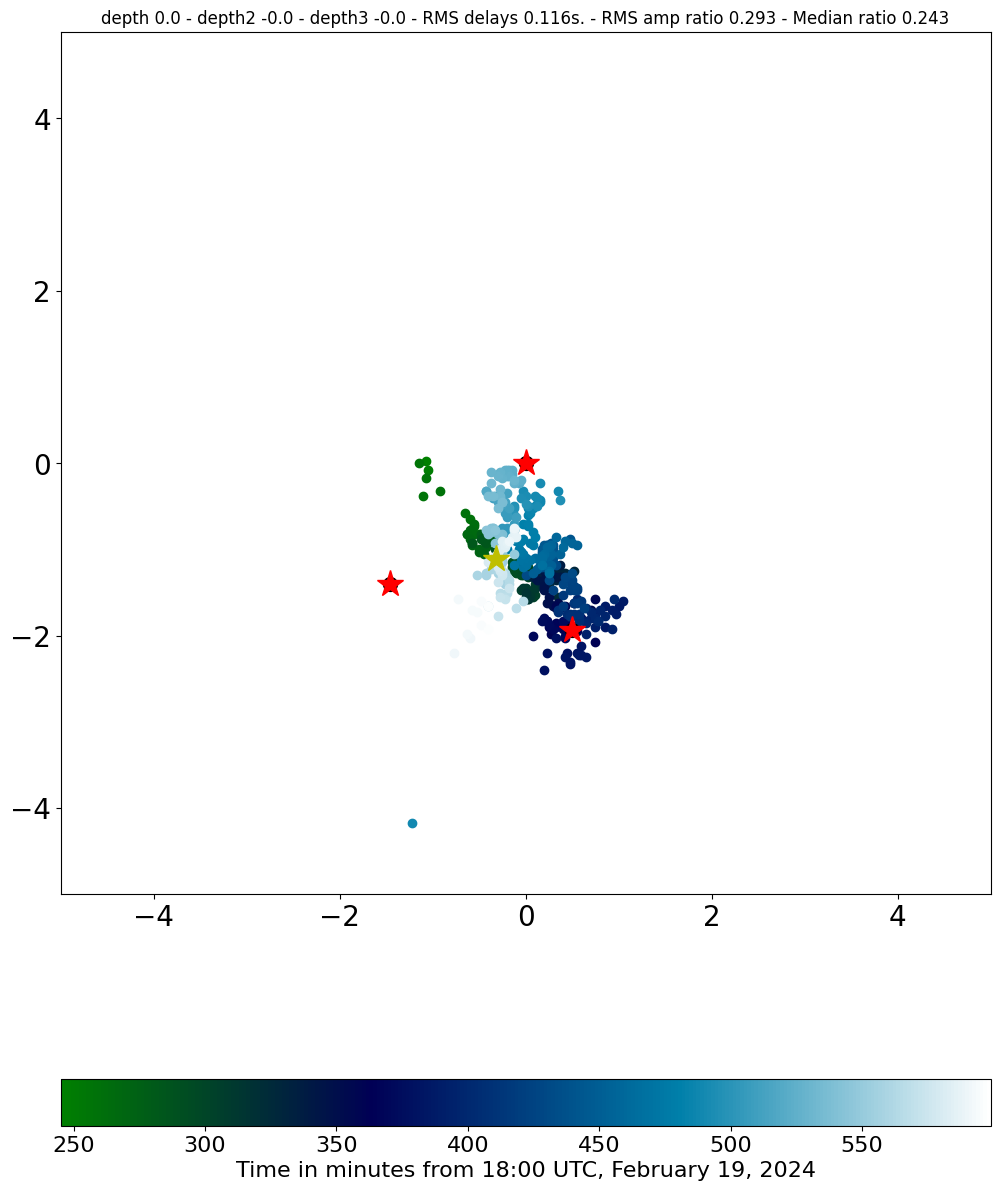

0
20
40
60
80
100
120
140
160
180
200
220
240
260
280
300
320
340
360
380
400
420


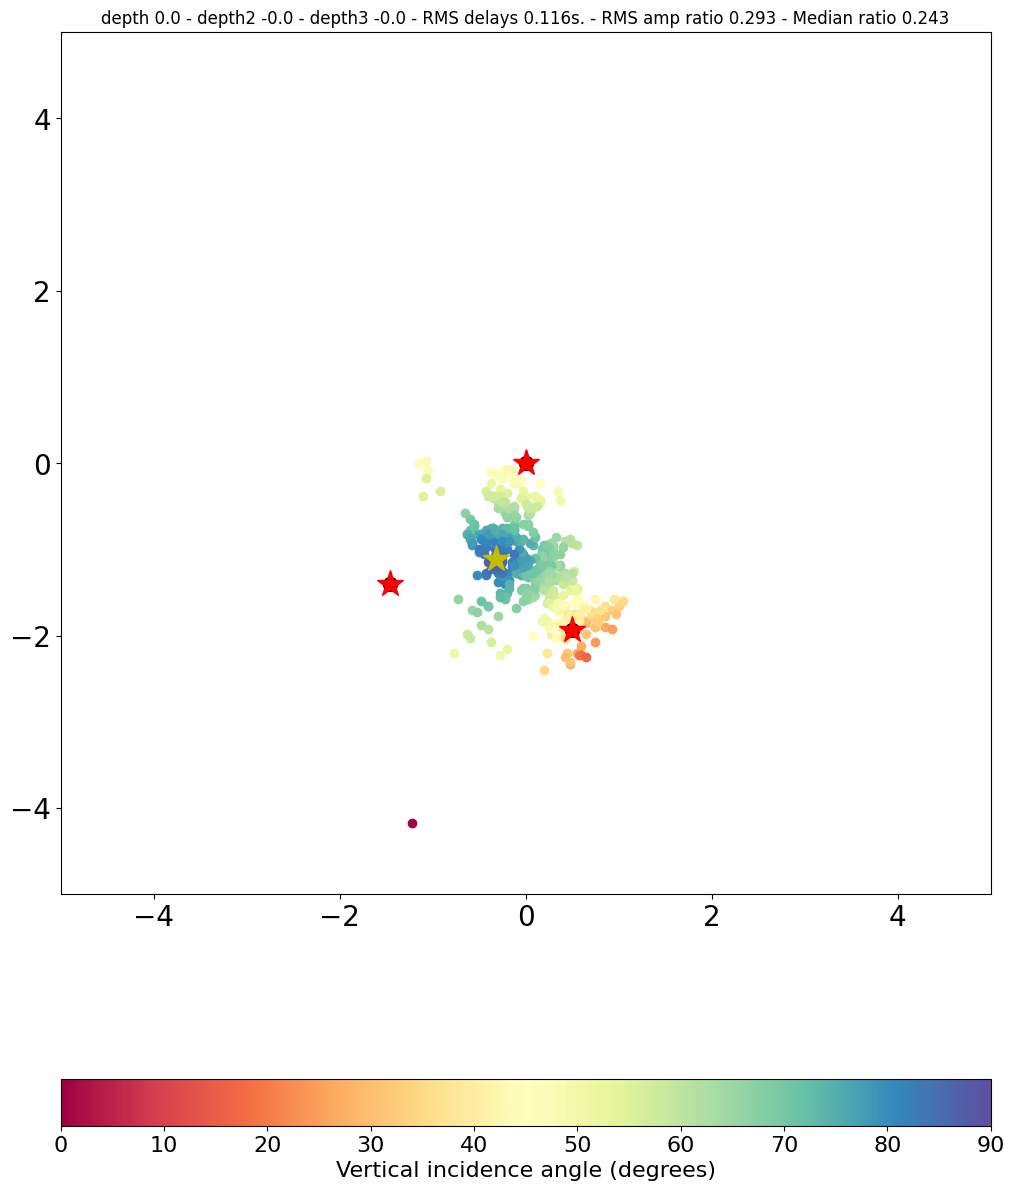

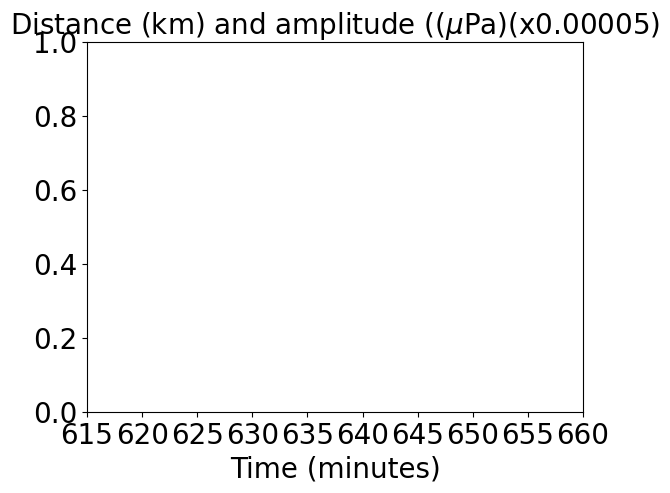

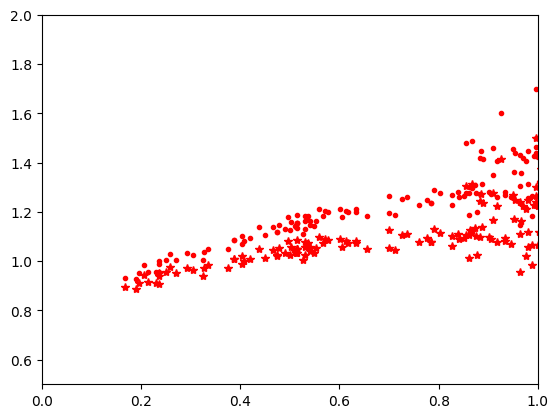

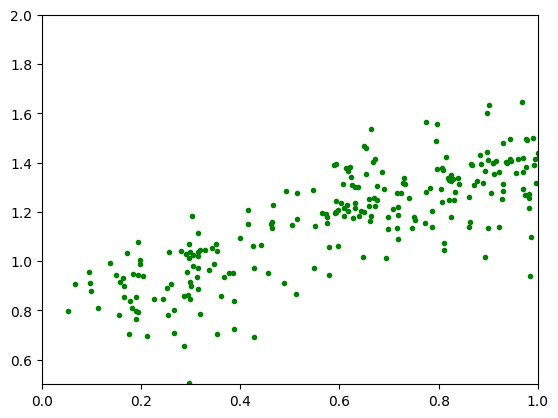

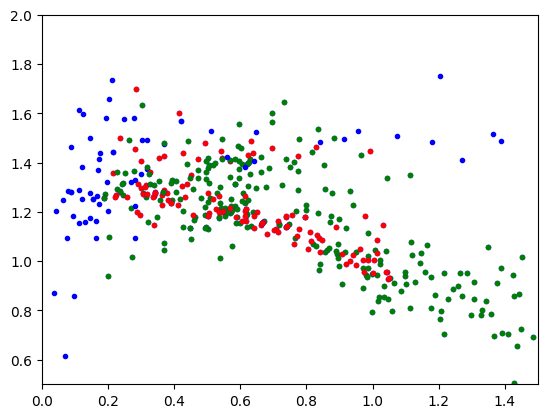

In [ ]:
#MINANG ONLY
# Minimize residual of amplitude ratios for given delays and amplitudes.
# variables are depth of whale and depth differences with H11S1.
# Horizontal position of whales computed from delays for each value
# of whale depth and depth differences with H11S1.
#
type = 'B'
if(type == 'A'):
  delay12 = np.load(path+"Adelay12"+"_"+timestring+"_"+str(Interval)+".npy")
  delay13 = np.load(path+"Adelay13"+"_"+timestring+"_"+str(Interval)+".npy")
  delay23 = np.load(path+"Adelay23"+"_"+timestring+"_"+str(Interval)+".npy")
  amp1 = np.load(path+"Aamp1"+"_"+timestring+"_"+str(Interval)+".npy")
  amp2 = np.load(path+"Aamp2"+"_"+timestring+"_"+str(Interval)+".npy")
  amp3 = np.load(path+"Aamp3"+"_"+timestring+"_"+str(Interval)+".npy")
  apvel = np.load(path+"Aapvel"+"_"+timestring+"_"+str(Interval)+".npy")
  times = np.load(path+"Atimes"+"_"+timestring+"_"+str(Interval)+".npy")
  xp = np.load(path+"Axp"+"_"+timestring+"_"+str(Interval)+".npy")
  yp = np.load(path+"Ayp"+"_"+timestring+"_"+str(Interval)+".npy")
  zp = np.load(path+"Azp"+"_"+timestring+"_"+str(Interval)+".npy")
  tp = np.load(path+"Atp"+"_"+timestring+"_"+str(Interval)+".npy")
else:
  delay12 = np.load(path+"Bdelay12"+"_"+timestring+"_"+str(Interval)+".npy")
  delay13 = np.load(path+"Bdelay13"+"_"+timestring+"_"+str(Interval)+".npy")
  delay23 = np.load(path+"Bdelay23"+"_"+timestring+"_"+str(Interval)+".npy")
  amp1 = np.load(path+"Bamp1"+"_"+timestring+"_"+str(Interval)+".npy")
  amp2 = np.load(path+"Bamp2"+"_"+timestring+"_"+str(Interval)+".npy")
  amp3 = np.load(path+"Bamp3"+"_"+timestring+"_"+str(Interval)+".npy")
  apvel = np.load(path+"Bapvel"+"_"+timestring+"_"+str(Interval)+".npy")
  times = np.load(path+"Btimes"+"_"+timestring+"_"+str(Interval)+".npy")
  xp = np.load(path+"Bxp"+"_"+timestring+"_"+str(Interval)+".npy")
  yp = np.load(path+"Byp"+"_"+timestring+"_"+str(Interval)+".npy")
  zp = np.load(path+"Bzp"+"_"+timestring+"_"+str(Interval)+".npy")
  tp = np.load(path+"Btp"+"_"+timestring+"_"+str(Interval)+".npy")
#
# Loop around whale depth and the two hydrophone depths
#
nk = len(amp1)
amp2 *= 1.03
amp3 *= 1.375
#
#
#
#
UpdatedHydro =False
if(UpdatedHydro):
  Delta_S = np.load(path+"Delta_S"+"_"+timestring+"_"+str(Interval)+".npy")
  S1	= (Delta_S[0], Delta_S[1], Delta_S[2])
  S2	= (x2[1]+Delta_S[3], x2[0]+Delta_S[4], -0.080+Delta_S[5])
  S3	= (x3[1]+Delta_S[6], x3[0]+Delta_S[7], -0.024+Delta_S[8])
else:
  S1 = (0., 0., 0.)
  S2 = (x2[1], x2[0], -0.008)
  S3 = (x3[1], x3[0], -0.024)
S0 = ((S1[0]+S2[0]+S3[0])/3., (S1[1]+S2[1]+S3[1])/3., 0.)
minang = 20.
maxdist = 1.5
delay_only = True
amp_only = False
mindiff = 9999999999999999999999.
print(len(amp1), len(amp2), len(amp3), len(apvel),
      len (times), len(xp), len(yp))
for wdepth in range (2):
  depthw = -0.750+0.05*wdepth
  for depth2 in range (1):
    ddepth2 = -0.-0.05*depth2
    for depth3 in range (1):
      gc.collect()
      ddepth3 = -0.0-0.05*depth3
      print (depthw,ddepth2,ddepth3)
      diff = 0
      resa = np.empty(0)
      resa1 = np.empty(0)
      resa2 = np.empty(0)
      res_all = 0
      vk = 0
#      S1 = (0., 0., 0.)
      S2 = (S2[0], S2[1], S2[2]+ddepth2)
      S3 = (S3[0], S3[1], S3[2]+ddepth3)
#
# Loop over all data points
#
      first = True
      xxp = np.empty(0)
      yyp = np.empty(0)
      indp = np.empty(0)
      for k in range(nk):
#        print("Apparent velocity", apvel[k])
        xs = (xp[k], yp[k],0)
        d0 = math.sqrt((xs[0]-S0[0])*(xs[0]-S0[0])+(xs[1]-S0[1])*(xs[1]-S0[1]))
        a12 = amp1[k]/amp2[k]
        a13 = amp1[k]/amp3[k]
        if(first and d0 > maxdist):
#          print("first and too far", k, apvel[k], Norm(Diff(S0,xs)))
          continue
        if(not first and d0 > maxdist):
          print("not first and near centre", k, d0)
          first = True
          continue
        if(d0 <= maxdist):
#
          if (first):
            print("first and large angle: k, vertang, S2, S2 , S3", k, d0, S1, S2, S3)
            res,xinit,yinit,zinit,resmap = MinRes(delay12[k],delay13[k],a12,a13,depthw,delay_only,amp_only, S1, S2, S3)
            x = (xinit, yinit, zinit)
            res_all += res*res
#            print(res,xinit,yinit,zinit)
            first = False
            vk+=1
            xxp = np.append(xxp, xinit)
            yyp = np.append(yyp, yinit)
            indp = np.append(indp, k)
            at12, at13 = AmpRatios (S1,S2,S3,x)
            resamp1 = (a12-at12)*(a12-at12)
            resa1 = np.append(resa1,math.sqrt(resamp1))
            resamp2 = (a13-at13)*(a13-at13)
            resa2 = np.append(resa2,math.sqrt(resamp2))
            resa = np.append(resa,math.sqrt(resamp1+resamp2))
            diff += resamp1+resamp2
            continue
          vk += 1
          res,xx,yy,zz, resmap = MinResInc(delay12[k],delay13[k],a12,a13,xinit,yinit,
                           depth,delay_only,amp_only, S1, S2, S3)
          print("not first and large angle, k, vertang, S1, S2 , S3", k, apvel[k], S1, S2, S3)
#
          res_all += res*res
          x = (xx, yy, depthw)
          xxp = np.append(xxp, xx)
          yyp = np.append(yyp, yy)

          indp = np.append(indp, k)
          at12, at13 = AmpRatios (S1,S2,S3,x)
          resamp1 = (a12-at12)*(a12-at12)
          resa1 = np.append(resa1,math.sqrt(resamp1))
          resamp2 = (a13-at13)*(a13-at13)
          resa2 = np.append(resa2,math.sqrt(resamp2))
          resa = np.append(resa,math.sqrt(resamp1+resamp2))
          diff += resamp1+resamp2
#          diff += resD
      if (diff < mindiff):
        mindiff = diff
        Optwdepth = depthw+0.750
        Optddepth2 = ddepth2
        Optddepth3 = ddepth3
        Optxp = xxp
        Optyp = yyp
        Optindp = indp
        Optresa1 = resa1
        Optresa2 = resa2
        Optresa = resa
        Optdelres = res_all
        Optmed = np.median(resa)
        fig, ax = plt.subplots(figsize=(12, 12), )
        for k in range (0,len(Optxp)):
          plt.plot(Optxp[k],Optyp[k],'g.',markersize=5)
        plt.plot(S1[0],S1[1],'r*',markersize=20)
        plt.plot(S2[0],S2[1],'r*',markersize=20)
        plt.plot(S3[0],S3[1],'r*',markersize=20)
        pstr = "depth {dep} - depth2 {dep2} - depth3 {dep3} - RMS delays {numdel}s. - RMS amp ratio {num} - Median ratio {mmed}".format(dep=round(Optwdepth,3),dep2 = round(Optddepth2,3), dep3 = round(Optddepth3,3),
                                                                                                                numdel = round(math.sqrt(Optdelres/vk),3), num=round(math.sqrt(mindiff/vk),3), mmed = round(Optmed,3))
        print(pstr, math.sqrt(mindiff/vk), round(math.sqrt(mindiff/vk),3),vk)
        plt.title(pstr)
        plt.xlim([-2.5, 1.5])
        plt.ylim([-3.5, 0.5])
        plt.show()

  print("Whale depth:", depthw, Optwdepth, Optddepth2, Optddepth3, mindiff)
#
#
print("Optimal whale depths and differential depths:",
      Optwdepth, Optddepth2, Optddepth3, "computed on", vk)
dp = np.empty(0)
ap = np.empty(0)
xf=np.empty(0)
yf=np.empty(0)
tf=np.empty(0)
delay12f = np.empty(0)
delay13f = np.empty(0)
delay23f = np.empty(0)
nk = min(len(Optindp), len(Optxp))
print("nk", nk, len(Optindp), len(Optxp))
for k in range(nk):
# S1 = (0., 0., 0.)
# S2 = (x2[1], x2[0], Optddepth2)
# S3 = (x3[1], x3[0], Optddepth3)
  S2 = (S2[0], S2[1], S2[2]+Optddepth2)
  S3 = (S3[0], S3[1], S3[2]+Optddepth3)
  x = (Optxp[k], Optyp[k], Optwdepth)
  d1 = Norm(Diff(S1,x))
  d2 = Norm(Diff(S2,x))
  d3 = Norm(Diff(S3,x))
  dp=np.append(dp,d1)
  dp=np.append(dp,d2)
  dp=np.append(dp,d3)
  ap=np.append(ap,amp1[int(Optindp[k])])
  ap=np.append(ap,amp2[int(Optindp[k])])
  ap=np.append(ap,amp3[int(Optindp[k])])
  xf=np.append(xf,Optxp[k])
  yf=np.append(yf,Optyp[k])
  tf=np.append(tf,tp[k])
  delay12f = np.append(delay12f,delay12[int(Optindp[k])])
  delay13f = np.append(delay13f,delay13[int(Optindp[k])])
  delay23f = np.append(delay23f,delay23[int(Optindp[k])])

#onelinx=(0.4,10)
#oneliny=(40000,1600)
onelinx=(0.4,3)
oneliny=(40000,5333.333)
fig, ax = plt.subplots(figsize=(12, 12), )
for k in range (0,len(dp),3):
  plt.plot(dp[k],ap[k],'r.',markersize=5)
for k in range (1,len(dp),3):
  plt.plot(dp[k],ap[k],'g.',markersize=5)
for k in range (2,len(dp),3):
  plt.plot(dp[k],ap[k],'b.',markersize=5)
plt.plot(onelinx,oneliny,'k-')
plt.yscale('log')
plt.xscale('log')
plt.xlabel('Distance in km (log scale)', fontsize = 20)
plt.ylabel('Amplitude in $\u03BC$Pa (log scale)', fontsize = 20)
plt.xticks(fontsize=20)
plt.yticks(fontsize=20)
plt.xlim([0.1,3])
plt.ylim([1000,40000])
plt.title(pstr)
plt.show()
fig, ax = plt.subplots(figsize=(20, 10), )
for k in range (0,len(Optresa)):
  plt.plot(tf[k],Optresa[k],'k.',tf[k],Optresa1[k],'r.',tf[k],Optresa2[k],'g.')
onelinx=(tf.min(), tf.max())
oneliny=(Optmed, Optmed)
plt.plot(onelinx,oneliny,'k-')
plt.ylim([0,2.])
plt.xlabel('Time in minutes from 18:00 UTC',  fontsize = 20)
plt.ylabel('Amplitude ratio residuals', fontsize = 20)
plt.xticks(fontsize=20)
plt.yticks(fontsize=20)
plt.title(pstr)
plt.show()
fig, ax = plt.subplots(figsize=(20, 10), )
for k in range (0,len(tf)):
#  plt.plot(tf[k],ap[3*(k-1)]/ap[3*(k-1)+1],'r.', tf[k],ap[3*(k-1)]/ap[3*(k-1)+2],'g.', tf[k], dp[3*(k-1)+1]/dp[3*(k-1)],'m*',tf[k], dp[3*(k-1)+2]/dp[3*(k-1)], 'y*', markersize=5)
  plt.plot(tf[k],ap[3*(k-1)]/ap[3*(k-1)+1],'r.', tf[k],ap[3*(k-1)]/ap[3*(k-1)+2],'g.')
  if(k>0):
    onelinx=(tf[k-1], tf[k])
    oneliny=(dp[3*(k-2)+1]/dp[3*(k-2)],dp[3*(k-1)+1]/dp[3*(k-1)])
    plt.plot(onelinx, oneliny,color='m',linestyle='--')
    onelinx=(tf[k-1], tf[k])
    oneliny=(dp[3*(k-2)+2]/dp[3*(k-2)],dp[3*(k-1)+2]/dp[3*(k-1)])
    plt.plot(onelinx, oneliny,color='y',linestyle='--')
plt.xlabel('Time in minutes from 18:00 UTC', fontsize=20)
plt.ylabel('Amplitude ratios', fontsize=20)
plt.xticks(fontsize=20)
plt.yticks(fontsize=20)
plt.ylim([0,7])
plt.title(pstr)
plt.show()
fig, ax = plt.subplots(figsize=(20, 10), )
av_one_over_d = np.mean(1/dp)
av_amp = np.mean(ap)
SourceAmp = av_amp/av_one_over_d
for k in range (0,len(tf)):
  plt.plot(tf[k],ap[3*(k-1)],'r.', tf[k],ap[3*(k-1)+1], 'g.', tf[k], ap[3*(k-1)+2],'b.')
  if(k>0):
    onelinx=(tf[k-1], tf[k])
    oneliny=(SourceAmp/dp[3*(k-2)], SourceAmp/dp[3*(k-1)])
    plt.plot(onelinx, oneliny,color='m',linestyle='--')
    onelinx=(tf[k-1], tf[k])
    oneliny=(SourceAmp/dp[3*(k-2)+1], SourceAmp/dp[3*(k-1)+1])
    plt.plot(onelinx, oneliny,color='y',linestyle='--')
    oneliny=(SourceAmp/dp[3*(k-2)+2], SourceAmp/dp[3*(k-1)+2])
    plt.plot(onelinx, oneliny,color='k',linestyle='--')
plt.xlabel('Time in minutes from 18:00 UTC', fontsize=20)
plt.ylabel('Amplitudes ($\u03BC$Pa)', fontsize=20)
plt.yscale('log')
plt.xticks(fontsize=20)
plt.yticks(fontsize=20)
plt.ylim([3000,500000])
#plt.xlim([280,400])
stramp="Source amplitude {am} $\u03BC$Pa - ".format(am=round(SourceAmp))
pstra=stramp+pstr
plt.title(pstra)
plt.show()

fig, ax = plt.subplots(figsize=(12, 16), )
siz = len(xf)
for k in range (0,siz):
  plt.scatter(xf[k],yf[k], marker='o', c=tf[k], vmin=tf[0], vmax=tf[siz-1], cmap="ocean")

cbar = plt.colorbar(orientation="horizontal")
cbar.ax.tick_params(labelsize=16)
cbar.set_label('Time in minutes from 18:00 UTC, February 19, 2024', fontsize=16)
plt.plot(S0[0],S0[1],'y*',markersize=20)
plt.plot(S1[0],S1[1],'ko',markersize=10)
plt.plot(S2[0],S2[1],'ko',markersize=10)
plt.plot(S3[0],S3[1],'ko',markersize=10)
plt.plot(0.,0.,'r*',markersize=20)
plt.plot(x2[1],x2[0],'r*',markersize=20)
plt.plot(x3[1],x3[0],'r*',markersize=20)
plt.title(pstr)
plt.xticks(fontsize=20)
plt.yticks(fontsize=20)
plt.xlim([-5, 5])
plt.ylim([-5, 5])
plt.show()
#
# Updated apvel calculation
#
prec = 0.5
az, apvel = CompVelAz(delay12f, delay13f, delay23f, S1, S2, S3, prec)
fig, ax = plt.subplots(figsize=(12, 16), )
siz = len(xf)
for k in range (0,siz):
  plt.scatter(xf[k],yf[k], marker='o', c=apvel[k], vmin=0, vmax=90, cmap="Spectral")
cbar = plt.colorbar(orientation="horizontal")
cbar.ax.tick_params(labelsize=16)
cbar.set_label('Vertical incidence angle (degrees)', fontsize=16)
plt.plot(S0[0],S0[1],'y*',markersize=20)
plt.plot(S1[0],S1[1],'ko',markersize=10)
plt.plot(S2[0],S2[1],'ko',markersize=10)
plt.plot(S3[0],S3[1],'ko',markersize=10)
plt.plot(0.,0.,'r*',markersize=20)
plt.plot(x2[1],x2[0],'r*',markersize=20)
plt.plot(x3[1],x3[0],'r*',markersize=20)
plt.title(pstr)
plt.xticks(fontsize=20)
plt.yticks(fontsize=20)
plt.xlim([-5, 5])
plt.ylim([-5, 5])
plt.show()
rmax = 1.5
hS1 = np.empty(0)
hS2 = np.empty(0)
hS0 = np.empty(0)
ht0 = np.empty(0)
ht1 = np.empty(0)
ht2 = np.empty(0)
for j in range (0,siz):

  hd0 = math.sqrt((xf[j]-S0[0])*(xf[j]-S0[0])+(yf[j]-S0[1])*(yf[j]-S0[1]))
  hd1 = math.sqrt((xf[j]-S1[0])*(xf[j]-S1[0])+(yf[j]-S1[1])*(yf[j]-S1[1]))
  hd2 = math.sqrt((xf[j]-S2[0])*(xf[j]-S2[0])+(yf[j]-S2[1])*(yf[j]-S2[1]))
  if (hd0 < rmax):
#    print("Horizontal distance S1:",hd1,"Vertical estimate:",hd0*math.tan(np.pi*Bvert[j]/180))
    hS1 = np.append(  hS1, hd0*math.tan(np.pi*apvel[j]/180))
    hS0 = np.append(  hS0, hd0*math.tan(np.pi*apvel[j]/180))
    ht0 = np.append(ht0, hd0)
    ht1 = np.append(ht1, hd1)
  if (hd0 < rmax):
#   print("Horizontal distance S2:",hd2,"Vertical estimate:",hd0*math.tan(np.pi*Bvert[j]/180))
    hS2 = np.append(  hS2, hd0*math.tan(np.pi*apvel[j]/180))
#    hS0 = np.append(  hS0, hd0*math.tan(np.pi*Avert[j]/180))
    ht2 = np.append(ht2, hd2)
#    plt.plot(Bt[j], Bamp1[j]/Bamp2[j],'g*')
plt.xlabel('Time (minutes)', fontsize=20)
plt.title('Distance (km) and amplitude (($\u03BC$Pa)(x0.00005)', fontsize=20)
plt.xticks(fontsize=20)
plt.yticks(fontsize=20)
plt.xlim([615,660])
#plt.ylim([70,90])
plt.show()
plt.plot(ht1,hS1-0.2*ht1,'r*')
plt.plot(ht1,hS1,'r.')
plt.ylim([0.5,2])
plt.xlim([0.,1.])
#plt.xlim([588,600])
plt.show()
plt.plot(ht2,hS2,'g.')
plt.ylim([0.5,2])
plt.xlim([0.,1.])
#plt.xlim([440,490])
plt.show()
n0 = len(ht0)
for k in range(n0):
  plt.plot(ht0[k],hS0[k],'b.')
  if(ht2[k] < 1.):
    plt.plot(ht0[k],hS0[k],'g.')
  if(ht1[k] < 1.):
    plt.plot(ht0[k],hS0[k],'r.')
plt.ylim([0.5,2])
#plt.xlim([440,490])
plt.xlim([0.,1.5])
plt.show()


In [ ]:
#
# Concatenate data
#
stringlist = ["2024-02-19 21:00:00","2024-02-19 23:00:00","2024-02-20 01:00:00","2024-02-20 03:00:00","2024-02-20 05:30:00"]
Adelay12 = np.empty(0)
Adelay13 = np.empty(0)
Adelay23 = np.empty(0)
Aamp1 = np.empty(0)
Aamp2 = np.empty(0)
Aamp3 = np.empty(0)
Aapvel = np.empty(0)
Atimes = np.empty(0)
Axp = np.empty(0)
Ayp = np.empty(0)
Azp = np.empty(0)
Atp = np.empty(0)
Bdelay12 = np.empty(0)
Bdelay13 = np.empty(0)
Bdelay23 = np.empty(0)
Bamp1 = np.empty(0)
Bamp2 = np.empty(0)
Bamp3 = np.empty(0)
Bapvel = np.empty(0)
Btimes = np.empty(0)
Bxp = np.empty(0)
Byp = np.empty(0)
Bzp = np.empty(0)
Btp = np.empty(0)
Int = 7200
for timestring in stringlist:
  d1 = np.load(path+"delay12"+"_"+timestring+"_"+str(Int)+".npy")
  d2 = np.load(path+"delay13"+"_"+timestring+"_"+str(Int)+".npy")
  d3 = np.load(path+"delay23"+"_"+timestring+"_"+str(Int)+".npy")
  a1 = np.load(path+"amp1"+"_"+timestring+"_"+str(Int)+".npy")
  a2 = np.load(path+"amp2"+"_"+timestring+"_"+str(Int)+".npy")
  a3 = np.load(path+"amp3"+"_"+timestring+"_"+str(Int)+".npy")
  ang = np.load(path+"apvel"+"_"+timestring+"_"+str(Int)+".npy")
  ti = np.load(path+"times"+"_"+timestring+"_"+str(Int)+".npy")
  x = np.load(path+"xp"+"_"+timestring+"_"+str(Int)+".npy")
  y = np.load(path+"yp"+"_"+timestring+"_"+str(Int)+".npy")
  z = np.load(path+"zp"+"_"+timestring+"_"+str(Int)+".npy")
  t = np.load(path+"tp"+"_"+timestring+"_"+str(Int)+".npy")
  typ = np.load(path+"type"+"_"+timestring+"_"+str(Int)+".npy")
  for k in range(len(typ)):
    if(typ[k] == 'A'):
      Adelay12 = np.append(Adelay12,d1[k])
      Adelay13 = np.append(Adelay13,d2[k])
      Adelay23 = np.append(Adelay23,d3[k])
      Aamp1 = np.append(Aamp1,a1[k])
      Aamp2 = np.append(Aamp2,a2[k])
      Aamp3 = np.append(Aamp3,a3[k])
      Aapvel = np.append(Aapvel,ang[k])
      Atimes = np.append(Atimes,ti[k])
      Axp = np.append(Axp,x[k])
      Ayp = np.append(Ayp,y[k])
      Azp = np.append(Azp,z[k])
      Atp = np.append(Atp,t[k])
    else:
      Bdelay12 = np.append(Bdelay12,d1[k])
      Bdelay13 = np.append(Bdelay13,d2[k])
      Bdelay23 = np.append(Bdelay23,d3[k])
      Bamp1 = np.append(Bamp1,a1[k])
      Bamp2 = np.append(Bamp2,a2[k])
      Bamp3 = np.append(Bamp3,a3[k])
      Bapvel = np.append(Bapvel,ang[k])
      Btimes = np.append(Btimes,ti[k])
      Bxp = np.append(Bxp,x[k])
      Byp = np.append(Byp,y[k])
      Bzp = np.append(Bzp,z[k])
      Btp = np.append(Btp,t[k])
#
#
#
#
# Save data
#
timestring = "2024-02-19 21:00:00"
Int = 36000
np.save(path+"Adelay12"+"_"+timestring+"_"+str(Int),Adelay12)
np.save(path+"Adelay13"+"_"+timestring+"_"+str(Int),Adelay13)
np.save(path+"Adelay23"+"_"+timestring+"_"+str(Int),Adelay23)
np.save(path+"Aamp1"+"_"+timestring+"_"+str(Int),Aamp1)
np.save(path+"Aamp2"+"_"+timestring+"_"+str(Int),Aamp2)
np.save(path+"Aamp3"+"_"+timestring+"_"+str(Int),Aamp3)
np.save(path+"Atimes"+"_"+timestring+"_"+str(Int),Atimes)
np.save(path+"Axp"+"_"+timestring+"_"+str(Int),Axp)
np.save(path+"Ayp"+"_"+timestring+"_"+str(Int),Ayp)
np.save(path+"Azp"+"_"+timestring+"_"+str(Int),Azp)
np.save(path+"Atp"+"_"+timestring+"_"+str(Int),Atp)
np.save(path+"Aapvel"+"_"+timestring+"_"+str(Int),Aapvel)

np.save(path+"Bdelay12"+"_"+timestring+"_"+str(Int),Bdelay12)
np.save(path+"Bdelay13"+"_"+timestring+"_"+str(Int),Bdelay13)
np.save(path+"Bdelay23"+"_"+timestring+"_"+str(Int),Bdelay23)
np.save(path+"Bamp1"+"_"+timestring+"_"+str(Int),Bamp1)
np.save(path+"Bamp2"+"_"+timestring+"_"+str(Int),Bamp2)
np.save(path+"Bamp3"+"_"+timestring+"_"+str(Int),Bamp3)
np.save(path+"Btimes"+"_"+timestring+"_"+str(Int),Btimes)
np.save(path+"Bxp"+"_"+timestring+"_"+str(Int),Bxp)
np.save(path+"Byp"+"_"+timestring+"_"+str(Int),Byp)
np.save(path+"Bzp"+"_"+timestring+"_"+str(Int),Bzp)
np.save(path+"Btp"+"_"+timestring+"_"+str(Int),Btp)
np.save(path+"Bapvel"+"_"+timestring+"_"+str(Int),Bapvel)



[link text](https://)